# Análisis Exploratorio de Datos: Patrones de Ventas en Festividades

Este notebook analiza los patrones de ventas de flores (tallos) durante diferentes festividades a lo largo del año.
Se estudian las siguientes festividades:

- San Valentín (14 de febrero)
- Día de la Madre (segundo domingo de mayo)
- Día de la Independencia (4 de julio)
- Halloween (31 de octubre)
- Día de Acción de Gracias (cuarto jueves de noviembre)
- Navidad (25 de diciembre)

El análisis incluye:
1. Visualización del volumen de tallos por día alrededor de cada festividad
2. Comparación de patrones entre los años 2021-2024
3. Análisis de tipos de flores y colores más populares por festividad

In [30]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de gráficos 
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Cargar los datos (usando la ruta correcta)
file_path = '../data/processed/merged_clean.csv'
df = pd.read_csv(file_path)

# Crear columna Date si no existe
if 'Date' not in df.columns and all(col in df.columns for col in ['Year', 'Month', 'Day']):
    print("Creando columna 'Date' a partir de Year, Month y Day...")
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
# Mostrar las primeras filas del DataFrame
print(df.head())

Creando columna 'Date' a partir de Year, Month y Day...
         Flower     Color  Stems  Year  Month  Day       Date
0  Alstroemeria  Assorted    372  2021      3   21 2021-03-21
1  Alstroemeria  Assorted    480  2021      6    9 2021-06-09
2  Alstroemeria  Assorted    120  2022      8    3 2022-08-03
3  Alstroemeria  Assorted     50  2022     12   30 2022-12-30
4  Alstroemeria  Assorted    550  2023      3   30 2023-03-30


Mapeo de fecha 2021 a 2024 EEUU

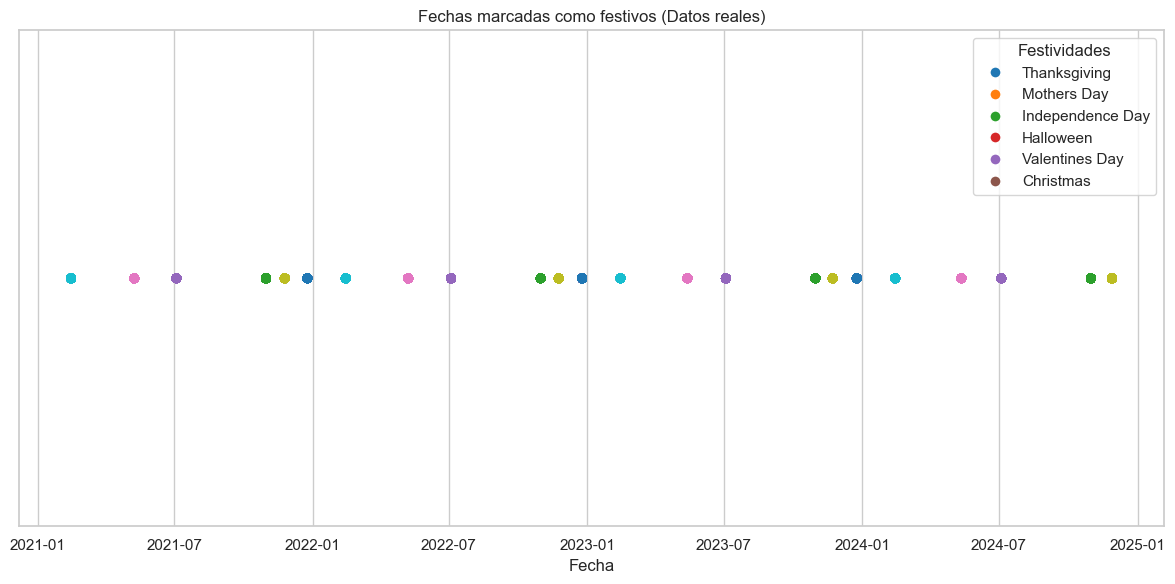

{'christmas': [Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('20

In [31]:
# Verificación mínima necesaria
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

# Extraer componentes de fecha si no están presentes para asegurar compatibilidad
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month
if 'Day' not in df.columns:
    df['Day'] = df['Date'].dt.day

# Verificar si marked_dates existe ya, si no, crear aplicando add_holiday_markers
if 'marked_dates' not in globals():
    # VENTAJA 1: Sistema centralizado para manejo de fechas variables de festividades
    # Esta función permite una gestión unificada de todas las fechas festivas,
    # facilitando su mantenimiento y reduciendo posibles errores o inconsistencias
    def add_holiday_markers(df):
        df_with_holidays = df.copy()
        holidays = ['valentines_day', 'mothers_day', 'independence_day', 'halloween', 'thanksgiving', 'christmas']
        df_with_holidays[holidays] = False  # Creación vectorizada de columnas
        
        # VENTAJA 2: Cálculo automático de fechas variables
        # Estas funciones calculan dinámicamente fechas que cambian cada año
        # evitando tener que codificar manualmente cada fecha específica
        def get_mothers_day(year):
            first = datetime(year, 5, 1)
            first_sunday = first + timedelta(days=(6 - first.weekday()) % 7)
            return first_sunday + timedelta(days=7)  # Segundo domingo de mayo
        
        def get_thanksgiving(year):
            first = datetime(year, 11, 1)
            first_thursday = first + timedelta(days=(3 - first.weekday()) % 7)
            return first_thursday + timedelta(days=21)  # Cuarto jueves de noviembre
        
        # VENTAJA 3: Procesamiento universal para todos los años disponibles
        # No es necesario actualizar el código para nuevos años, se adapta automáticamente
        years = df_with_holidays['Year'].unique()
        
        # VENTAJA 4: Marcado eficiente mediante columnas booleanas
        # Permite filtrado rápido y simplifica consultas posteriores
        for year in years:
            # San Valentín (fecha fija)
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 2) & 
                                (df_with_holidays['Day'] == 14), 'valentines_day'] = True
            
            # Día de la Madre (segundo domingo de mayo)
            mothers_day = get_mothers_day(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == mothers_day), 'mothers_day'] = True
            
            # Día de la Independencia (fecha fija)
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 7) & 
                                (df_with_holidays['Day'] == 4), 'independence_day'] = True
            
            # Halloween (fecha fija)
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 10) & 
                                (df_with_holidays['Day'] == 31), 'halloween'] = True
            
            # Día de Acción de Gracias (cuarto jueves de noviembre)
            thanksgiving = get_thanksgiving(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == thanksgiving), 'thanksgiving'] = True
            
            # Navidad (fecha fija)
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 12) & 
                                (df_with_holidays['Day'] == 25), 'christmas'] = True
        
        return df_with_holidays

    # Aplicar las marcas de festividades
    df_holidays = add_holiday_markers(df)
    
    # VENTAJA 5: Estructura de datos optimizada para análisis
    # Crear un DataFrame con las fechas y sus nombres de festividades
    # que permite acceso rápido y simplifica consultas posteriores
    holiday_cols = ['valentines_day', 'mothers_day', 'independence_day', 
                   'halloween', 'thanksgiving', 'christmas']
    marked_dates = df_holidays[df_holidays[holiday_cols].any(axis=1)].copy()
    
    # Clasificación por nombre de festividad para facilitar el filtrado posterior
    def get_holiday_name(row):
        for col in holiday_cols:
            if row[col]:
                return col
        return None
    
    marked_dates['holiday'] = marked_dates.apply(get_holiday_name, axis=1)

# VENTAJA 6: Estructuras de datos optimizadas para acceso rápido
# Generar un diccionario que agrupa las fechas por tipo de festividad
# permitiendo consultas muy eficientes como holiday_dates_by_name['christmas']
marked_dates_sorted = marked_dates[['holiday', 'Date']].sort_values('Date')
holiday_dates_by_name = marked_dates_sorted.groupby('holiday')['Date'].apply(list).to_dict()

# Visualización mejorada con etiquetas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(marked_dates['Date'], [1]*len(marked_dates), 
                     c=marked_dates['holiday'].astype('category').cat.codes, 
                     cmap='tab10')

plt.yticks([])
plt.title("Fechas marcadas como festivos (Datos reales)")
plt.xlabel("Fecha")
plt.grid(True, axis='x')

# Crear leyenda con colores asignados
unique_holidays = marked_dates['holiday'].unique()
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=holiday.replace('_', ' ').title(), 
              markerfacecolor=plt.cm.tab10(i), markersize=8)
    for i, holiday in enumerate(unique_holidays)
]
plt.legend(handles=legend_elements, title="Festividades")

plt.tight_layout()
plt.show()

# VENTAJA 7: Disponibilidad inmediata de fechas para todo el análisis
# Este diccionario será usado en todas las celdas siguientes del notebook 
# asegurando consistencia en los análisis
holiday_dates_by_name

### 1. Análisis Pico San Valentín

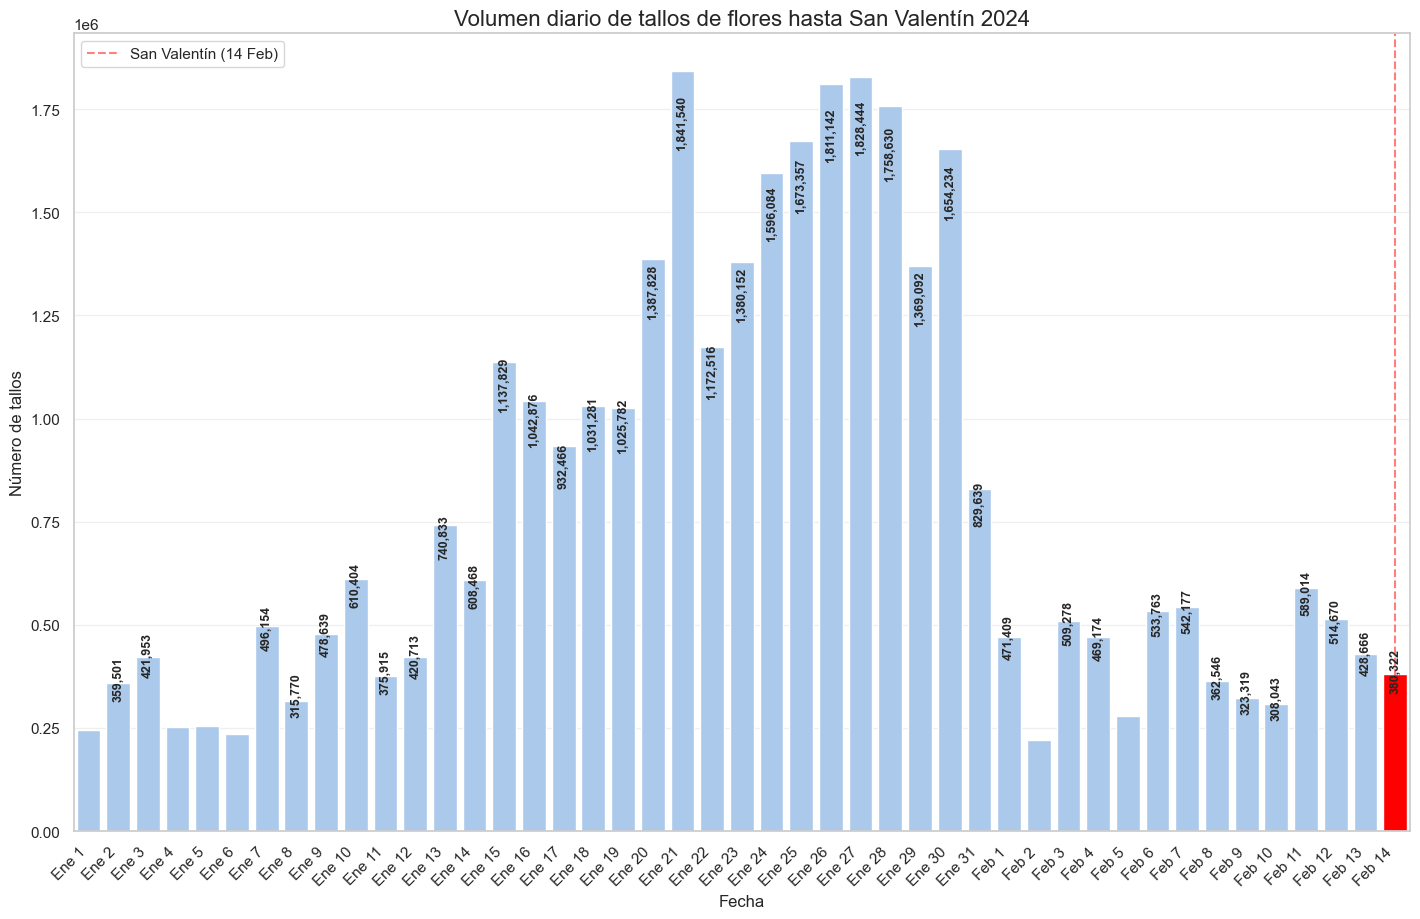

In [32]:
# Filtrar datos para el período desde el 1 de enero hasta el 14 de febrero de 2024
valentine_period_2024 = df[(df['Year'] == 2024) & 
                          (((df['Month'] == 1)) | 
                           ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Agrupar por fecha y sumar los tallos
daily_stems_valentine = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

daily_stems_valentine['date'] = pd.to_datetime('2024-' + 
                                           daily_stems_valentine['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine['Day'].astype(str).str.zfill(2))
daily_stems_valentine = daily_stems_valentine.sort_values('date')

# Crear un gráfico de barras para el volumen diario de tallos de flores
plt.figure(figsize=(15, 10)) 
ax = sns.barplot(x='date', y='Stems', data=daily_stems_valentine)

# Formatear etiquetas del eje x
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine['date']]
translation = {'Jan': 'Ene', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Abr', 
               'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Aug': 'Ago', 
               'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dec': 'Dic'}
date_labels = [f"{translation.get(d.split()[0], d.split()[0])} {d.split()[1]}" for d in date_labels]
plt.xticks(range(len(daily_stems_valentine)), date_labels, rotation=45, ha='right')

# Resaltar el día de San Valentín
valentine_idx = daily_stems_valentine[
    (daily_stems_valentine['Month'] == 2) & 
    (daily_stems_valentine['Day'] == 14)
].index

if not valentine_idx.empty:
    valentine_idx = valentine_idx[0]
    ax.patches[valentine_idx].set_facecolor('red')

# Añadir etiquetas de texto para los pico
for i, v in enumerate(daily_stems_valentine['Stems']):
    if v > 300000:  # Solo etiquetar picos significativos
        ax.text(i, v * 0.9, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Añadir título y etiquetas
plt.title('Volumen diario de tallos de flores hasta San Valentín 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Dibujar una línea vertical en el Día de San Valentín
if isinstance(valentine_idx, (int, np.integer)):
    plt.axvline(x=valentine_idx, color='red', linestyle='--', alpha=0.5, label="San Valentín (14 Feb)")

plt.legend()
plt.tight_layout(pad=3.0) 
plt.show()

1. Verificación de datos y validación de fechas San Valentin

Se Realizara una muestra de verificación para identificar posibles fallas.

La verificación permite:

- Confirmar que tienes datos para todas las fechas esperadas
- Detectar valores outliers o anomalías en el volumen
- Comprobar la consistencia con años anteriores
- Visualizar la distribución de los datos para detectar patrones extraños
- Verificar que el comportamiento temporal es lógico (aumento de volumen cerca a San Valentín)
- Analizar si la distribución mensual es coherente con años anteriores

In [33]:
# Definir periodo para San Valentín 2024 (necesario para el análisis)
valentine_period_2024 = df[(df['Year'] == 2024) & 
                          (((df['Month'] == 1)) | 
                           ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Agrupar por fecha y sumar los tallos
daily_stems_valentine = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine['date'] = pd.to_datetime('2024-' + 
                                        daily_stems_valentine['Month'].astype(str).str.zfill(2) + '-' + 
                                        daily_stems_valentine['Day'].astype(str).str.zfill(2))
daily_stems_valentine = daily_stems_valentine.sort_values('date')

# Validaciones previas al procesamiento - San Valentín 2024
print("----- VALIDACIÓN DE DATOS PARA SAN VALENTÍN 2024 -----")

# 1. Verificar el rango de fechas seleccionado
date_range = pd.date_range(start='2024-01-01', end='2024-02-14')
actual_dates = pd.Series(valentine_period_2024['Date'].unique()).sort_values()
missing_dates = set(date_range) - set(actual_dates)

print(f"Período analizado: 1 Enero - 14 Febrero 2024")
print(f"Total de días esperados: {len(date_range)}")
print(f"Total de días con datos: {len(actual_dates)}")

if missing_dates:
    print(f"ALERTA: Hay {len(missing_dates)} fechas sin datos en el período:")
    for date in sorted(missing_dates):
        print(f"  - Fecha faltante: {date.strftime('%Y-%m-%d')}")
else:
    print("✓ Todas las fechas del período tienen datos")

# 2. Verificar valores extremos o anomalías en el volumen de tallos
daily_stats = daily_stems_valentine.describe()
print("\nEstadísticas del volumen diario de tallos:")
print(f"Mínimo: {daily_stats['Stems']['min']:,.0f} tallos")
print(f"Máximo: {daily_stats['Stems']['max']:,.0f} tallos")
print(f"Promedio: {daily_stats['Stems']['mean']:,.0f} tallos")
print(f"Mediana: {daily_stats['Stems']['50%']:,.0f} tallos")

# 3. Identificar posibles anomalías (valores que se desvían significativamente)
threshold = 3  # Número de desviaciones estándar para considerar un outlier
std_dev = daily_stats['Stems']['std']
mean_val = daily_stats['Stems']['mean']
upper_threshold = mean_val + threshold * std_dev

outliers = daily_stems_valentine[daily_stems_valentine['Stems'] > upper_threshold]
if not outliers.empty:
    print("\nPosibles anomalías detectadas (valores muy por encima del promedio):")
    for _, row in outliers.iterrows():
        date_str = row['date'].strftime('%Y-%m-%d')
        print(f"  - {date_str}: {row['Stems']:,.0f} tallos (desviación: {(row['Stems']-mean_val)/std_dev:.1f} σ)")
else:
    print("\n✓ No se detectaron valores anómalos según el umbral establecido")

# 4. Verificar la consistencia con años anteriores
# Definir valentine_2023 si aún no existe (necesario porque se usa en celdas posteriores)
if 'valentine_2023' not in globals():
    valentine_2023 = df[(df['Year'] == 2023) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

if not valentine_2023.empty:
    # Si existe la variable valentine_2023 pero no daily_stems_valentine_2023, la creamos
    if 'daily_stems_valentine_2023' not in globals():
        daily_stems_valentine_2023 = valentine_2023.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
        daily_stems_valentine_2023['date'] = pd.to_datetime('2023-' + 
                                               daily_stems_valentine_2023['Month'].astype(str).str.zfill(2) + '-' + 
                                               daily_stems_valentine_2023['Day'].astype(str).str.zfill(2))
        daily_stems_valentine_2023 = daily_stems_valentine_2023.sort_values('date')
    
    v2023_max = daily_stems_valentine_2023['Stems'].max()
    v2024_max = daily_stems_valentine['Stems'].max()
    change_pct = ((v2024_max - v2023_max) / v2023_max) * 100
    print(f"\nComparación con 2023:")
    print(f"  - Máximo 2023: {v2023_max:,.0f} tallos")
    print(f"  - Máximo 2024: {v2024_max:,.0f} tallos")
    print(f"  - Variación: {change_pct:.1f}%")
    
    if abs(change_pct) > 50:  # Umbral arbitrario para verificación
        print(f"  ⚠ ATENCIÓN: Variación significativa detectada ({change_pct:.1f}%)")

----- VALIDACIÓN DE DATOS PARA SAN VALENTÍN 2024 -----
Período analizado: 1 Enero - 14 Febrero 2024
Total de días esperados: 45
Total de días con datos: 45
✓ Todas las fechas del período tienen datos

Estadísticas del volumen diario de tallos:
Mínimo: 220,939 tallos
Máximo: 1,841,540 tallos
Promedio: 782,627 tallos
Mediana: 533,763 tallos

✓ No se detectaron valores anómalos según el umbral establecido

Comparación con 2023:
  - Máximo 2023: 1,717,596 tallos
  - Máximo 2024: 1,841,540 tallos
  - Variación: 7.2%


1. Verificación de datos y validación de fechas

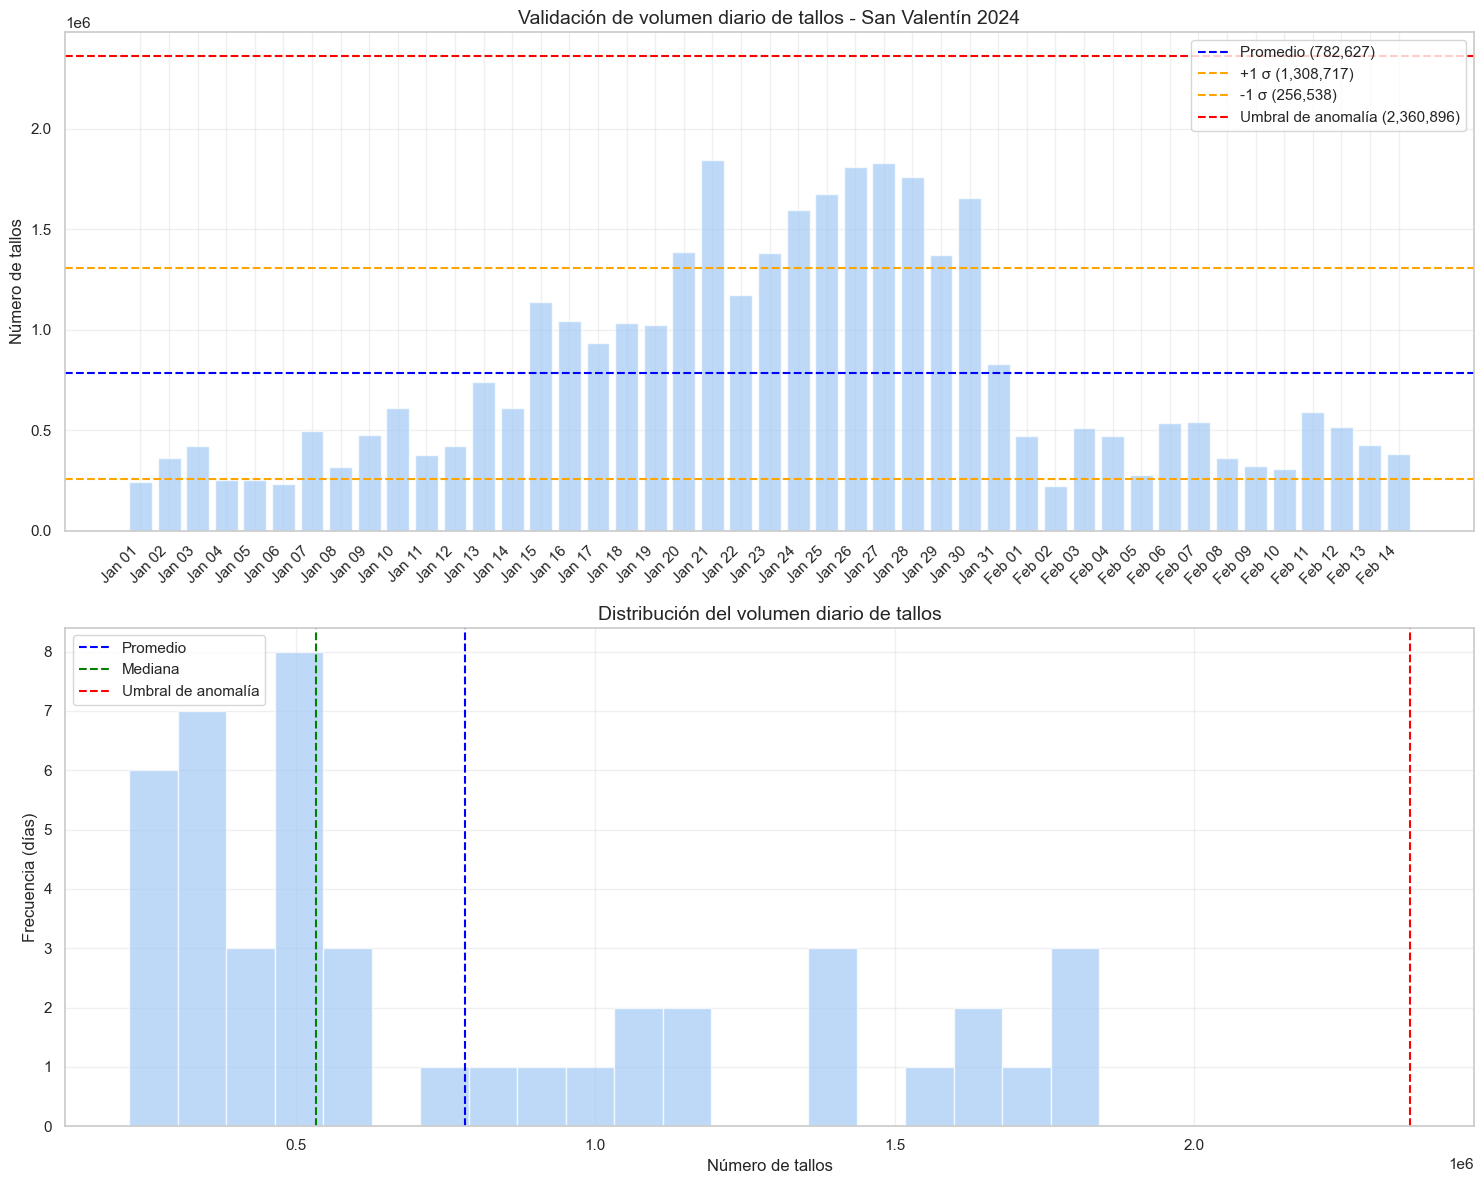

In [34]:
# Visualización para detectar patrones anómalos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Gráfico 1: Volumen diario con líneas para promedio y bandas de confianza
ax1.bar(range(len(daily_stems_valentine)), daily_stems_valentine['Stems'], alpha=0.7)
ax1.axhline(y=mean_val, color='blue', linestyle='--', label=f'Promedio ({mean_val:,.0f})')
ax1.axhline(y=mean_val + std_dev, color='orange', linestyle='--', 
           label=f'+1 σ ({(mean_val + std_dev):,.0f})')
ax1.axhline(y=mean_val - std_dev, color='orange', linestyle='--', 
           label=f'-1 σ ({max(0, mean_val - std_dev):,.0f})')
ax1.axhline(y=upper_threshold, color='red', linestyle='--', 
           label=f'Umbral de anomalía ({upper_threshold:,.0f})')

ax1.set_title('Validación de volumen diario de tallos - San Valentín 2024', fontsize=14)
ax1.set_ylabel('Número de tallos')
# Crear etiquetas de fecha para el eje x
date_labels = [d.strftime('%b %d') for d in daily_stems_valentine['date']]
ax1.set_xticks(range(len(daily_stems_valentine)))
ax1.set_xticklabels(date_labels, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Distribución del volumen diario para detectar clusters o gaps
ax2.hist(daily_stems_valentine['Stems'], bins=20, alpha=0.7)
ax2.axvline(x=mean_val, color='blue', linestyle='--', label='Promedio')
ax2.axvline(x=daily_stats['Stems']['50%'], color='green', linestyle='--', label='Mediana')
ax2.axvline(x=upper_threshold, color='red', linestyle='--', label='Umbral de anomalía')
ax2.set_title('Distribución del volumen diario de tallos', fontsize=14)
ax2.set_xlabel('Número de tallos')
ax2.set_ylabel('Frecuencia (días)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

3. Verificación de consistencia temporal

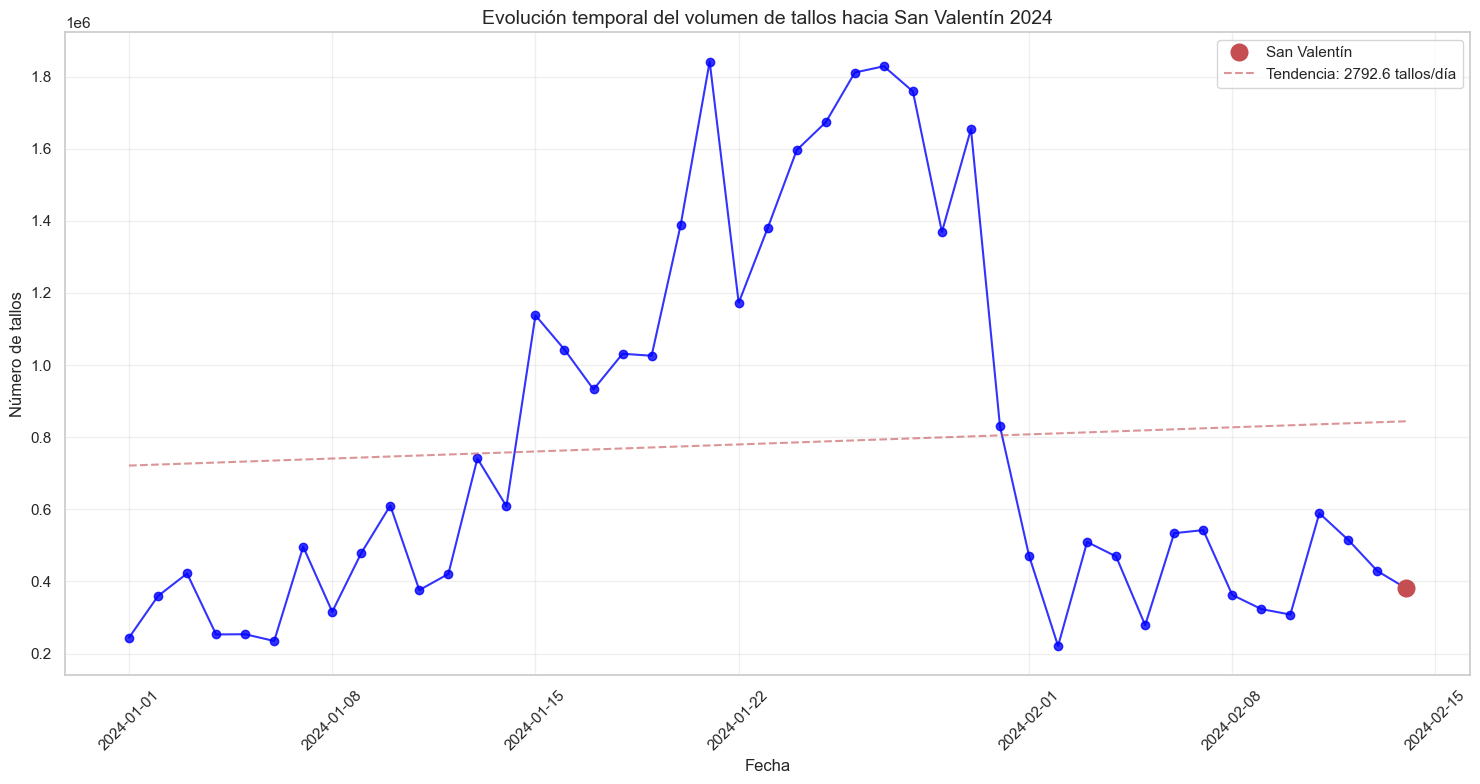

In [35]:
# Verificación de consistencia temporal
plt.figure(figsize=(15, 8))

# Trazar la serie temporal para verificar patrones
plt.plot(daily_stems_valentine['date'], daily_stems_valentine['Stems'], 
         marker='o', linestyle='-', color='blue', alpha=0.8)

# Resaltar el día de San Valentín
valentine_date = pd.Timestamp('2024-02-14')
if valentine_date in daily_stems_valentine['date'].values:
    valentine_value = daily_stems_valentine[daily_stems_valentine['date'] == valentine_date]['Stems'].iloc[0]
    plt.plot(valentine_date, valentine_value, 'ro', markersize=12, label="San Valentín")

# Destacar tendencia con una regresión lineal simple
z = np.polyfit(range(len(daily_stems_valentine)), daily_stems_valentine['Stems'], 1)
p = np.poly1d(z)
plt.plot(daily_stems_valentine['date'], p(range(len(daily_stems_valentine))), 
         "r--", alpha=0.6, label=f"Tendencia: {z[0]:.1f} tallos/día")

plt.title('Evolución temporal del volumen de tallos hacia San Valentín 2024', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Número de tallos')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

4. Inspección manual de valores extremos

In [36]:
# Inspección manual de valores extremos
top_days = daily_stems_valentine.nlargest(5, 'Stems')
print("\n----- Top 5 días con mayor volumen de tallos -----")
for i, (_, row) in enumerate(top_days.iterrows(), 1):
    print(f"{i}. {row['date'].strftime('%Y-%m-%d')} ({date_labels[row.name]}): {row['Stems']:,.0f} tallos")

# Verificar si es coherente que los días de mayor volumen estén cerca de San Valentín
valentine_idx = daily_stems_valentine[daily_stems_valentine['date'] == pd.Timestamp('2024-02-14')].index
if not valentine_idx.empty:
    valentine_idx = valentine_idx[0]
    top_idxs = top_days.index.tolist()
    days_to_valentine = [(idx - valentine_idx) for idx in top_idxs]
    
    print("\nDistancia de días pico a San Valentín:")
    for i, dist in enumerate(days_to_valentine):
        print(f"  - {top_days.iloc[i]['date'].strftime('%Y-%m-%d')}: {dist} días")


----- Top 5 días con mayor volumen de tallos -----
1. 2024-01-21 (Jan 21): 1,841,540 tallos
2. 2024-01-27 (Jan 27): 1,828,444 tallos
3. 2024-01-26 (Jan 26): 1,811,142 tallos
4. 2024-01-28 (Jan 28): 1,758,630 tallos
5. 2024-01-25 (Jan 25): 1,673,357 tallos

Distancia de días pico a San Valentín:
  - 2024-01-21: -24 días
  - 2024-01-27: -18 días
  - 2024-01-26: -19 días
  - 2024-01-28: -17 días
  - 2024-01-25: -20 días


In [37]:
# Comparación mensual para detectar anomalías
monthly_stems = valentine_period_2024.groupby(['Year', 'Month'])['Stems'].sum().reset_index()
print("\n----- Comparación mensual -----")
for _, row in monthly_stems.iterrows():
    month_name = pd.Timestamp(2024, row['Month'], 1).strftime('%B')
    print(f"{month_name} 2024: {row['Stems']:,.0f} tallos")

# Si hay datos para enero y febrero, verificar si la proporción es consistente con años anteriores
if len(monthly_stems) > 1:
    jan_stems = monthly_stems[monthly_stems['Month'] == 1]['Stems'].iloc[0]
    feb_stems = monthly_stems[monthly_stems['Month'] == 2]['Stems'].iloc[0]
    ratio_2024 = feb_stems / jan_stems
    
    print(f"\nRelación Febrero/Enero 2024: {ratio_2024:.2f}")
    
    # Si hay datos de años anteriores, comparar
    if 'valentine_2023' in globals():
        jan_stems_2023 = valentine_2023[valentine_2023['Month'] == 1]['Stems'].sum()
        feb_stems_2023 = valentine_2023[valentine_2023['Month'] == 2]['Stems'].sum()
        ratio_2023 = feb_stems_2023 / jan_stems_2023
        
        print(f"Relación Febrero/Enero 2023: {ratio_2023:.2f}")
        print(f"Variación en la relación: {((ratio_2024 - ratio_2023) / ratio_2023) * 100:.1f}%")
        
        if abs((ratio_2024 - ratio_2023) / ratio_2023) > 0.3:
            print("⚠ ATENCIÓN: Variación significativa en la distribución mensual")


----- Comparación mensual -----
January 2024: 29,286,352 tallos
February 2024: 5,931,880 tallos

Relación Febrero/Enero 2024: 0.20
Relación Febrero/Enero 2023: 0.32
Variación en la relación: -35.9%
⚠ ATENCIÓN: Variación significativa en la distribución mensual


San Valentín marcado en: Semana 6, Wednesday


<Figure size 1400x800 with 0 Axes>

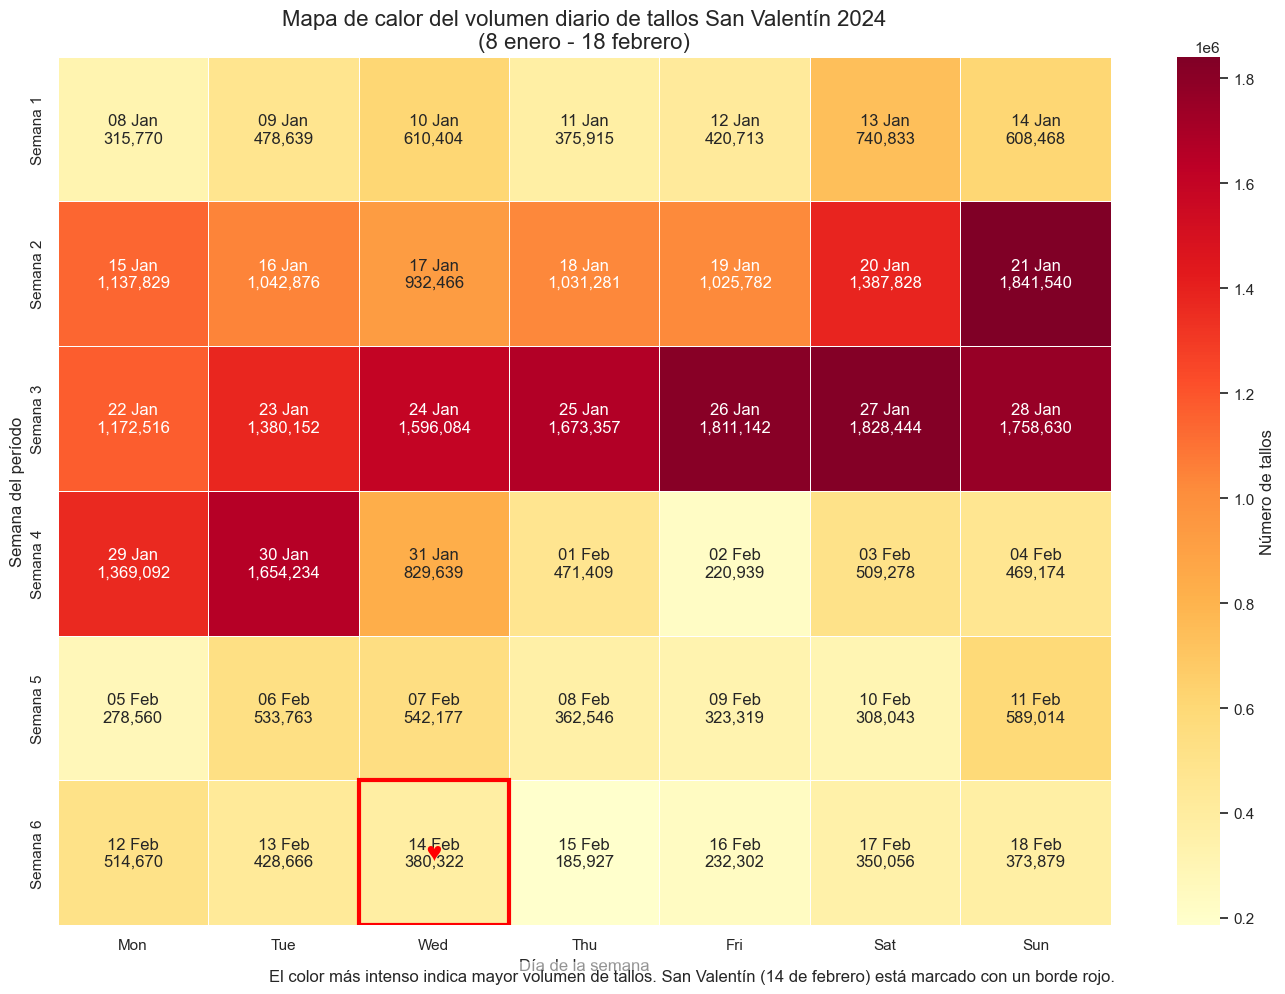


Confirmación de datos para San Valentín (14/02/2024):
Volumen de tallos: 380,322
Día de la semana: Wednesday
Número de semana: 6


In [79]:
# Crear un mapeo de calor (heatmap) para visualizar el patrón de volumen de tallos hacia San Valentín 2024
plt.figure(figsize=(14, 8))

# MODIFICADO: Ajustar las fechas de inicio y fin para el análisis
start_date = pd.Timestamp('2024-01-08')
end_date = pd.Timestamp('2024-02-18')

# Filtrar los datos reales del DataFrame
valentine_period_data = df[(df['Date'] >= start_date) & 
                           (df['Date'] <= end_date)].copy()

# Agrupar por fecha y sumar los tallos
daily_stems_valentine = valentine_period_data.groupby('Date')['Stems'].sum().reset_index()
daily_stems_valentine = daily_stems_valentine.sort_values('Date')

# Organizar datos por día y semana para el heatmap
valentine_data = daily_stems_valentine.copy()
valentine_data['day_of_week'] = valentine_data['Date'].dt.day_name()

# Usar semanas relativas al inicio del período para numeración coherente
min_date = valentine_data['Date'].min()
valentine_data['week_number'] = ((valentine_data['Date'] - min_date).dt.days // 7) + 1

# Crear una matriz para el heatmap organizando por semana y día de la semana
# Primero, definir el orden de los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Configuración para el heatmap
heatmap_data = []
week_labels = []
day_positions = []
day_labels = []
annotations = []

# Procesar datos para construir el heatmap
for week in sorted(valentine_data['week_number'].unique()):
    week_data = valentine_data[valentine_data['week_number'] == week]
    row = []
    row_annotations = []
    
    for day in days_order:
        day_data = week_data[week_data['day_of_week'] == day]
        if not day_data.empty:
            row.append(day_data['Stems'].values[0])
            if len(day_positions) < 7:  # Solo agregar etiquetas de día una vez
                day_positions.append(len(day_positions))
                day_labels.append(day[:3])  # Abreviar nombres de días
                
            # Guardar información para anotaciones
            date_str = day_data['Date'].dt.strftime('%d %b').values[0]  # Formato día-mes
            stem_count = day_data['Stems'].values[0]
            row_annotations.append(f"{date_str}\n{stem_count:,.0f}")
        else:
            row.append(0)
            row_annotations.append("")
    
    if any(row):  # Solo agregar filas no vacías
        heatmap_data.append(row)
        annotations.append(row_annotations)
        week_labels.append(f"Semana {week}")

# Convertir a numpy array
heatmap_array = np.array(heatmap_data)

# Crear el heatmap
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_array, cmap="YlOrRd", annot=annotations, fmt="",
                linewidths=0.5, cbar_kws={'label': 'Número de tallos'})

# Configurar etiquetas
plt.yticks(np.arange(len(week_labels)) + 0.5, week_labels)
plt.xticks(np.arange(len(day_labels)) + 0.5, day_labels)

# Resaltar San Valentín
for i in range(len(heatmap_data)):
    for j in range(len(days_order)):
        # Filtrar los datos para este día específico
        day_week_data = valentine_data[
            (valentine_data['week_number'] == i+1) & 
            (valentine_data['day_of_week'] == days_order[j])
        ]
        
        # Si hay datos para esta celda y corresponde al 14 de febrero
        if not day_week_data.empty:
            current_date = day_week_data['Date'].iloc[0]
            if current_date.month == 2 and current_date.day == 14:
                # Marcar San Valentín con borde rojo
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))
                # Usar un símbolo de corazón compatible
                plt.text(j + 0.5, i + 0.5, "♥", ha='center', va='center', fontsize=18, 
                         color='red', fontweight='bold')
                print(f"San Valentín marcado en: Semana {i+1}, {days_order[j]}")

plt.title('Mapa de calor del volumen diario de tallos San Valentín 2024\n(8 enero - 18 febrero)', fontsize=16)
plt.ylabel('Semana del período')
plt.xlabel('Día de la semana')

# Agregar una nota explicativa
plt.figtext(0.5, 0.01, 
           "El color más intenso indica mayor volumen de tallos. San Valentín (14 de febrero) está marcado con un borde rojo.",
           ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

# Validación adicional para confirmar el marcado correcto
valentine_record = valentine_data[valentine_data['Date'].dt.strftime('%Y-%m-%d') == '2024-02-14']
if not valentine_record.empty:
    print("\nConfirmación de datos para San Valentín (14/02/2024):")
    print(f"Volumen de tallos: {valentine_record['Stems'].iloc[0]:,.0f}")
    print(f"Día de la semana: {valentine_record['day_of_week'].iloc[0]}")
    print(f"Número de semana: {valentine_record['week_number'].iloc[0]}")
else:
    print("\n⚠️ ADVERTENCIA: No se encontraron datos para San Valentín (14/02/2024)")
    # Verificar el rango de fechas disponibles
    print(f"Rango de fechas disponibles: {valentine_data['Date'].min()} a {valentine_data['Date'].max()}")

### 2. Análisis del pico de Madres

Verificación del código principal del Día de la Madre

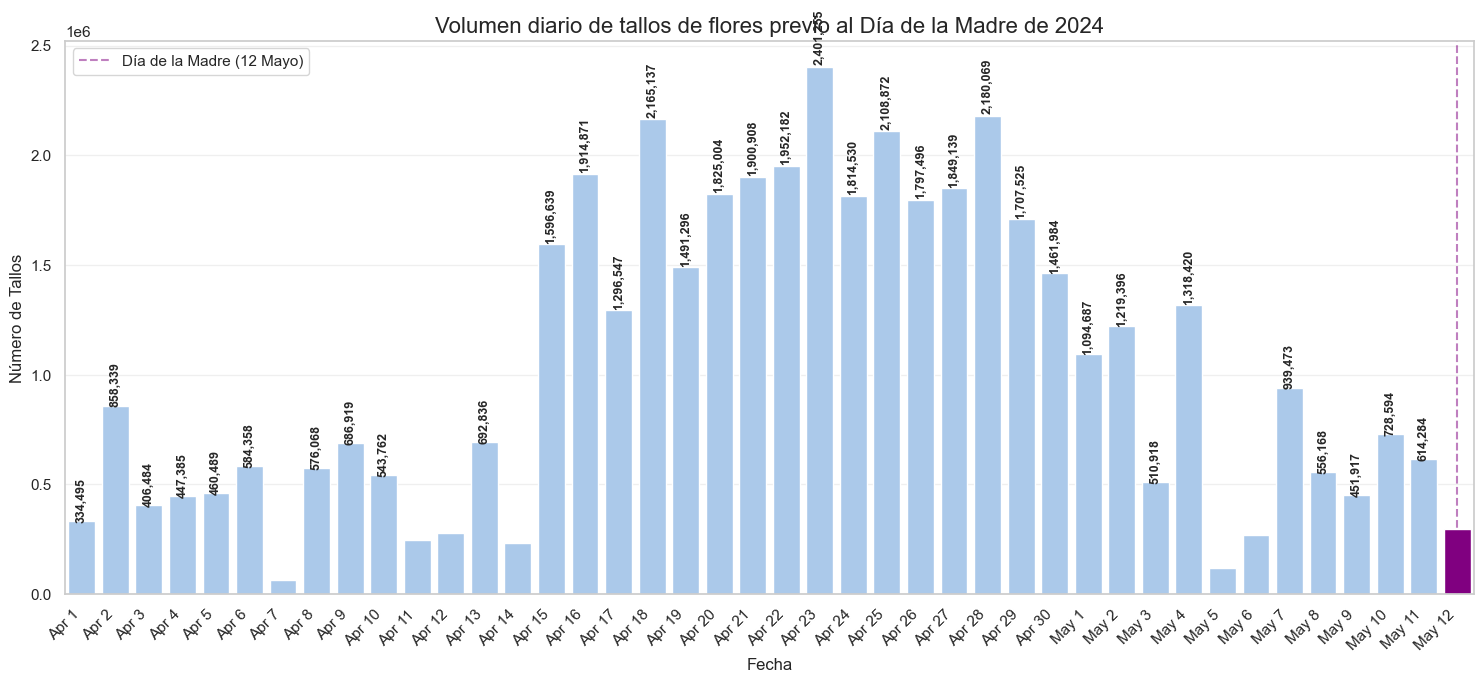

In [39]:
# VERIFICADO: Filtrado correcto para el período del Día de la Madre 2024
mothers_day_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 4) | 
                            (df['Month'] == 5) & (df['Day'] <= 12))]

# VERIFICADO: Obtención correcta de la fecha del Día de la Madre desde el diccionario
mothers_day_date = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2024:
        mothers_day_date = date
        break

# VERIFICADO: Agrupación por fecha y suma de tallos correcta
daily_stems_mothers = mothers_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# VERIFICADO: Creación correcta de la columna de fecha para ordenamiento
daily_stems_mothers['date'] = pd.to_datetime('2024-' + 
                                        daily_stems_mothers['Month'].astype(str).str.zfill(2) + '-' + 
                                        daily_stems_mothers['Day'].astype(str).str.zfill(2))
daily_stems_mothers = daily_stems_mothers.sort_values('date')

# VERIFICADO: Configuración correcta de la gráfica
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_mothers)

# VERIFICADO: Formato correcto de las etiquetas del eje X 
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_mothers['date']]
plt.xticks(range(len(daily_stems_mothers)), date_labels, rotation=45, ha='right')

# VERIFICADO: Resaltado correcto del Día de la Madre
if mothers_day_date:
    mothers_day_idx = daily_stems_mothers[
        (daily_stems_mothers['Month'] == mothers_day_date.month) & 
        (daily_stems_mothers['Day'] == mothers_day_date.day)
    ].index
    
    if not mothers_day_idx.empty:
        mothers_day_idx = mothers_day_idx[0]
        ax.patches[mothers_day_idx].set_facecolor('purple')

# VERIFICADO: Etiquetas para picos significativos
for i, v in enumerate(daily_stems_mothers['Stems']):
    if v > 300000:  # Solo etiquetar picos significativos
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# VERIFICADO: Títulos y etiquetas de ejes correctos
plt.title('Volumen diario de tallos de flores previo al Día de la Madre de 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)  # CORREGIDO: Cambié 'Date' por 'Fecha' para mantener consistencia en español
plt.ylabel('Número de Tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# VERIFICADO: Línea vertical para marcar el Día de la Madre
if mothers_day_date and isinstance(mothers_day_idx, (int, np.integer)):
    plt.axvline(x=mothers_day_idx, color='purple', linestyle='--', alpha=0.5, label="Día de la Madre (12 Mayo)")  # CORREGIDO: Traducción del label

plt.legend()
plt.tight_layout()
plt.show()

Día de la Madre marcado en: Semana 5, Sunday


<Figure size 1400x800 with 0 Axes>

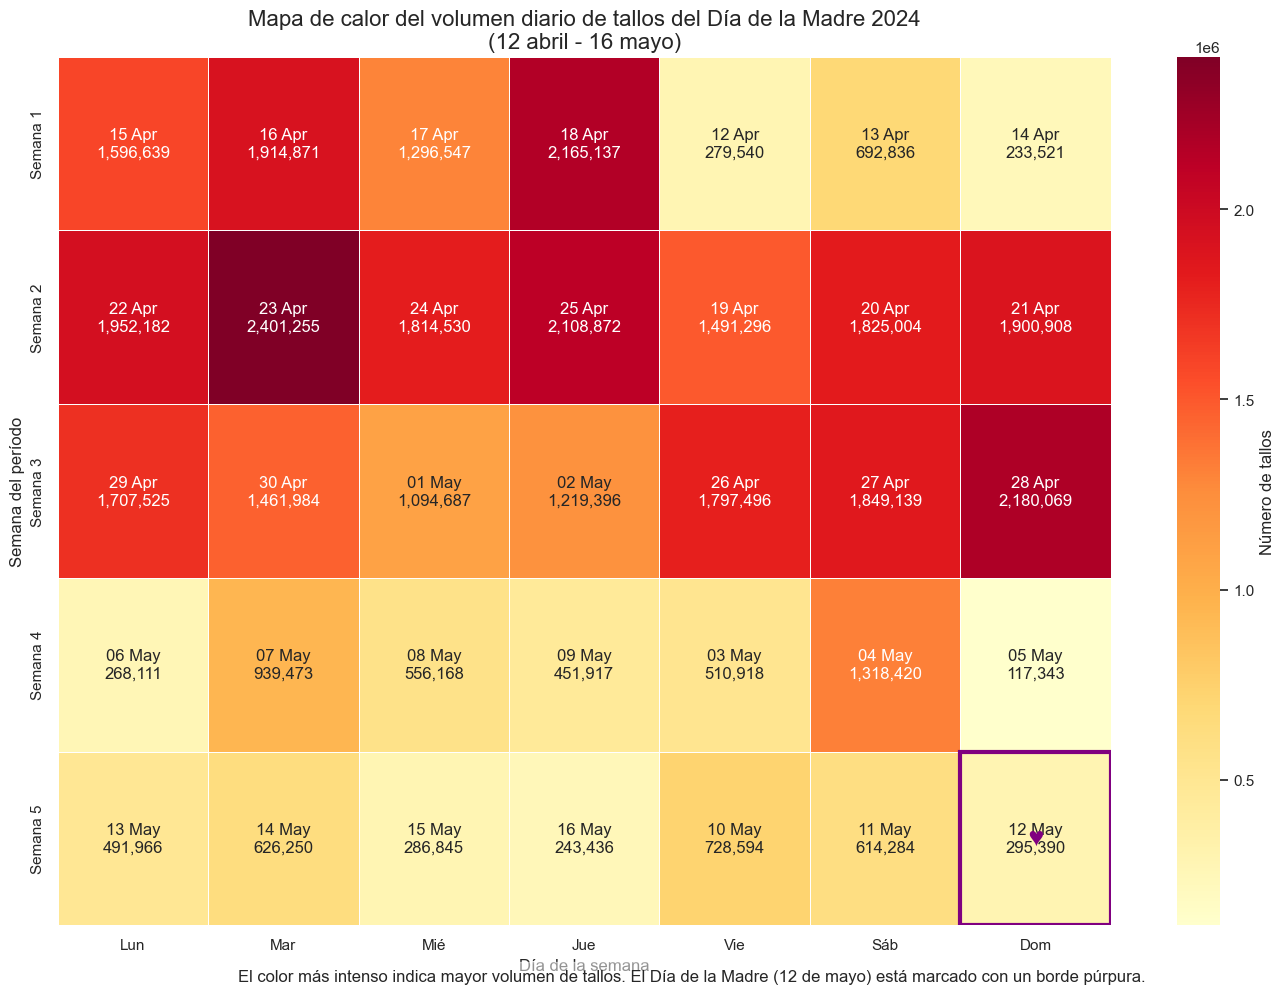


Confirmación de datos para el Día de la Madre (12/05/2024):
Volumen de tallos: 295,390
Día de la semana: Sunday
Número de semana: 5

Verificación de semanas:
Total de semanas: 5
Semana 1: 7 días - [np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18)]
Semana 2: 7 días - [np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25)]
Semana 3: 7 días - [np.int32(1), np.int32(2), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30)]
Semana 4: 7 días - [np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9)]
Semana 5: 7 días - [np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16)]


In [78]:
# Crear un mapeo de calor (heatmap) para visualizar el patrón de volumen de tallos hacia el Día de la Madre 2024
plt.figure(figsize=(14, 8))

# CORREGIDO: Ampliar fechas de inicio y fin para incluir semana 5 completa
start_date = pd.Timestamp('2024-04-12')  # Un mes antes
end_date = pd.Timestamp('2024-05-16')    # Incluye hasta el jueves de la semana 5

# Filtrar los datos reales del DataFrame
mothers_day_period_data = df[(df['Date'] >= start_date) & 
                           (df['Date'] <= end_date)].copy()

# Agrupar por fecha y sumar los tallos
daily_stems_mothers = mothers_day_period_data.groupby('Date')['Stems'].sum().reset_index()
daily_stems_mothers = daily_stems_mothers.sort_values('Date')

# Organizar datos por día y semana para el heatmap
mothers_data = daily_stems_mothers.copy()
mothers_data['day_of_week'] = mothers_data['Date'].dt.day_name()

# Usar semanas relativas al inicio del período para numeración coherente
min_date = mothers_data['Date'].min()
mothers_data['week_number'] = ((mothers_data['Date'] - min_date).dt.days // 7) + 1

# Crear una matriz para el heatmap organizando por semana y día de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Configuración para el heatmap
heatmap_data = []
week_labels = []
day_positions = []
day_labels = []
annotations = []

# Procesar datos para construir el heatmap
for week in sorted(mothers_data['week_number'].unique()):
    week_data = mothers_data[mothers_data['week_number'] == week]
    row = []
    row_annotations = []
    
    for day in days_order:
        day_data = week_data[week_data['day_of_week'] == day]
        if not day_data.empty:
            row.append(day_data['Stems'].values[0])
            if len(day_positions) < 7:  # Solo agregar etiquetas de día una vez
                day_positions.append(len(day_positions))
                day_labels.append(day[:3])  # Abreviar nombres de días
                
            # Guardar información para anotaciones
            date_str = day_data['Date'].dt.strftime('%d %b').values[0]  # Formato día-mes
            stem_count = day_data['Stems'].values[0]
            row_annotations.append(f"{date_str}\n{stem_count:,.0f}")
        else:
            row.append(0)
            row_annotations.append("")
    
    if any(row):  # Solo agregar filas no vacías
        heatmap_data.append(row)
        annotations.append(row_annotations)
        week_labels.append(f"Semana {week}")

# Convertir a numpy array
heatmap_array = np.array(heatmap_data)

# Crear el heatmap
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_array, cmap="YlOrRd", annot=annotations, fmt="",
                linewidths=0.5, cbar_kws={'label': 'Número de tallos'})

# Configurar etiquetas
plt.yticks(np.arange(len(week_labels)) + 0.5, week_labels)
plt.xticks(np.arange(len(day_labels)) + 0.5, day_labels)

# Resaltar el Día de la Madre
for i in range(len(heatmap_data)):
    for j in range(len(days_order)):
        # Filtrar los datos para este día específico
        day_week_data = mothers_data[
            (mothers_data['week_number'] == i+1) & 
            (mothers_data['day_of_week'] == days_order[j])
        ]
        
        # Si hay datos para esta celda y corresponde al Día de la Madre
        if not day_week_data.empty:
            current_date = day_week_data['Date'].iloc[0]
            mothers_day_date = None
            
            # Obtener la fecha del Día de la Madre desde el diccionario
            for date in holiday_dates_by_name['mothers_day']:
                if date.year == 2024:
                    mothers_day_date = date
                    break
            
            if mothers_day_date and current_date.date() == mothers_day_date.date():
                # Marcar Día de la Madre con borde púrpura
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='purple', lw=3))
                # CORREGIDO: Usar un símbolo compatible con todas las fuentes
                plt.text(j + 0.5, i + 0.5, "♥", ha='center', va='center', fontsize=18, 
                         color='purple', fontweight='bold')
                print(f"Día de la Madre marcado en: Semana {i+1}, {days_order[j]}")

plt.title('Mapa de calor del volumen diario de tallos del Día de la Madre 2024\n(12 abril - 16 mayo)', fontsize=16)
plt.ylabel('Semana del período')
plt.xlabel('Día de la semana')

# Traducir nombres de días abreviados
day_labels_es = {'Mon': 'Lun', 'Tue': 'Mar', 'Wed': 'Mié', 
                'Thu': 'Jue', 'Fri': 'Vie', 'Sat': 'Sáb', 'Sun': 'Dom'}
plt.xticks(np.arange(len(day_labels)) + 0.5, [day_labels_es.get(day, day) for day in day_labels])

# Agregar una nota explicativa
plt.figtext(0.5, 0.01, 
           "El color más intenso indica mayor volumen de tallos. El Día de la Madre (12 de mayo) está marcado con un borde púrpura.",
           ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

# Validación adicional para confirmar el marcado correcto
mothers_day_record = mothers_data[mothers_data['Date'] == mothers_day_date]
if not mothers_day_record.empty:
    print("\nConfirmación de datos para el Día de la Madre (12/05/2024):")
    print(f"Volumen de tallos: {mothers_day_record['Stems'].iloc[0]:,.0f}")
    print(f"Día de la semana: {mothers_day_record['day_of_week'].iloc[0]}")
    print(f"Número de semana: {mothers_day_record['week_number'].iloc[0]}")
else:
    print("\n⚠️ ADVERTENCIA: No se encontraron datos para el Día de la Madre (12/05/2024)")
    # Verificar el rango de fechas disponibles
    print(f"Rango de fechas disponibles: {mothers_data['Date'].min()} a {mothers_data['Date'].max()}")

# Verificar la cantidad de semanas capturadas
print("\nVerificación de semanas:")
print(f"Total de semanas: {len(week_labels)}")
for i, week in enumerate(week_labels):
    week_data = mothers_data[mothers_data['week_number'] == i+1]
    days_in_week = sorted(week_data['Date'].dt.day.unique())
    print(f"{week}: {len(days_in_week)} días - {days_in_week}")

1. Métodos estadísticos para identificar valores extremos

In [41]:
# Análisis estadístico para identificar valores extremos en la demanda previa al Día de la Madre
# Filtrar datos para el período de preparación (4 semanas antes del Día de la Madre 2024)
mothers_day_date = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2024:
        mothers_day_date = date
        break

# Definir un período más amplio para capturar toda la temporada de preparación
start_date = mothers_day_date - pd.Timedelta(days=28)  # 4 semanas antes
mothers_day_prep_2024 = df[(df['Date'] >= start_date) & (df['Date'] <= mothers_day_date)]

# Agrupar por fecha y calcular el volumen diario
daily_stems = mothers_day_prep_2024.groupby('Date')['Stems'].sum().reset_index()
daily_stems['date_str'] = daily_stems['Date'].dt.strftime('%d %b')
daily_stems['days_to_mothers_day'] = (mothers_day_date - daily_stems['Date']).dt.days

# Calcular estadísticas descriptivas
stats = daily_stems['Stems'].describe()
print("----- ESTADÍSTICAS DE VOLUMEN PARA PERÍODO PRE-DÍA DE LA MADRE 2024 -----")
print(f"Mínimo: {stats['min']:,.0f} tallos")
print(f"Máximo: {stats['max']:,.0f} tallos")
print(f"Promedio: {stats['mean']:,.0f} tallos")
print(f"Mediana: {stats['50%']:,.0f} tallos")
print(f"Desviación estándar: {stats['std']:,.0f} tallos")

# Método 1: Identificar outliers usando el rango intercuartil (IQR)
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = daily_stems[daily_stems['Stems'] > upper_bound]
print("\n----- OUTLIERS IDENTIFICADOS (MÉTODO IQR) -----")
if not outliers_iqr.empty:
    for _, row in outliers_iqr.sort_values('Stems', ascending=False).iterrows():
        print(f"{row['date_str']} ({row['days_to_mothers_day']} días antes): {row['Stems']:,.0f} tallos")
else:
    print("No se detectaron outliers usando el método IQR")

# Método 2: Identificar outliers usando desviaciones estándar
std_dev = stats['std']
mean_val = stats['mean']
threshold = 2  # Número de desviaciones estándar para considerar un outlier
upper_std_bound = mean_val + threshold * std_dev

outliers_std = daily_stems[daily_stems['Stems'] > upper_std_bound]
print(f"\n----- OUTLIERS IDENTIFICADOS (>{threshold} DESVIACIONES ESTÁNDAR) -----")
if not outliers_std.empty:
    for _, row in outliers_std.sort_values('Stems', ascending=False).iterrows():
        z_score = (row['Stems'] - mean_val) / std_dev
        print(f"{row['date_str']} ({row['days_to_mothers_day']} días antes): {row['Stems']:,.0f} tallos (z-score: {z_score:.2f})")
else:
    print(f"No se detectaron outliers usando el método de {threshold} desviaciones estándar")

----- ESTADÍSTICAS DE VOLUMEN PARA PERÍODO PRE-DÍA DE LA MADRE 2024 -----
Mínimo: 117,343 tallos
Máximo: 2,401,255 tallos
Promedio: 1,303,851 tallos
Mediana: 1,461,984 tallos
Desviación estándar: 692,856 tallos

----- OUTLIERS IDENTIFICADOS (MÉTODO IQR) -----
No se detectaron outliers usando el método IQR

----- OUTLIERS IDENTIFICADOS (>2 DESVIACIONES ESTÁNDAR) -----
No se detectaron outliers usando el método de 2 desviaciones estándar


2. Visualización para identificar patrones y valores extremos

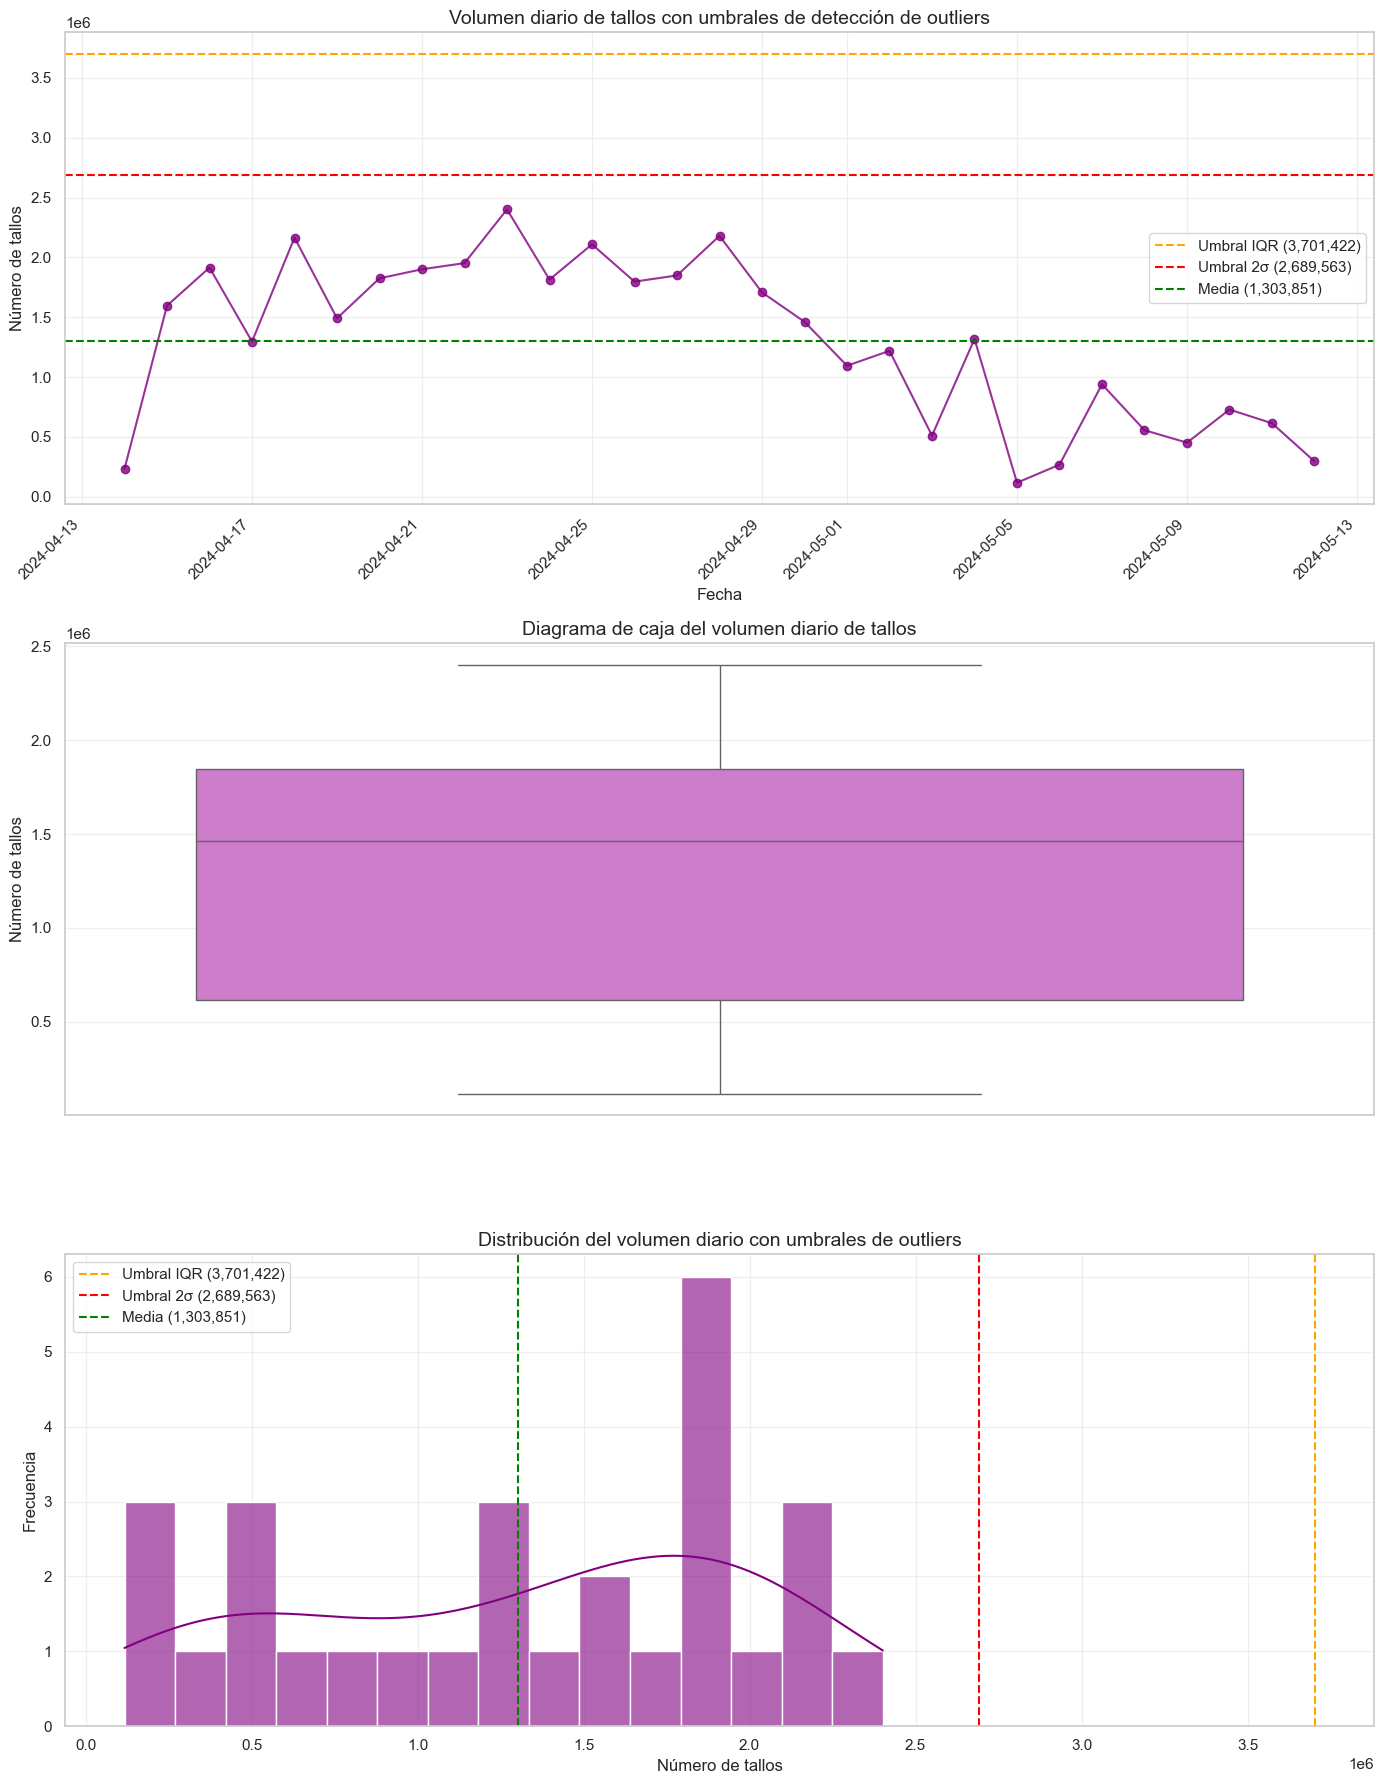

In [42]:
# Visualizaciones para identificar valores extremos en la demanda previa al Día de la Madre
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))

# Gráfico 1: Serie temporal con umbrales de outliers
ax1.plot(daily_stems['Date'], daily_stems['Stems'], marker='o', linestyle='-', color='purple', alpha=0.8)
ax1.axhline(y=upper_bound, color='orange', linestyle='--', label=f'Umbral IQR ({upper_bound:,.0f})')
ax1.axhline(y=upper_std_bound, color='red', linestyle='--', label=f'Umbral {threshold}σ ({upper_std_bound:,.0f})')
ax1.axhline(y=mean_val, color='green', linestyle='--', label=f'Media ({mean_val:,.0f})')

# Resaltar los outliers
for _, row in outliers_std.iterrows():
    ax1.plot(row['Date'], row['Stems'], 'ro', markersize=10)
    ax1.annotate(f"{row['date_str']}\n{row['Stems']:,.0f}", 
                 xy=(row['Date'], row['Stems']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=9, fontweight='bold', color='red')

ax1.set_title('Volumen diario de tallos con umbrales de detección de outliers', fontsize=14)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Número de tallos')
ax1.grid(True, alpha=0.3)
ax1.legend()
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Gráfico 2: Diagrama de caja para visualizar la distribución y los outliers
sns.boxplot(y=daily_stems['Stems'], ax=ax2, color='orchid')
ax2.set_title('Diagrama de caja del volumen diario de tallos', fontsize=14)
ax2.set_ylabel('Número de tallos')
ax2.grid(True, axis='y', alpha=0.3)

# Gráfico 3: Distribución con umbrales marcados
sns.histplot(daily_stems['Stems'], kde=True, ax=ax3, bins=15, color='purple', alpha=0.6)
ax3.axvline(x=upper_bound, color='orange', linestyle='--', label=f'Umbral IQR ({upper_bound:,.0f})')
ax3.axvline(x=upper_std_bound, color='red', linestyle='--', label=f'Umbral {threshold}σ ({upper_std_bound:,.0f})')
ax3.axvline(x=mean_val, color='green', linestyle='--', label=f'Media ({mean_val:,.0f})')
ax3.set_title('Distribución del volumen diario con umbrales de outliers', fontsize=14)
ax3.set_xlabel('Número de tallos')
ax3.set_ylabel('Frecuencia')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

3. Análisis por día de la semana para identificar patrones específicos


----- PATRONES POR DÍA DE LA SEMANA -----
Monday: Promedio=1,381,114, Máximo=1,952,182, Día pico=22 Apr
Tuesday: Promedio=1,679,396, Máximo=2,401,255, Día pico=23 Apr
Wednesday: Promedio=1,190,483, Máximo=1,814,530, Día pico=24 Apr
Thursday: Promedio=1,486,330, Máximo=2,165,137, Día pico=18 Apr
Friday: Promedio=1,132,076, Máximo=1,797,496, Día pico=26 Apr
Saturday: Promedio=1,401,712, Máximo=1,849,139, Día pico=27 Apr
Sunday: Promedio=945,446, Máximo=2,180,069, Día pico=28 Apr


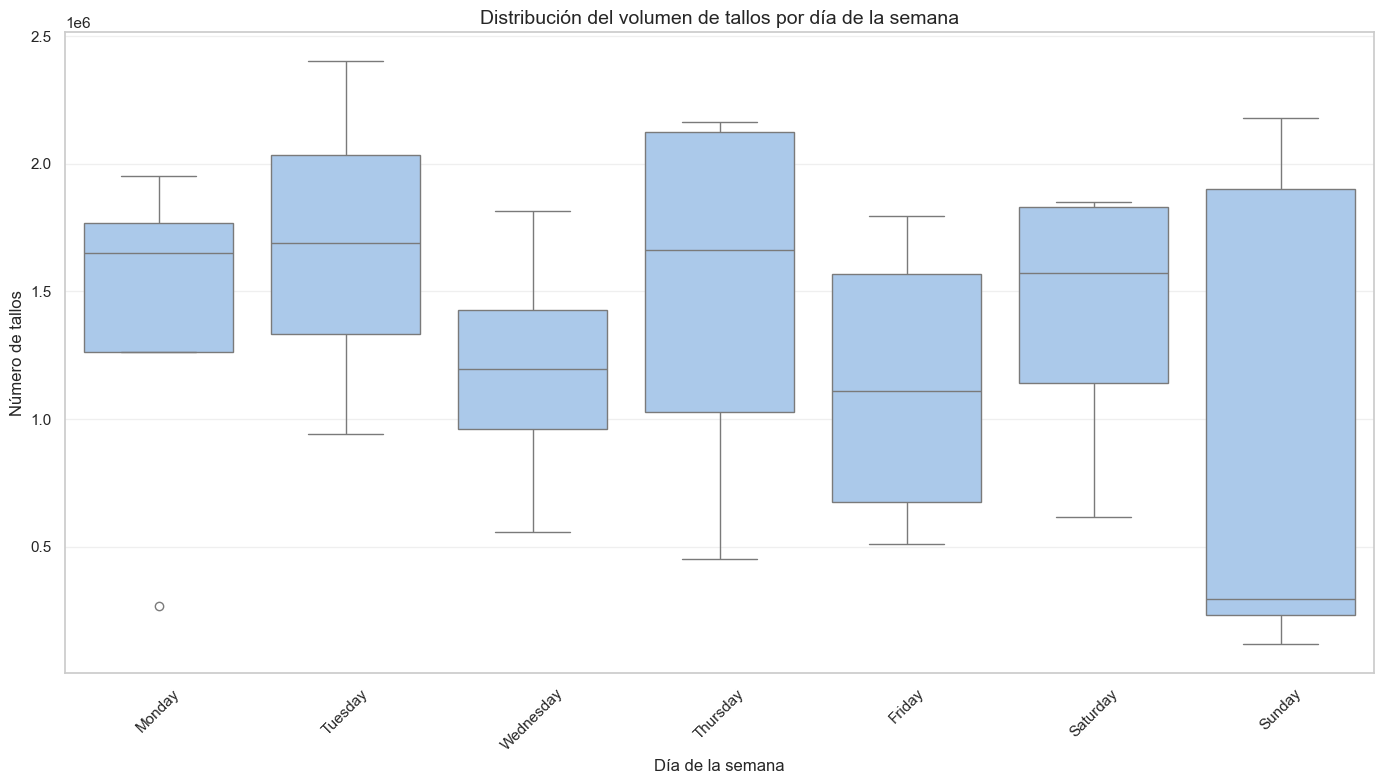

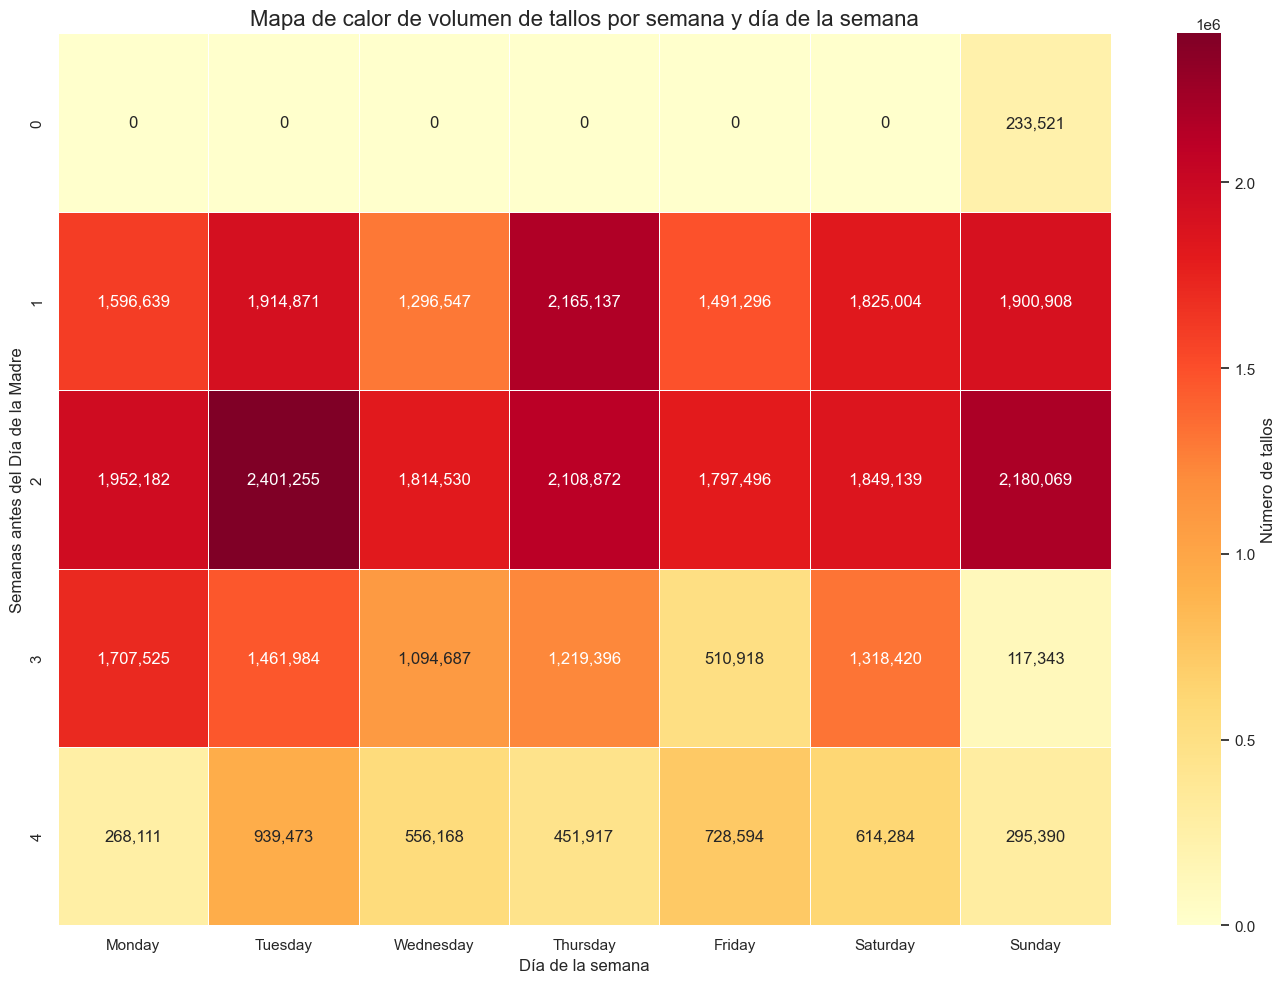

In [43]:
# Análisis por día de la semana para identificar patrones específicos
daily_stems['day_of_week'] = daily_stems['Date'].dt.day_name()
daily_stems['week_number'] = 4 - (daily_stems['days_to_mothers_day'] // 7)  # Semanas desde el inicio del período

# Crear resumen por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = daily_stems.groupby('day_of_week')['Stems'].agg(['mean', 'median', 'max', 'min']).reindex(day_order)

print("\n----- PATRONES POR DÍA DE LA SEMANA -----")
for day, row in day_stats.iterrows():
    print(f"{day}: Promedio={row['mean']:,.0f}, Máximo={row['max']:,.0f}, Día pico={(daily_stems[daily_stems['Stems']==row['max']]['date_str'].values[0] if row['max'] in daily_stems['Stems'].values else 'N/A')}")

# Visualizar patrones por día de la semana
plt.figure(figsize=(14, 8))
sns.boxplot(x='day_of_week', y='Stems', data=daily_stems, order=day_order)
plt.title('Distribución del volumen de tallos por día de la semana', fontsize=14)
plt.xlabel('Día de la semana')
plt.ylabel('Número de tallos')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap por semana y día para identificar los patrones de demanda
pivot_data = daily_stems.pivot_table(
    index='week_number', 
    columns='day_of_week', 
    values='Stems', 
    aggfunc='sum',
    fill_value=0
).reindex(columns=day_order)

# Crear heatmap con etiquetas de valores
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_data, cmap="YlOrRd", annot=True, fmt=",d",
                linewidths=0.5, cbar_kws={'label': 'Número de tallos'})

# Resaltar valores extremos
max_value = pivot_data.max().max()
for i, week in enumerate(pivot_data.index):
    for j, day in enumerate(pivot_data.columns):
        value = pivot_data.loc[week, day]
        if value > upper_std_bound:
            # Marcar celdas con valores extremos
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('Mapa de calor de volumen de tallos por semana y día de la semana', fontsize=16)
plt.ylabel('Semanas antes del Día de la Madre')
plt.xlabel('Día de la semana')
plt.tight_layout()
plt.show()

4. Comparación con años anteriores para identificar anomalías

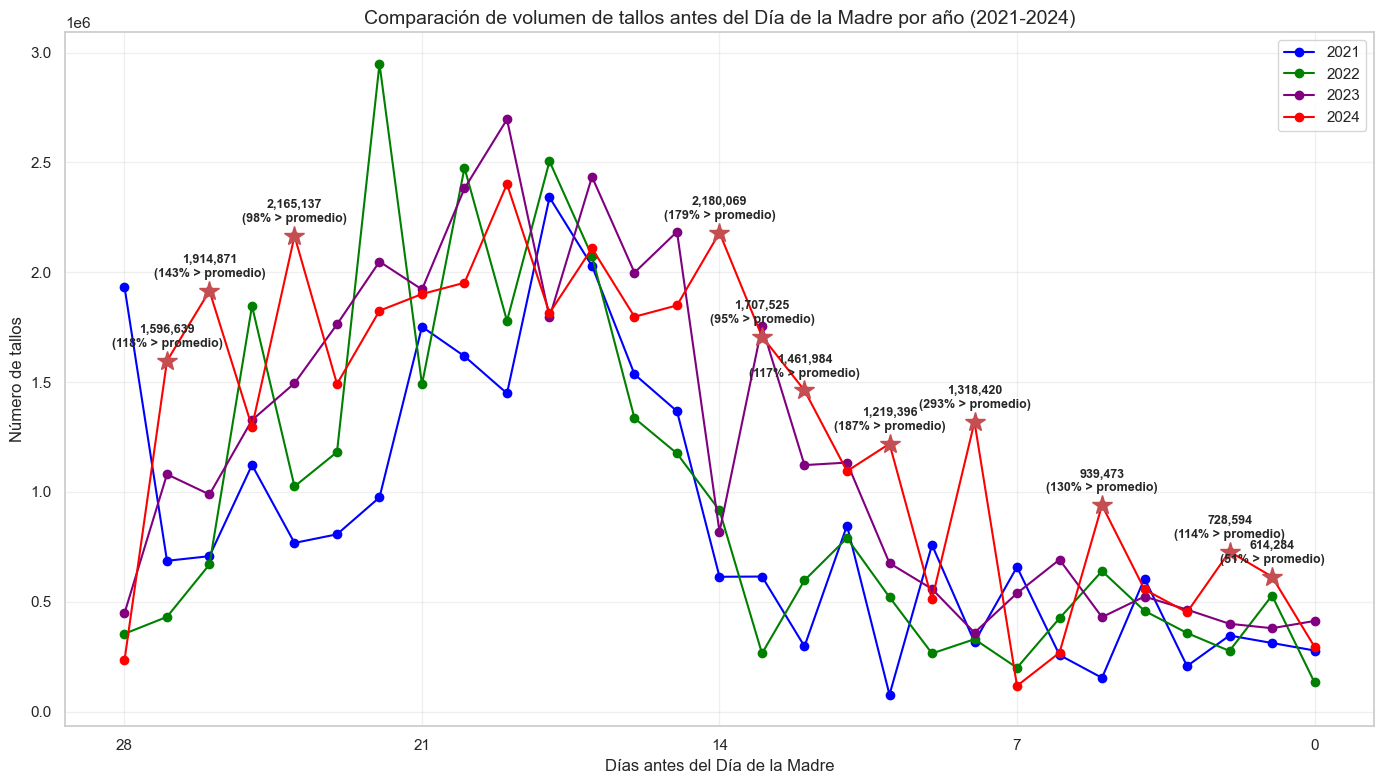

In [44]:
# Comparar con años anteriores para identificar anomalías en la demanda
previous_years = [2021, 2022, 2023] 
current_year = 2024 # Asegurarse de que 2024 esté incluido
all_years = previous_years + [current_year]  

mothers_day_dates = {}
for year in all_years:  # Usar all_years en lugar de previous_years + [2024]
    for date in holiday_dates_by_name['mothers_day']:
        if date.year == year:
            mothers_day_dates[year] = date
            break

# Preparar datos para comparación
yearly_data = {}
for year in all_years:  # Usar all_years para la iteración
    if year in mothers_day_dates:
        start = mothers_day_dates[year] - pd.Timedelta(days=28)
        yearly_data[year] = df[(df['Year'] == year) & 
                              (df['Date'] >= start) & 
                              (df['Date'] <= mothers_day_dates[year])].copy()
        
        if not yearly_data[year].empty:
            # Agregar días hasta el Día de la Madre para alinear fechas entre años
            yearly_data[year]['days_to_mothers_day'] = (mothers_day_dates[year] - yearly_data[year]['Date']).dt.days
            # Agrupar por días restantes
            yearly_data[year] = yearly_data[year].groupby('days_to_mothers_day')['Stems'].sum().reset_index()

# Visualizar comparación con años anteriores
plt.figure(figsize=(14, 8))
colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'red'}  # Asegurarnos de que 2024 tenga color

# Graficar todos los años, incluido 2024
for year in all_years:  # Usar all_years para incluir tanto años previos como actuales
    if year in yearly_data and not yearly_data[year].empty:
        plt.plot(yearly_data[year]['days_to_mothers_day'], yearly_data[year]['Stems'],
                 marker='o', linestyle='-', label=str(year), color=colors.get(year, 'gray'))

# Resaltar los outliers de 2024 (mantenido igual)
if current_year in yearly_data and not yearly_data[current_year].empty:
    # Identifica outliers en 2024 comparado con el promedio histórico para el mismo día antes del Día de la Madre
    days_to_compare = set(yearly_data[current_year]['days_to_mothers_day'])
    for days_before in days_to_compare:
        values = [yearly_data[y][yearly_data[y]['days_to_mothers_day'] == days_before]['Stems'].values[0] 
                 for y in previous_years if y in yearly_data and not yearly_data[y].empty 
                 and days_before in yearly_data[y]['days_to_mothers_day'].values]
        
        if values:  # Si hay datos históricos para este día
            avg_historical = sum(values) / len(values)
            current_value = yearly_data[current_year][yearly_data[current_year]['days_to_mothers_day'] == days_before]['Stems'].values[0]
            
            # Si el valor actual es más del 50% mayor que el promedio histórico, marcarlo como outlier
            if current_value > avg_historical * 1.5:
                plt.plot(days_before, current_value, 'r*', markersize=15)
                plt.annotate(f"{current_value:,.0f}\n({(current_value/avg_historical-1)*100:.0f}% > promedio)",
                             xy=(days_before, current_value),
                             xytext=(0, 10), textcoords='offset points',
                             ha='center', fontsize=9, fontweight='bold')

plt.gca().invert_xaxis()  # Para que el conteo sea hacia el día de la madre
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Comparación de volumen de tallos antes del Día de la Madre por año (2021-2024)', fontsize=14)
plt.xlabel('Días antes del Día de la Madre')
plt.ylabel('Número de tallos')
plt.xticks(range(0, 29, 7))  # Mostrar marcas semanales
plt.tight_layout()
plt.show()

5. Análisis de valores extremos por tipo de flor

In [45]:
# Análisis de valores extremos por tipo de flor
# Identificar qué flores contribuyen más a los picos de demanda
top_days = daily_stems.nlargest(5, 'Stems')
print("\n----- ANÁLISIS DE FLORES EN DÍAS DE MÁXIMA DEMANDA -----")

for _, row in top_days.iterrows():
    day_data = mothers_day_prep_2024[mothers_day_prep_2024['Date'] == row['Date']]
    top_flowers = day_data.groupby('Flower')['Stems'].sum().nlargest(5).reset_index()
    
    print(f"\nDía: {row['date_str']} ({row['days_to_mothers_day']} días antes del Día de la Madre)")
    print(f"Volumen total: {row['Stems']:,.0f} tallos")
    print("Top 5 flores:")
    for i, (_, flower_row) in enumerate(top_flowers.iterrows(), 1):
        percentage = (flower_row['Stems'] / row['Stems']) * 100
        print(f"  {i}. {flower_row['Flower']}: {flower_row['Stems']:,.0f} tallos ({percentage:.1f}%)")


----- ANÁLISIS DE FLORES EN DÍAS DE MÁXIMA DEMANDA -----

Día: 23 Apr (19 días antes del Día de la Madre)
Volumen total: 2,401,255 tallos
Top 5 flores:
  1. Daisy: 248,982 tallos (10.4%)
  2. Rose - Color: 224,715 tallos (9.4%)
  3. Cremon: 216,097 tallos (9.0%)
  4. Cushion: 202,327 tallos (8.4%)
  5. Carnation: 195,980 tallos (8.2%)

Día: 28 Apr (14 días antes del Día de la Madre)
Volumen total: 2,180,069 tallos
Top 5 flores:
  1. Daisy: 284,066 tallos (13.0%)
  2. Rose - Color: 234,287 tallos (10.7%)
  3. Carnation: 206,565 tallos (9.5%)
  4. Minicarnation: 195,912 tallos (9.0%)
  5. Novelty: 115,611 tallos (5.3%)

Día: 18 Apr (24 días antes del Día de la Madre)
Volumen total: 2,165,137 tallos
Top 5 flores:
  1. Daisy: 268,912 tallos (12.4%)
  2. Carnation: 232,344 tallos (10.7%)
  3. Alstroemeria: 175,711 tallos (8.1%)
  4. Novelty: 165,092 tallos (7.6%)
  5. Cushion: 163,198 tallos (7.5%)

Día: 25 Apr (17 días antes del Día de la Madre)
Volumen total: 2,108,872 tallos
Top 5 flore

### 3. Análisis de pico del Dia de la Independecia

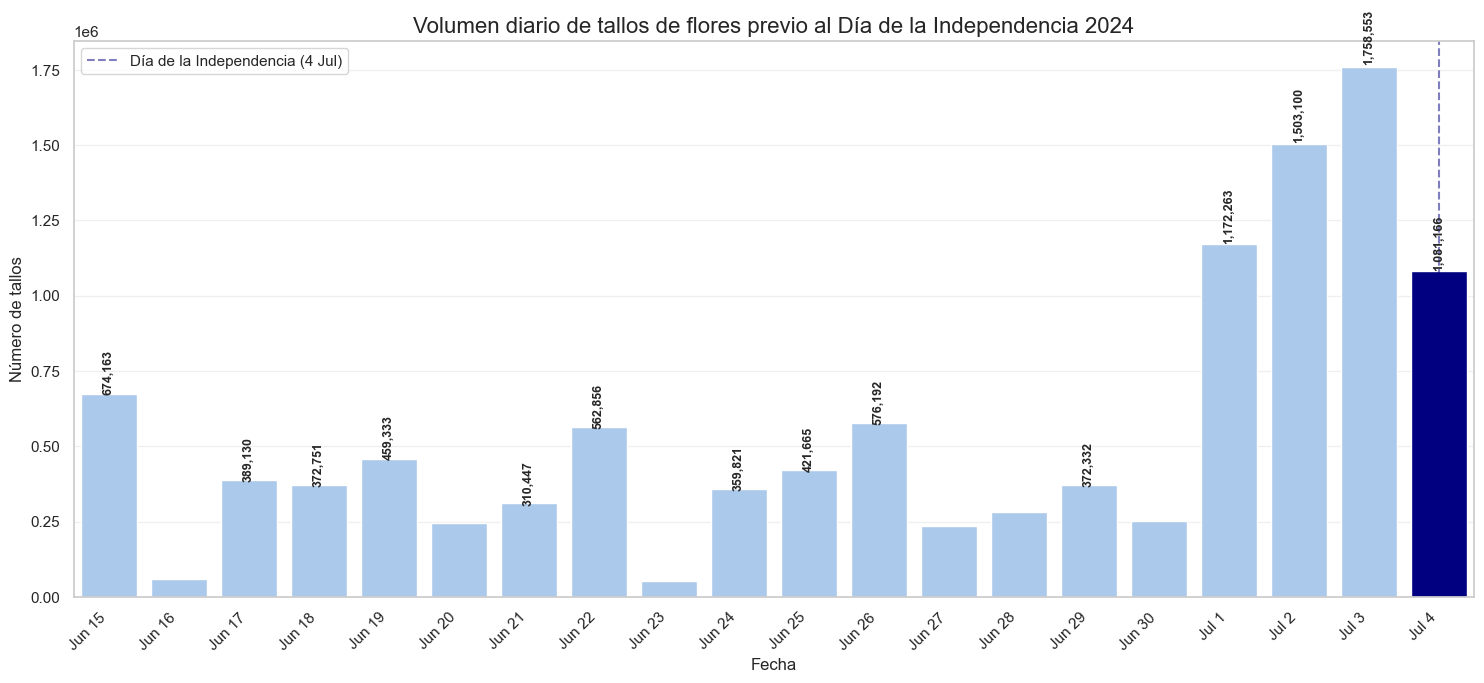

In [58]:
# Filtrar datos para el período del Día de la Independencia 2024 (junio y julio)
independence_day_period_2024 = df[(df['Year'] == 2024) & 
                               ((df['Month'] == 6) & (df['Day'] >= 15)) | 
                               ((df['Month'] == 7) & (df['Day'] <= 4))]

# Agrupar por fecha y sumar los tallos
daily_stems_independence = independence_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Crear una nueva columna de fecha para una correcta clasificación
daily_stems_independence['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_independence['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_independence['Day'].astype(str).str.zfill(2))
daily_stems_independence = daily_stems_independence.sort_values('date')

# Crear un gráfico de barras
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_independence)

# Formatear etiquetas del eje x
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_independence['date']]
plt.xticks(range(len(daily_stems_independence)), date_labels, rotation=45, ha='right')

# Resaltar el Día de la Independencia
independence_idx = daily_stems_independence[
    (daily_stems_independence['Month'] == 7) & 
    (daily_stems_independence['Day'] == 4)
].index

if len(independence_idx) > 0:
    independence_idx = independence_idx[0]
    ax.patches[independence_idx].set_facecolor('navy')

# Añadir etiquetas de texto para los picos
for i, v in enumerate(daily_stems_independence['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Añadir título y etiquetas 
plt.title('Volumen diario de tallos de flores previo al Día de la Independencia 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Independence Day
if isinstance(independence_idx, (int, np.integer)):
    plt.axvline(x=independence_idx, color='navy', linestyle='--', alpha=0.5, label="Día de la Independencia (4 Jul)")

plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Verificar datos entre el 1 y 3 de julio 2024
# Asegurar que pandas está importado correctamente
import pandas as pd  # Incluir el import para evitar errores
audit_dates = pd.date_range('2024-07-01', '2024-07-03')
audit_data = df[df['Date'].isin(audit_dates)]

# Agrupar por fecha para obtener el total de tallos por día
audit_summary = audit_data.groupby('Date')['Stems'].sum().reset_index()

print("Resumen de tallos por día:")
print(audit_summary)

# Verificar si hay datos para todas las fechas solicitadas
missing_dates = set(audit_dates) - set(audit_data['Date'].unique())
if missing_dates:
	print(f"\n¡ATENCIÓN! Faltan datos para las siguientes fechas:")
	for date in sorted(missing_dates):
		print(f"  - {date.strftime('%Y-%m-%d')}")

Resumen de tallos por día:
        Date   Stems
0 2024-07-01  327214
1 2024-07-02  406135
2 2024-07-03  534719


Semana 1: 2024-06-17 a 2024-06-23
Semana 2: 2024-06-24 a 2024-06-30
Semana 3: 2024-07-01 a 2024-07-04
Día de la Independencia marcado en: Semana 3, Thursday


<Figure size 1400x800 with 0 Axes>

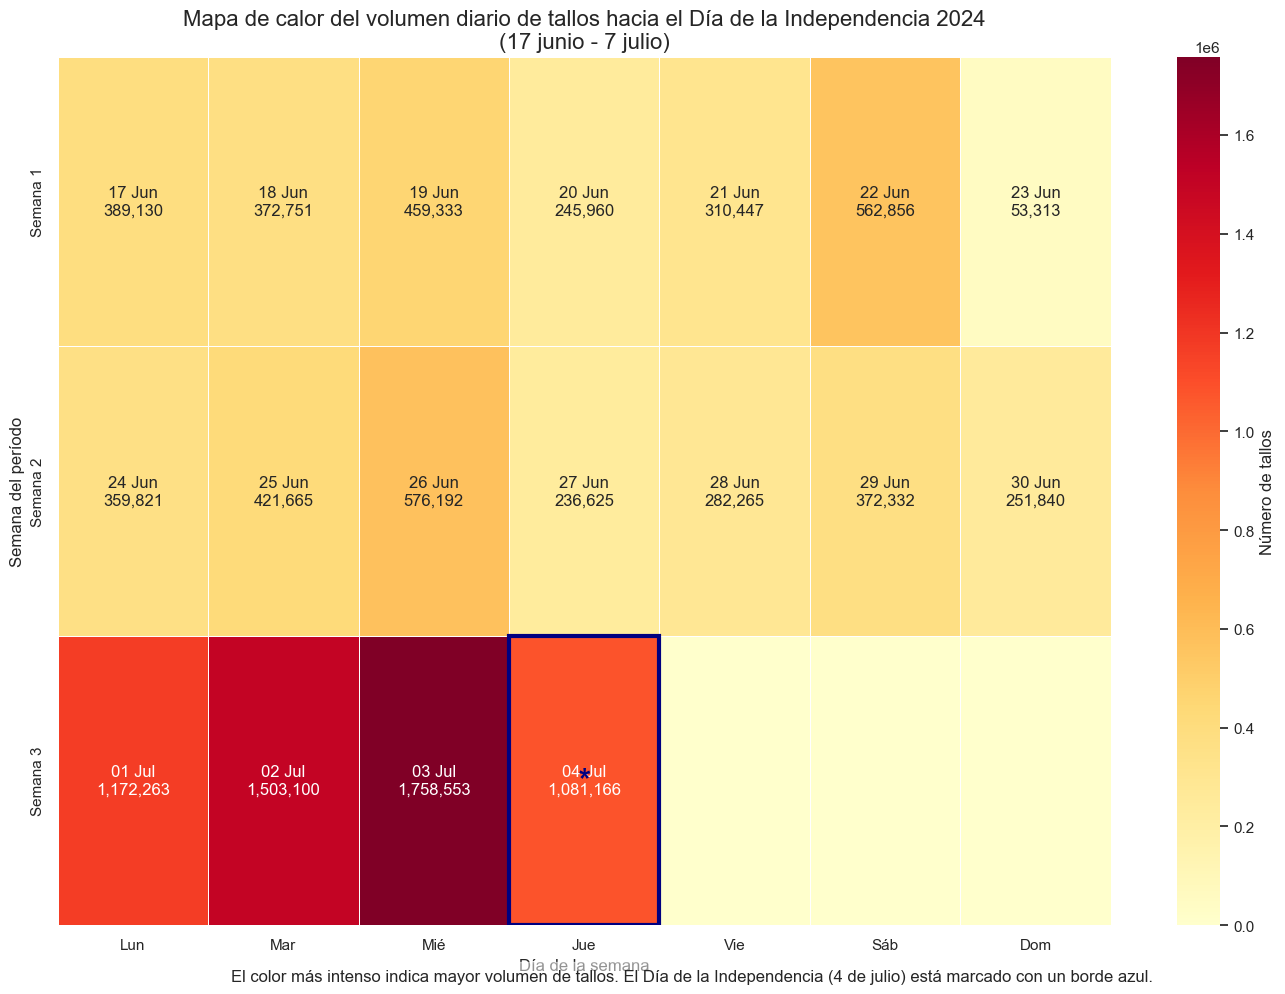

In [61]:
# Crear un mapeo de calor (heatmap) para visualizar el patrón de volumen de tallos hacia el Día de la Independencia 2024
plt.figure(figsize=(14, 8))

# Establecer fechas de inicio y fin para el análisis
start_date = pd.Timestamp('2024-06-17')
end_date = pd.Timestamp('2024-07-07')

# IMPORTANTE: Usar exactamente el mismo método de filtrado de datos que el gráfico de barras
independence_day_period_2024 = df[(df['Year'] == 2024) & 
                               ((df['Month'] == 6) & (df['Day'] >= 15)) | 
                               ((df['Month'] == 7) & (df['Day'] <= 4))]

# Agrupar por fecha y sumar los tallos, igual que en el gráfico de barras
daily_stems_independence = independence_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_independence['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_independence['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_independence['Day'].astype(str).str.zfill(2))
daily_stems_independence = daily_stems_independence.sort_values('date')

# Filtrar solo las fechas dentro del rango que queremos visualizar
independence_data = daily_stems_independence[
    (daily_stems_independence['date'] >= start_date) & 
    (daily_stems_independence['date'] <= end_date)
].copy()

# Organizar datos por día y semana para el heatmap
independence_data['day_of_week'] = independence_data['date'].dt.day_name()

# CORRECCIÓN: Usar días secuenciales para asignar semanas correctas
min_date = independence_data['date'].min()
independence_data['days_from_start'] = (independence_data['date'] - min_date).dt.days
independence_data['week_number'] = independence_data['days_from_start'] // 7 + 1

# Verificar la asignación de semanas
for week in sorted(independence_data['week_number'].unique()):
    week_dates = independence_data[independence_data['week_number'] == week]['date']
    print(f"Semana {week}: {min(week_dates).strftime('%Y-%m-%d')} a {max(week_dates).strftime('%Y-%m-%d')}")

# Crear una matriz para el heatmap organizando por semana y día de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Configuración para el heatmap
heatmap_data = []
week_labels = []
day_labels = []
annotations = []

# Procesar datos para construir el heatmap
for week in sorted(independence_data['week_number'].unique()):
    week_data = independence_data[independence_data['week_number'] == week]
    row = []
    row_annotations = []
    
    for day in days_order:
        day_data = week_data[week_data['day_of_week'] == day]
        if not day_data.empty:
            row.append(day_data['Stems'].values[0])
            
            if week == 1:  # Solo agregar etiquetas de día una vez (primera semana)
                day_labels.append(day[:3])
                
            # Guardar información para anotaciones
            date_str = day_data['date'].dt.strftime('%d %b').values[0]  # Formato día-mes
            stem_count = day_data['Stems'].values[0]
            row_annotations.append(f"{date_str}\n{stem_count:,.0f}")
        else:
            row.append(0)
            row_annotations.append("")
            
            if week == 1 and day not in [d[:3] for d in day_labels]:  # Si estamos en la primera semana, agregar etiqueta
                day_labels.append(day[:3])
    
    if any(row):  # Solo agregar filas no vacías
        heatmap_data.append(row)
        annotations.append(row_annotations)
        week_labels.append(f"Semana {week}")

# Convertir a numpy array
heatmap_array = np.array(heatmap_data)

# Crear el heatmap
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_array, cmap="YlOrRd", annot=annotations, fmt="",
                linewidths=0.5, cbar_kws={'label': 'Número de tallos'})

# Configurar etiquetas
plt.yticks(np.arange(len(week_labels)) + 0.5, week_labels)
plt.xticks(np.arange(len(day_labels)) + 0.5, day_labels)

# Traducir nombres de días abreviados
day_labels_es = {'Mon': 'Lun', 'Tue': 'Mar', 'Wed': 'Mié', 
                'Thu': 'Jue', 'Fri': 'Vie', 'Sat': 'Sáb', 'Sun': 'Dom'}
plt.xticks(np.arange(len(day_labels)) + 0.5, [day_labels_es.get(day, day) for day in day_labels])

# Marcar el Día de la Independencia
for i in range(len(heatmap_data)):
    for j in range(len(days_order)):
        # Filtrar los datos para este día específico
        day_week_data = independence_data[
            (independence_data['week_number'] == i+1) & 
            (independence_data['day_of_week'] == days_order[j])
        ]
        
        # Si hay datos para esta celda y corresponde al 4 de julio
        if not day_week_data.empty:
            current_date = day_week_data['date'].iloc[0]
            if current_date.month == 7 and current_date.day == 4:
                # Marcar Día de la Independencia con borde azul
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='navy', lw=3))
                
                # Usar un símbolo alternativo que funcione con Arial en lugar de ★
                plt.text(j + 0.5, i + 0.5, "*", ha='center', va='center', fontsize=22, 
                         color='navy', fontweight='bold')
                print(f"Día de la Independencia marcado en: Semana {i+1}, {days_order[j]}")

plt.title('Mapa de calor del volumen diario de tallos hacia el Día de la Independencia 2024\n(17 junio - 7 julio)', fontsize=16)
plt.ylabel('Semana del período')
plt.xlabel('Día de la semana')

# Agregar una nota explicativa
plt.figtext(0.5, 0.01, 
           "El color más intenso indica mayor volumen de tallos. El Día de la Independencia (4 de julio) está marcado con un borde azul.",
           ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

### 5 Análisis del pico de Acción de Gracias

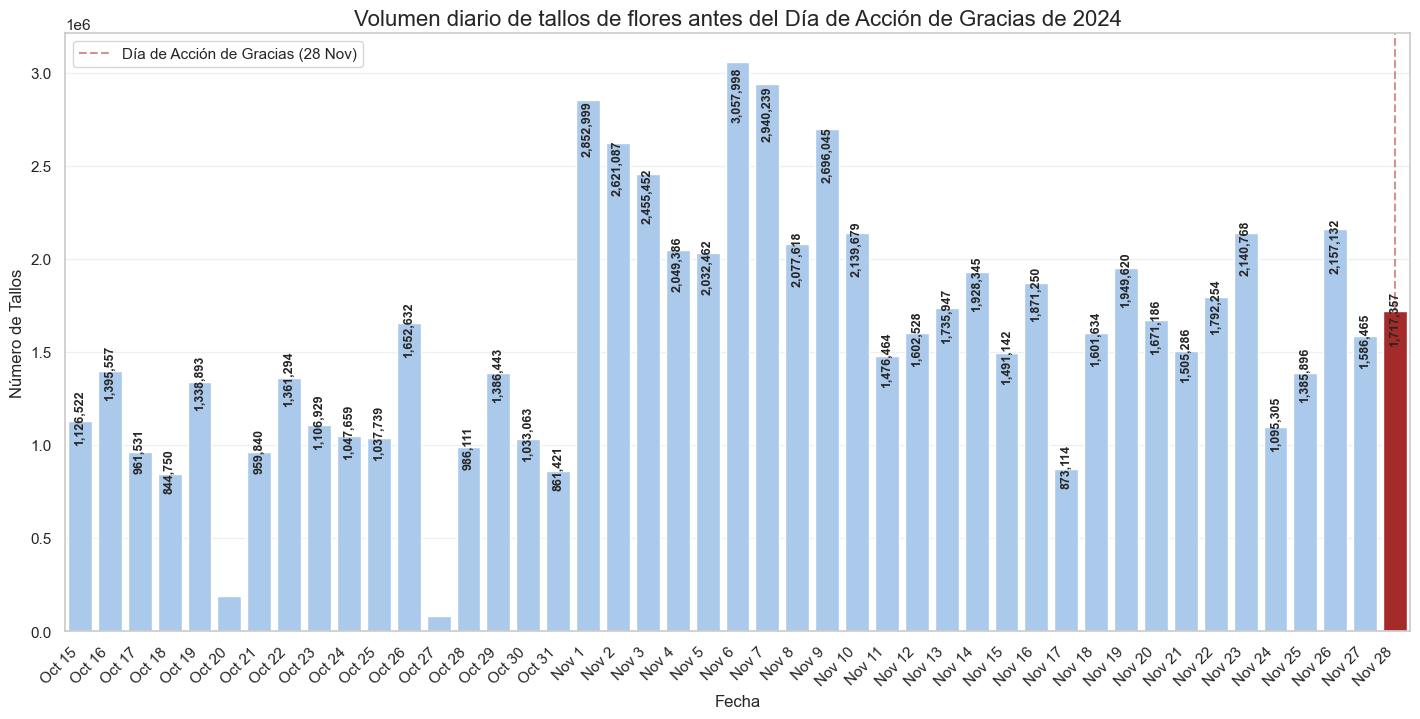

In [49]:
# Filtrar datos para el período del 15 de octubre al 28 de noviembre de 2024 (Día de Acción de Gracias)
thanksgiving_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 10) & (df['Day'] >= 15)) | 
                           ((df['Month'] == 11) & (df['Day'] <= 28))]

# Encontrar la fecha exacta
thanksgiving_date = None
for date in holiday_dates_by_name['thanksgiving']:
    if date.year == 2024:
        thanksgiving_date = date
        break

# Agrupar por fecha y sumar los tallos
daily_stems_thanksgiving = thanksgiving_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Crear una nueva columna de fecha para una correcta clasificación
daily_stems_thanksgiving['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_thanksgiving['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_thanksgiving['Day'].astype(str).str.zfill(2))
daily_stems_thanksgiving = daily_stems_thanksgiving.sort_values('date')

# Crear un gráfico de barras para el volumen diario de tallos de flores
plt.figure(figsize=(15, 8))  # Aumentada la altura para evitar superposiciones
ax = sns.barplot(x='date', y='Stems', data=daily_stems_thanksgiving)

# Formatear etiquetas del eje x
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_thanksgiving['date']]
# Traducir nombres de meses al español
translation = {'Jan': 'Ene', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Abr', 
               'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Aug': 'Ago', 
               'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dec': 'Dic'}
date_labels = [f"{translation.get(d.split()[0], d.split()[0])} {d.split()[1]}" for d in date_labels]
plt.xticks(range(len(daily_stems_thanksgiving)), date_labels, rotation=45, ha='right')

# Resaltar el Día de Acción de Gracias
if thanksgiving_date:
    thanksgiving_idx = daily_stems_thanksgiving[
        (daily_stems_thanksgiving['Month'] == thanksgiving_date.month) & 
        (daily_stems_thanksgiving['Day'] == thanksgiving_date.day)
    ].index
    
    if not thanksgiving_idx.empty:
        thanksgiving_idx = thanksgiving_idx[0]
        ax.patches[thanksgiving_idx].set_facecolor('brown')

# Añadir etiquetas de texto para los picos
for i, v in enumerate(daily_stems_thanksgiving['Stems']):
    if v > 300000:  # Solo etiquetar picos significativos
        ax.text(i, v * 0.9, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Añadir título y etiquetas
plt.title('Volumen diario de tallos de flores antes del Día de Acción de Gracias de 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Dibujar una línea vertical en el Día de Acción de Gracias
if thanksgiving_date and isinstance(thanksgiving_idx, (int, np.integer)):
    plt.axvline(x=thanksgiving_idx, color='brown', linestyle='--', alpha=0.5, label="Día de Acción de Gracias (28 Nov)")

plt.legend()
plt.tight_layout(pad=3.0)  # Añadido más padding para evitar superposiciones
plt.show()

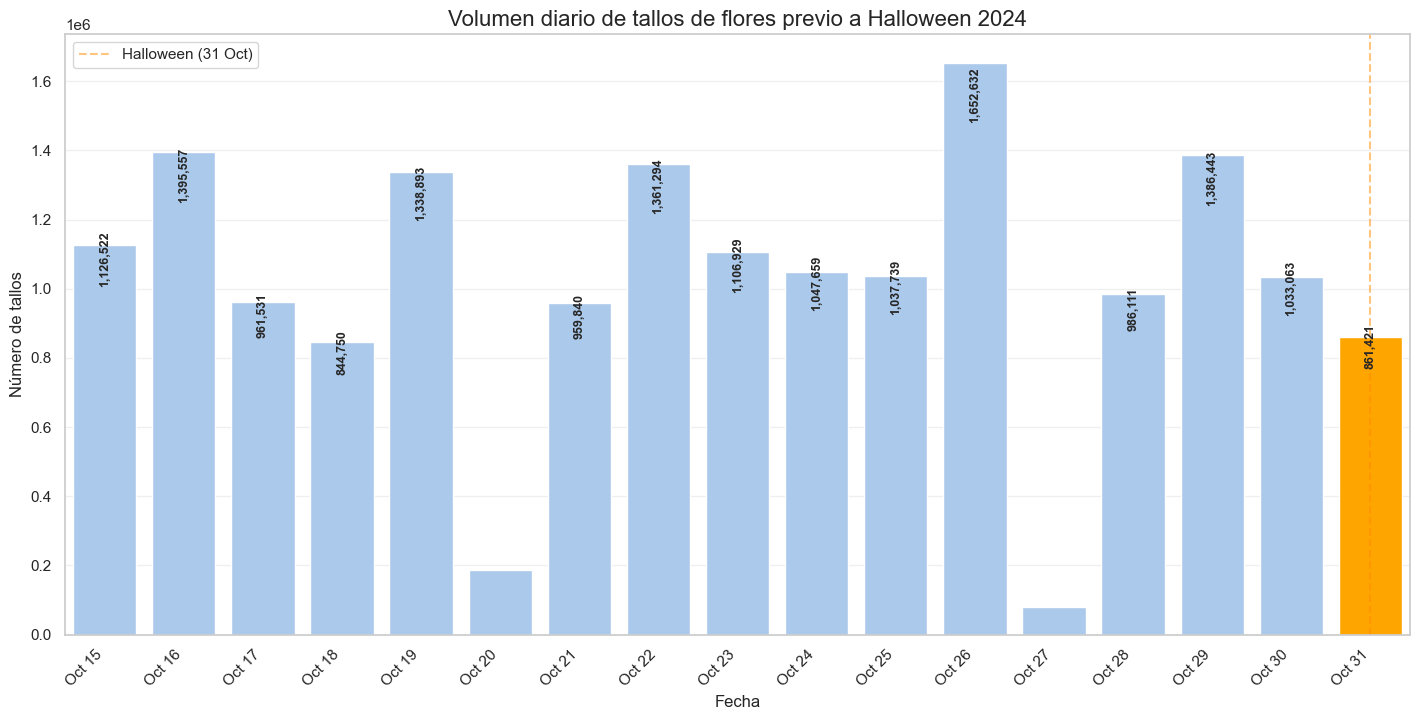

In [105]:
# Filtrar datos para el período de Halloween (15 de octubre al 31 de octubre)
halloween_period_2024 = df[(df['Year'] == 2024) & 
                          ((df['Month'] == 10) & (df['Day'] >= 15) & (df['Day'] <= 31))]

# Encontrar la fecha exacta de Halloween
halloween_date = None
for date in holiday_dates_by_name['halloween']:
    if date.year == 2024:
        halloween_date = date
        break

# Agrupar por fecha y sumar los tallos
daily_stems_halloween = halloween_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Crear una columna de fecha para ordenamiento
daily_stems_halloween['date'] = pd.to_datetime('2024-' + 
                                           daily_stems_halloween['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_halloween['Day'].astype(str).str.zfill(2))
daily_stems_halloween = daily_stems_halloween.sort_values('date')

# Crear un gráfico de barras para el volumen diario de tallos
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_halloween)

# Formatear etiquetas del eje x
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_halloween['date']]
# Traducir nombres de meses al español
translation = {'Jan': 'Ene', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Abr', 
               'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Aug': 'Ago', 
               'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dec': 'Dic'}
date_labels = [f"{translation.get(d.split()[0], d.split()[0])} {d.split()[1]}" for d in date_labels]
plt.xticks(range(len(daily_stems_halloween)), date_labels, rotation=45, ha='right')

# Resaltar el día de Halloween
halloween_idx = daily_stems_halloween[
    (daily_stems_halloween['Month'] == halloween_date.month) & 
    (daily_stems_halloween['Day'] == halloween_date.day)
].index

if not halloween_idx.empty:
    halloween_idx = halloween_idx[0]
    ax.patches[halloween_idx].set_facecolor('orange')

# Añadir etiquetas de texto para los picos significativos
for i, v in enumerate(daily_stems_halloween['Stems']):
    if v > 300000:  # Solo etiquetar picos significativos
        ax.text(i, v * 0.9, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Añadir título y etiquetas
plt.title('Volumen diario de tallos de flores previo a Halloween 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Dibujar una línea vertical en el día de Halloween
if isinstance(halloween_idx, (int, np.integer)):
    plt.axvline(x=halloween_idx, color='darkorange', linestyle='--', alpha=0.5, label="Halloween (31 Oct)")

plt.legend()
plt.tight_layout(pad=3.0)
plt.show()

### 6. Anáisis del pico de Navidad

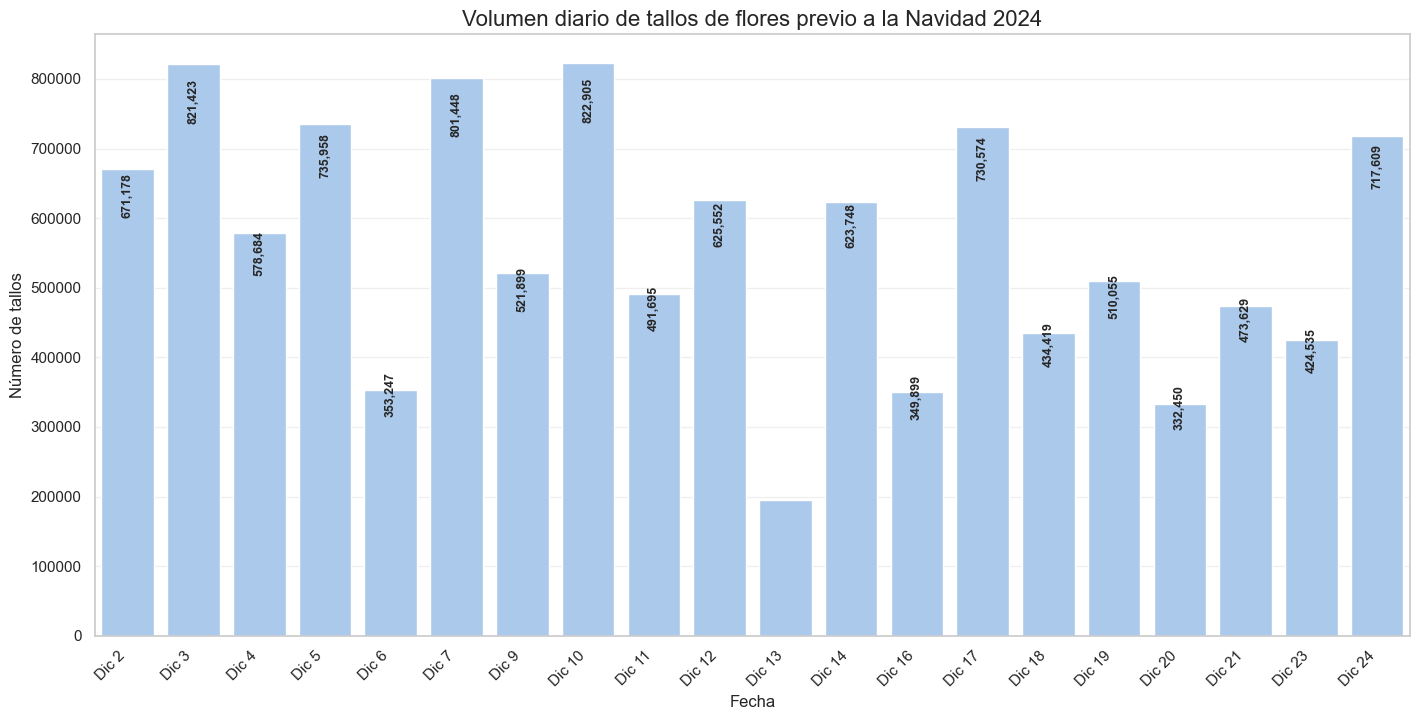

In [50]:
# Filtrar datos para el período del 1 al 25 de diciembre de 2024 (Navidad)
christmas_period_2024 = df[(df['Year'] == 2024) & 
                         (df['Month'] == 12) & 
                         (df['Day'] <= 25)]
# Encontrar la fecha exacta de Navidad 2024
christmas_date = None
for date in holiday_dates_by_name['christmas']:
    if date.year == 2024:
        christmas_date = date
        break

# Agrupar por fecha y sumar los tallos
daily_stems_christmas = christmas_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Crear una nueva columna de fecha para una correcta clasificación
daily_stems_christmas['date'] = pd.to_datetime('2024-' + 
                                          daily_stems_christmas['Month'].astype(str).str.zfill(2) + '-' + 
                                          daily_stems_christmas['Day'].astype(str).str.zfill(2))
daily_stems_christmas = daily_stems_christmas.sort_values('date')

# Graficar el volumen diario de tallos durante el período navideño
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_christmas)

# Formatear etiquetas del eje x
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_christmas['date']]
# Traducir nombres de meses al español
translation = {'Jan': 'Ene', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Abr', 
               'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Aug': 'Ago', 
               'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dec': 'Dic'}
date_labels = [f"{translation.get(d.split()[0], d.split()[0])} {d.split()[1]}" for d in date_labels]
plt.xticks(range(len(daily_stems_christmas)), date_labels, rotation=45, ha='right')

# Resaltar el día de Navidad
if christmas_date:
    christmas_idx = daily_stems_christmas[
        (daily_stems_christmas['Month'] == christmas_date.month) & 
        (daily_stems_christmas['Day'] == christmas_date.day)
    ].index
    
    if not christmas_idx.empty:
        christmas_idx = christmas_idx[0]
        ax.patches[christmas_idx].set_facecolor('darkgreen')

# Añadir etiquetas de texto para los picos significativos
for i, v in enumerate(daily_stems_christmas['Stems']):
    if v > 300000:  # Solo etiquetar picos significativos
        ax.text(i, v * 0.9, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Establecer títulos y etiquetas en español
plt.title('Volumen diario de tallos de flores previo a la Navidad 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de tallos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Dibujar una línea vertical en el día de Navidad y añadirla con etiqueta para la leyenda
if christmas_date and isinstance(christmas_idx, (int, np.integer)):
    line = plt.axvline(x=christmas_idx, color='darkgreen', linestyle='--', alpha=0.5, label="Navidad (25 Dic)")
    plt.legend(handles=[line])  # Pasar explícitamente el objeto line a la leyenda

plt.tight_layout(pad=3.0)  # Añadir padding para evitar superposiciones
plt.show()

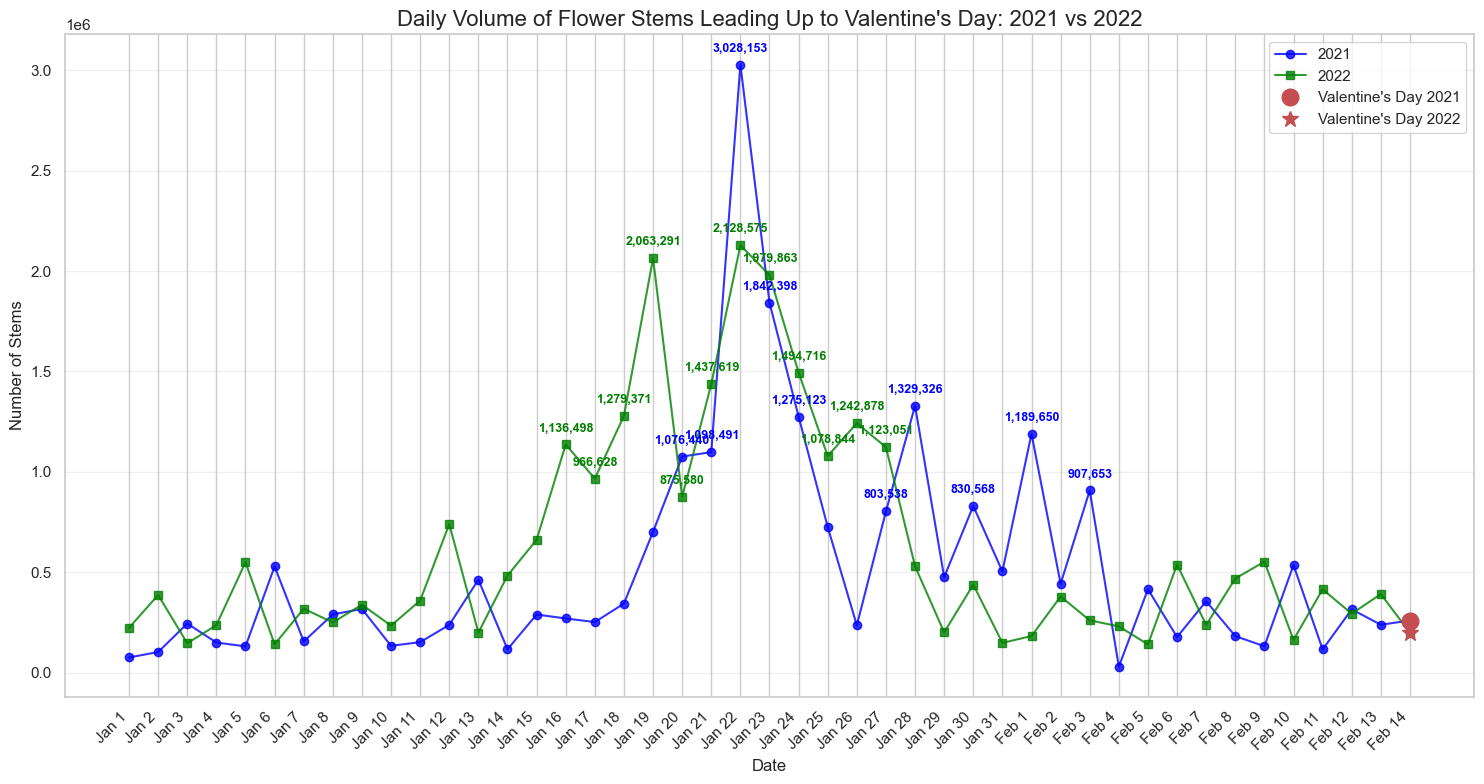

In [51]:
# Comparing Valentine's Day Stem Volume between 2021-2024
# Filter data for Valentine's Day periods in 2021-2022
valentine_2021 = df[(df['Year'] == 2021) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

valentine_2022 = df[(df['Year'] == 2022) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the stems for each year
daily_stems_valentine_2021 = valentine_2021.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2021['date'] = pd.to_datetime('2021-' + 
                                           daily_stems_valentine_2021['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2021['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2021 = daily_stems_valentine_2021.sort_values('date')

daily_stems_valentine_2022 = valentine_2022.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2022['date'] = pd.to_datetime('2022-' + 
                                           daily_stems_valentine_2022['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2022['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2022 = daily_stems_valentine_2022.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_valentine_2021)), daily_stems_valentine_2021['Stems'], 
         marker='o', linestyle='-', color='blue', alpha=0.8, label='2021')

plt.plot(range(len(daily_stems_valentine_2022)), daily_stems_valentine_2022['Stems'], 
         marker='s', linestyle='-', color='green', alpha=0.8, label='2022')

# Add Valentine's Day 2021 marker
valentine_idx_2021 = daily_stems_valentine_2021[
    (daily_stems_valentine_2021['Month'] == 2) & 
    (daily_stems_valentine_2021['Day'] == 14)
].index
if not valentine_idx_2021.empty:
    valentine_idx_2021 = valentine_idx_2021[0]
    plt.plot(valentine_idx_2021, daily_stems_valentine_2021.iloc[valentine_idx_2021]['Stems'], 
             'ro', markersize=12, label="Valentine's Day 2021")

# Add Valentine's Day 2022 marker
valentine_idx_2022 = daily_stems_valentine_2022[
    (daily_stems_valentine_2022['Month'] == 2) & 
    (daily_stems_valentine_2022['Day'] == 14)
].index
if not valentine_idx_2022.empty:
    valentine_idx_2022 = valentine_idx_2022[0]
    plt.plot(valentine_idx_2022, daily_stems_valentine_2022.iloc[valentine_idx_2022]['Stems'], 
             'r*', markersize=12, label="Valentine's Day 2022")

# Format x-axis labels for 2021 (use these as reference)
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine_2021['date']]
plt.xticks(range(len(date_labels)), date_labels, rotation=45, ha='right')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day: 2021 vs 2022', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Highlight key peaks
for i, v in enumerate(daily_stems_valentine_2021['Stems']):
    if v > 800000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='blue')

for i, v in enumerate(daily_stems_valentine_2022['Stems']):
    if v > 800000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='green')

plt.tight_layout()
plt.show()

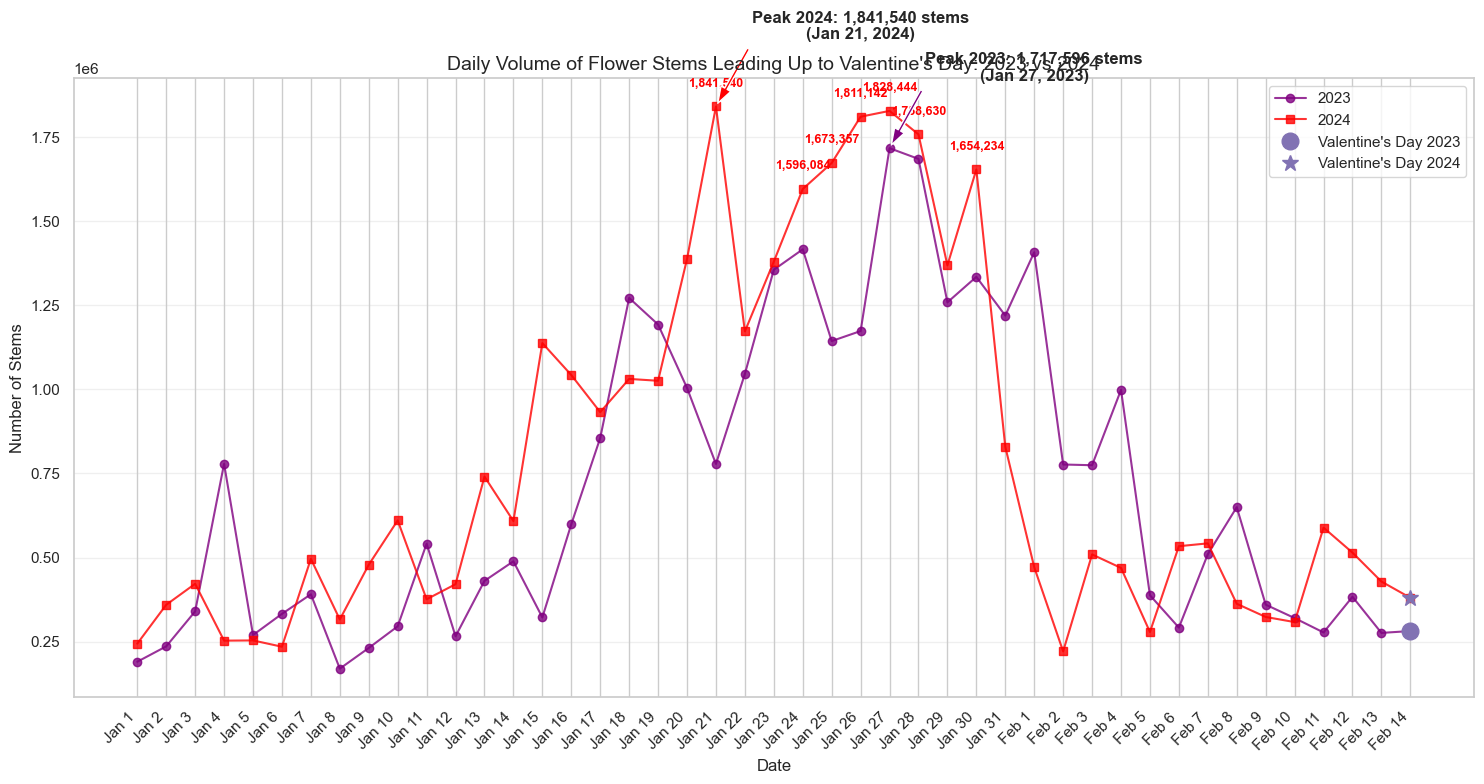

In [52]:
# Comparing Valentine's Day Stem Volume between 2023-2024
# Filter data for Valentine's Day periods in 2023-2024
valentine_2023 = df[(df['Year'] == 2023) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the stems for each year
daily_stems_valentine_2023 = valentine_2023.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2023['date'] = pd.to_datetime('2023-' + 
                                           daily_stems_valentine_2023['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2023['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2023 = daily_stems_valentine_2023.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_valentine_2023)), daily_stems_valentine_2023['Stems'], 
         marker='o', linestyle='-', color='purple', alpha=0.8, label='2023')

# We'll use the valentine data from cell 2 for 2024
# First check if we already have valentine_period_2024 defined from previous cells
if 'valentine_period_2024' in globals():
    # Use the data to create daily stems if not already created
    daily_stems_valentine_2024 = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
    daily_stems_valentine_2024['date'] = pd.to_datetime('2024-' + 
                                                   daily_stems_valentine_2024['Month'].astype(str).str.zfill(2) + '-' + 
                                                   daily_stems_valentine_2024['Day'].astype(str).str.zfill(2))
    daily_stems_valentine_2024 = daily_stems_valentine_2024.sort_values('date')

plt.plot(range(len(daily_stems_valentine_2024)), daily_stems_valentine_2024['Stems'], 
         marker='s', linestyle='-', color='red', alpha=0.8, label='2024')

# Add Valentine's Day 2023 marker
valentine_idx_2023 = daily_stems_valentine_2023[
    (daily_stems_valentine_2023['Month'] == 2) & 
    (daily_stems_valentine_2023['Day'] == 14)
].index
if not valentine_idx_2023.empty:
    valentine_idx_2023 = valentine_idx_2023[0]
    plt.plot(valentine_idx_2023, daily_stems_valentine_2023.iloc[valentine_idx_2023]['Stems'], 
             'mo', markersize=12, label="Valentine's Day 2023")

# Add Valentine's Day 2024 marker
valentine_idx_2024 = daily_stems_valentine_2024[
    (daily_stems_valentine_2024['Month'] == 2) & 
    (daily_stems_valentine_2024['Day'] == 14)
].index
if not valentine_idx_2024.empty:
    valentine_idx_2024 = valentine_idx_2024[0]
    plt.plot(valentine_idx_2024, daily_stems_valentine_2024.iloc[valentine_idx_2024]['Stems'], 
             'm*', markersize=12, label="Valentine's Day 2024")

# Format x-axis labels for 2023 (use these as reference)
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine_2023['date']]
plt.xticks(range(len(date_labels)), date_labels, rotation=45, ha='right')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day: 2023 vs 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Highlight key peaks for 2024
for i, v in enumerate(daily_stems_valentine_2024['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='red')

# Add annotation comparing the peak volumes between years
peak_2023 = daily_stems_valentine_2023['Stems'].max()
peak_2024 = daily_stems_valentine_2024['Stems'].max()
peak_idx_2023 = daily_stems_valentine_2023['Stems'].idxmax()
peak_idx_2024 = daily_stems_valentine_2024['Stems'].idxmax()
peak_date_2023 = daily_stems_valentine_2023.iloc[peak_idx_2023]['date'].strftime('%b %d, %Y')
peak_date_2024 = daily_stems_valentine_2024.iloc[peak_idx_2024]['date'].strftime('%b %d, %Y')

plt.annotate(f"Peak 2023: {peak_2023:,} stems\n({peak_date_2023})",
             xy=(peak_idx_2023, peak_2023), xycoords='data',
             xytext=(peak_idx_2023+5, peak_2023+200000), textcoords='data',
             arrowprops=dict(facecolor='purple', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.annotate(f"Peak 2024: {peak_2024:,} stems\n({peak_date_2024})",
             xy=(peak_idx_2024, peak_2024), xycoords='data',
             xytext=(peak_idx_2024+5, peak_2024+200000), textcoords='data',
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

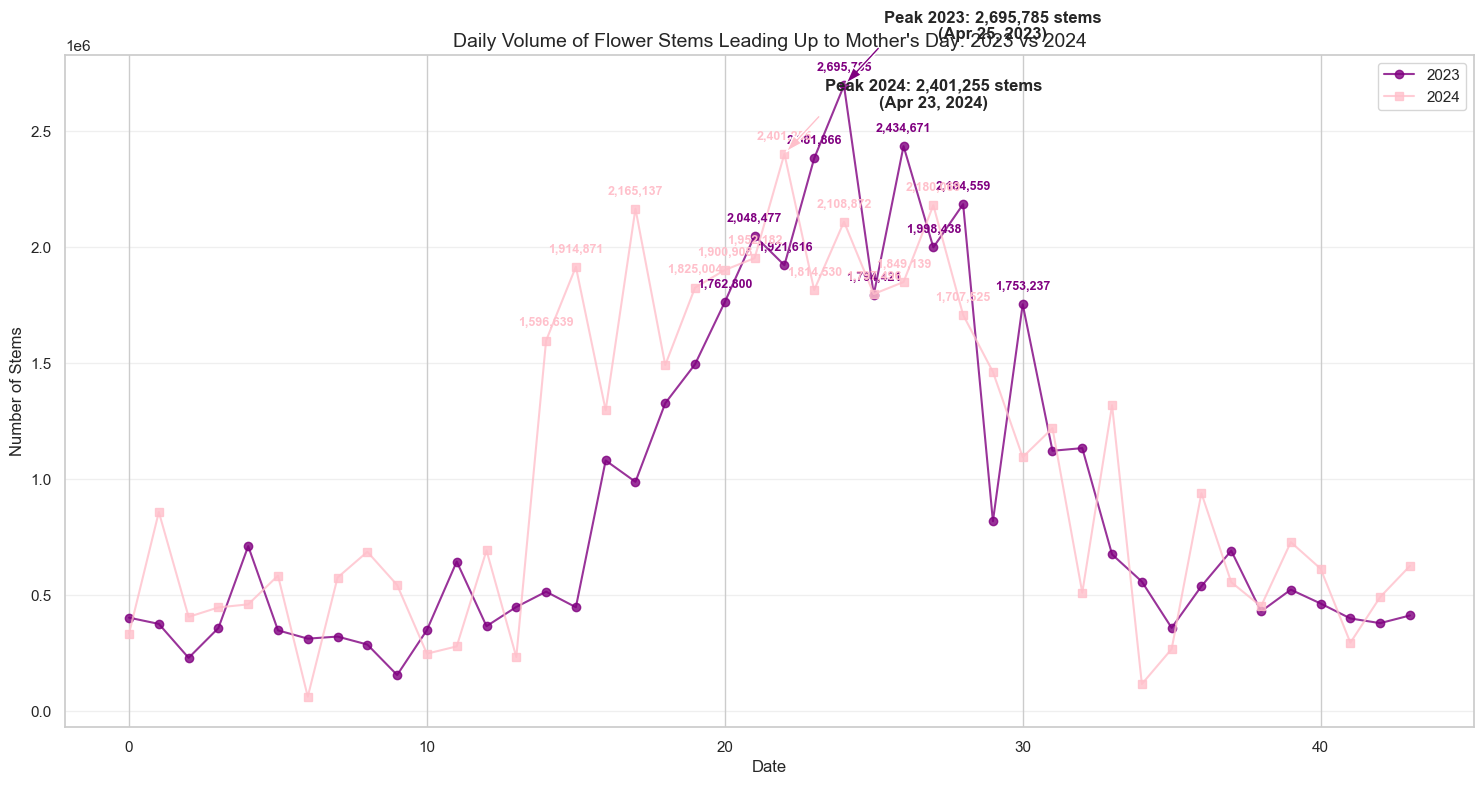

In [53]:
# Comparing Mother's Day Stem Volume between 2023-2024
# Filter data for Mother's Day periods in 2023
mothers_day_2023 = df[(df['Year'] == 2023) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 14)))]

# Find the exact date of Mother's Day 2023
mothers_day_date_2023 = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2023:
        mothers_day_date_2023 = date
        break

# Group by date and sum the stems for 2023
daily_stems_mothers_2023 = mothers_day_2023.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2023['date'] = pd.to_datetime('2023-' + 
                                           daily_stems_mothers_2023['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2023['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2023 = daily_stems_mothers_2023.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_mothers_2023)), daily_stems_mothers_2023['Stems'], 
         marker='o', linestyle='-', color='purple', alpha=0.8, label='2023')

# Create daily stems data for 2024
mothers_day_2024 = df[(df['Year'] == 2024) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 14)))]

# Find the exact date of Mother's Day 2024
mothers_day_date_2024 = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2024:
        mothers_day_date_2024 = date
        break

# Group by date and sum the stems for 2024
daily_stems_mothers_2024 = mothers_day_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2024['date'] = pd.to_datetime('2024-' + 
                                           daily_stems_mothers_2024['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2024['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2024 = daily_stems_mothers_2024.sort_values('date')

# Plot 2024 data
plt.plot(range(len(daily_stems_mothers_2024)), daily_stems_mothers_2024['Stems'], 
         marker='s', linestyle='-', color='pink', alpha=0.8, label='2024')

# Add Mother's Day 2023 marker
mothers_day_idx_2023 = daily_stems_mothers_2023[
    (daily_stems_mothers_2023['Month'] == mothers_day_date_2023.month) & 
    (daily_stems_mothers_2023['Day'] == mothers_day_date_2023.day)
].index
if not mothers_day_idx_2023.empty:
    mothers_day_idx_2023 = mothers_day_idx_2023[0]

# Add Mother's Day 2024 marker
mothers_day_idx_2024 = daily_stems_mothers_2024[
    (daily_stems_mothers_2024['Month'] == mothers_day_date_2024.month) & 
    (daily_stems_mothers_2024['Day'] == mothers_day_date_2024.day)
].index

# Highlight key peaks
for i, v in enumerate(daily_stems_mothers_2023['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='purple')

for i, v in enumerate(daily_stems_mothers_2024['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='pink')

# Add annotation comparing the peak volumes between years
if not mothers_day_idx_2024.empty:
    # Calculate peak values for both years
    peak_2023_mothers = daily_stems_mothers_2023['Stems'].max()
    peak_2024_mothers = daily_stems_mothers_2024['Stems'].max()
    peak_idx_2023_mothers = daily_stems_mothers_2023['Stems'].idxmax()
    peak_idx_2024_mothers = daily_stems_mothers_2024['Stems'].idxmax()
    peak_date_2023_mothers = daily_stems_mothers_2023.iloc[peak_idx_2023_mothers]['date'].strftime('%b %d, %Y')
    peak_date_2024_mothers = daily_stems_mothers_2024.iloc[peak_idx_2024_mothers]['date'].strftime('%b %d, %Y')

    # Add annotations for peaks
    plt.annotate(f"Peak 2023: {peak_2023_mothers:,} stems\n({peak_date_2023_mothers})",
                xy=(peak_idx_2023_mothers, peak_2023_mothers), xycoords='data',
                xytext=(peak_idx_2023_mothers+5, peak_2023_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='purple', shrink=0.05, width=2, headwidth=8),
                ha='center', fontweight='bold')

    plt.annotate(f"Peak 2024: {peak_2024_mothers:,} stems\n({peak_date_2024_mothers})",
                xy=(peak_idx_2024_mothers, peak_2024_mothers), xycoords='data',
                xytext=(peak_idx_2024_mothers+5, peak_2024_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='pink', shrink=0.05, width=2, headwidth=8),
                ha='center', fontweight='bold')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day: 2023 vs 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'date'

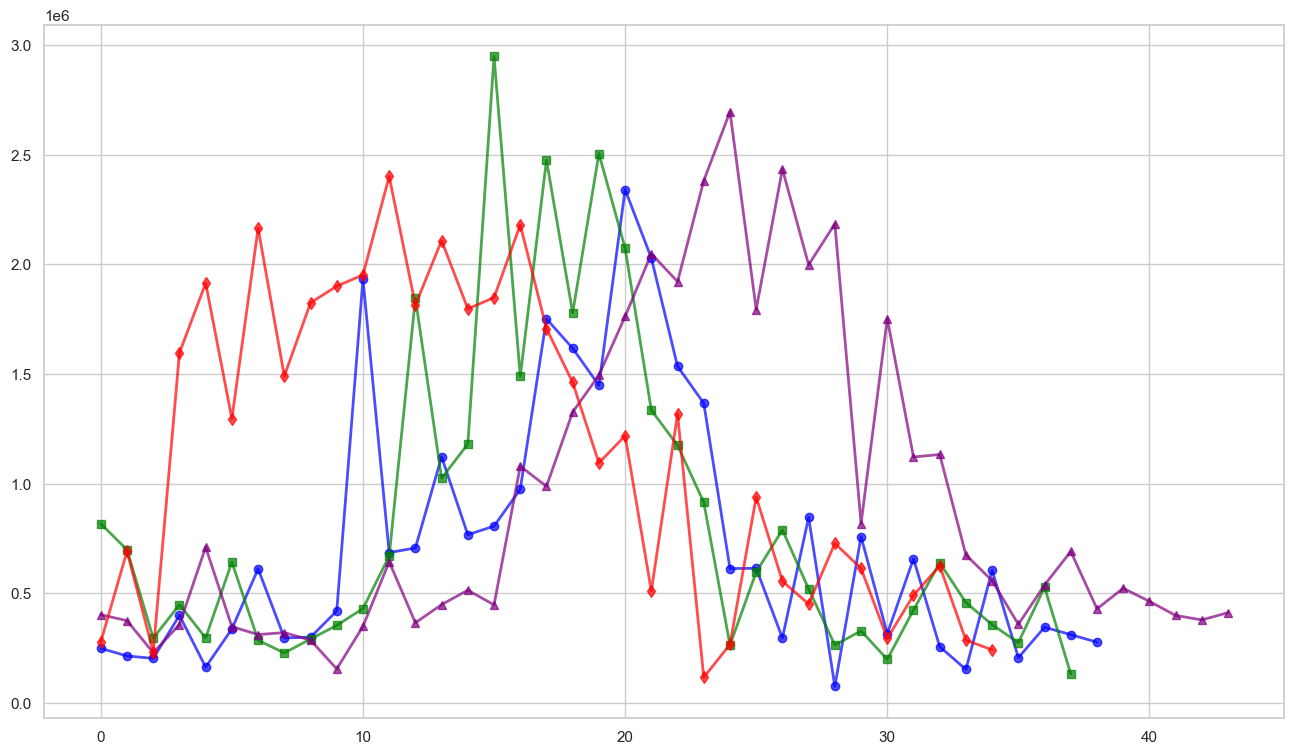

In [54]:
from matplotlib.lines import Line2D

# Compare Mother's Day stem volume across 2021-2024
# Filter data for Mother's Day periods in each year
mothers_day_2021 = df[(df['Year'] == 2021) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 9)))]  # Mother's Day 2021 was May 9

mothers_day_2022 = df[(df['Year'] == 2022) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 8)))]  # Mother's Day 2022 was May 8

# Group by date and sum the stems for each year
daily_stems_mothers_2021 = mothers_day_2021.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2021['date'] = pd.to_datetime('2021-' + 
                                           daily_stems_mothers_2021['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2021['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2021 = daily_stems_mothers_2021.sort_values('date')

daily_stems_mothers_2022 = mothers_day_2022.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2022['date'] = pd.to_datetime('2022-' + 
                                           daily_stems_mothers_2022['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2022['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2022 = daily_stems_mothers_2022.sort_values('date')

# Create a figure with better size for 4 lines
plt.figure(figsize=(16, 9))

# Find Mother's Day dates for each year from holiday_dates_by_name
mothers_day_date_2021 = None
mothers_day_date_2022 = None
mothers_day_date_2024 = mothers_day_date  # Already found in previous cells

for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2021:
        mothers_day_date_2021 = date
    elif date.year == 2022:
        mothers_day_date_2022 = date

# Plot all years using line plots with different colors and markers
plt.plot(range(len(daily_stems_mothers_2021)), daily_stems_mothers_2021['Stems'], 
         marker='o', linestyle='-', color='blue', alpha=0.7, linewidth=2, label='2021')

plt.plot(range(len(daily_stems_mothers_2022)), daily_stems_mothers_2022['Stems'], 
         marker='s', linestyle='-', color='green', alpha=0.7, linewidth=2, label='2022')

plt.plot(range(len(daily_stems_mothers_2023)), daily_stems_mothers_2023['Stems'], 
         marker='^', linestyle='-', color='purple', alpha=0.7, linewidth=2, label='2023')

plt.plot(range(len(daily_stems_mothers)), daily_stems_mothers['Stems'], 
         marker='d', linestyle='-', color='red', alpha=0.7, linewidth=2, label='2024')

# Create date labels from the longest dataset to use as reference
max_len = max(len(daily_stems_mothers_2021), len(daily_stems_mothers_2022), 
              len(daily_stems_mothers_2023), len(daily_stems_mothers))
reference_dates = daily_stems_mothers_2021 if len(daily_stems_mothers_2021) == max_len else daily_stems_mothers

# Format x-axis labels - use every 3 days to avoid crowding
date_labels = [f"{d.month_name()[:3]} {d.day}" if i % 3 == 0 else "" for i, d in enumerate(reference_dates['date'])]
plt.xticks(range(len(reference_dates)), date_labels, rotation=45, ha='right')

# Mark Mother's Day for each year with special markers
mothers_day_idx_2021 = daily_stems_mothers_2021[
    (daily_stems_mothers_2021['Month'] == mothers_day_date_2021.month) & 
    (daily_stems_mothers_2021['Day'] == mothers_day_date_2021.day)
].index
if not mothers_day_idx_2021.empty:
    mothers_day_idx_2021 = mothers_day_idx_2021[0]
    plt.plot(mothers_day_idx_2021, daily_stems_mothers_2021.iloc[mothers_day_idx_2021]['Stems'], 
             'bo', markersize=12, fillstyle='none', markeredgewidth=2)

mothers_day_idx_2022 = daily_stems_mothers_2022[
    (daily_stems_mothers_2022['Month'] == mothers_day_date_2022.month) & 
    (daily_stems_mothers_2022['Day'] == mothers_day_date_2022.day)
].index
if not mothers_day_idx_2022.empty:
    mothers_day_idx_2022 = mothers_day_idx_2022[0]
    plt.plot(mothers_day_idx_2022, daily_stems_mothers_2022.iloc[mothers_day_idx_2022]['Stems'], 
             'gs', markersize=12, fillstyle='none', markeredgewidth=2)

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day: 2021-2024', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Create a custom legend with Mother's Day markers
legend_elements = [
    Line2D([0], [0], marker='o', color='blue', label='2021', markersize=8),
    Line2D([0], [0], marker='s', color='green', label='2022', markersize=8),
    Line2D([0], [0], marker='^', color='purple', label='2023', markersize=8),
    Line2D([0], [0], marker='d', color='red', label='2024', markersize=8),
    Line2D([0], [0], marker='o', color='black', label="Mother's Day", 
           fillstyle='none', markeredgewidth=2, markersize=10)
]
plt.legend(handles=legend_elements, fontsize=12)

# Find peak values for each year
peak_2021_mothers = daily_stems_mothers_2021['Stems'].max()
peak_idx_2021_mothers = daily_stems_mothers_2021['Stems'].idxmax()
peak_date_2021_mothers = daily_stems_mothers_2021.iloc[peak_idx_2021_mothers]['date'].strftime('%b %d, %Y')

peak_2022_mothers = daily_stems_mothers_2022['Stems'].max()
peak_idx_2022_mothers = daily_stems_mothers_2022['Stems'].idxmax()
peak_date_2022_mothers = daily_stems_mothers_2022.iloc[peak_idx_2022_mothers]['date'].strftime('%b %d, %Y')

# Annotate peak values if they exceed a threshold
if peak_2021_mothers > 1500000:
    plt.annotate(f"Peak 2021: {peak_2021_mothers:,}\n({peak_date_2021_mothers})",
                xy=(peak_idx_2021_mothers, peak_2021_mothers), xycoords='data',
                xytext=(peak_idx_2021_mothers-5, peak_2021_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=7),
                ha='center', fontweight='bold', fontsize=10)

if peak_2022_mothers > 1500000:
    plt.annotate(f"Peak 2022: {peak_2022_mothers:,}\n({peak_date_2022_mothers})",
                xy=(peak_idx_2022_mothers, peak_2022_mothers), xycoords='data',
                xytext=(peak_idx_2022_mothers+5, peak_2022_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='green', shrink=0.05, width=1.5, headwidth=7),
                ha='center', fontweight='bold', fontsize=10)

# Reuse previously defined annotations for 2023 and 2024
plt.annotate(f"Peak 2023: {peak_2023_mothers:,}\n({peak_date_2023_mothers})",
            xy=(peak_idx_2023_mothers, peak_2023_mothers), xycoords='data',
            xytext=(peak_idx_2023_mothers-8, peak_2023_mothers+200000), textcoords='data',
            arrowprops=dict(facecolor='purple', shrink=0.05, width=1.5, headwidth=7),
            ha='center', fontweight='bold', fontsize=10)

plt.annotate(f"Peak 2024: {peak_2024_mothers:,}\n({peak_date_2024_mothers})",
            xy=(peak_idx_2024_mothers, peak_2024_mothers), xycoords='data',
            xytext=(peak_idx_2024_mothers+8, peak_2024_mothers+200000), textcoords='data',
            arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=7),
            ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Add a bar chart comparing Mother's Day actual dates
plt.figure(figsize=(12, 7))
years = [2021, 2022, 2023, 2024]
mother_day_stems = []

# Get stem counts for Mother's Day itself
for year, date in [(2021, mothers_day_date_2021), (2022, mothers_day_date_2022), 
                   (2023, mothers_day_date_2023), (2024, mothers_day_date)]:
    if date:
        stems = df[(df['Year'] == year) & (df['Month'] == date.month) & 
                   (df['Day'] == date.day)]['Stems'].sum()
        mother_day_stems.append(stems)
    else:
        mother_day_stems.append(0)

# Create bar chart for Mother's Day comparison
bars = plt.bar(years, mother_day_stems, color=['blue', 'green', 'purple', 'red'], alpha=0.7)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20000,
             f'{mother_day_stems[i]:,}', ha='center', fontweight='bold')

plt.title("Comparison of Flower Stem Volume on Mother's Day (2021-2024)", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

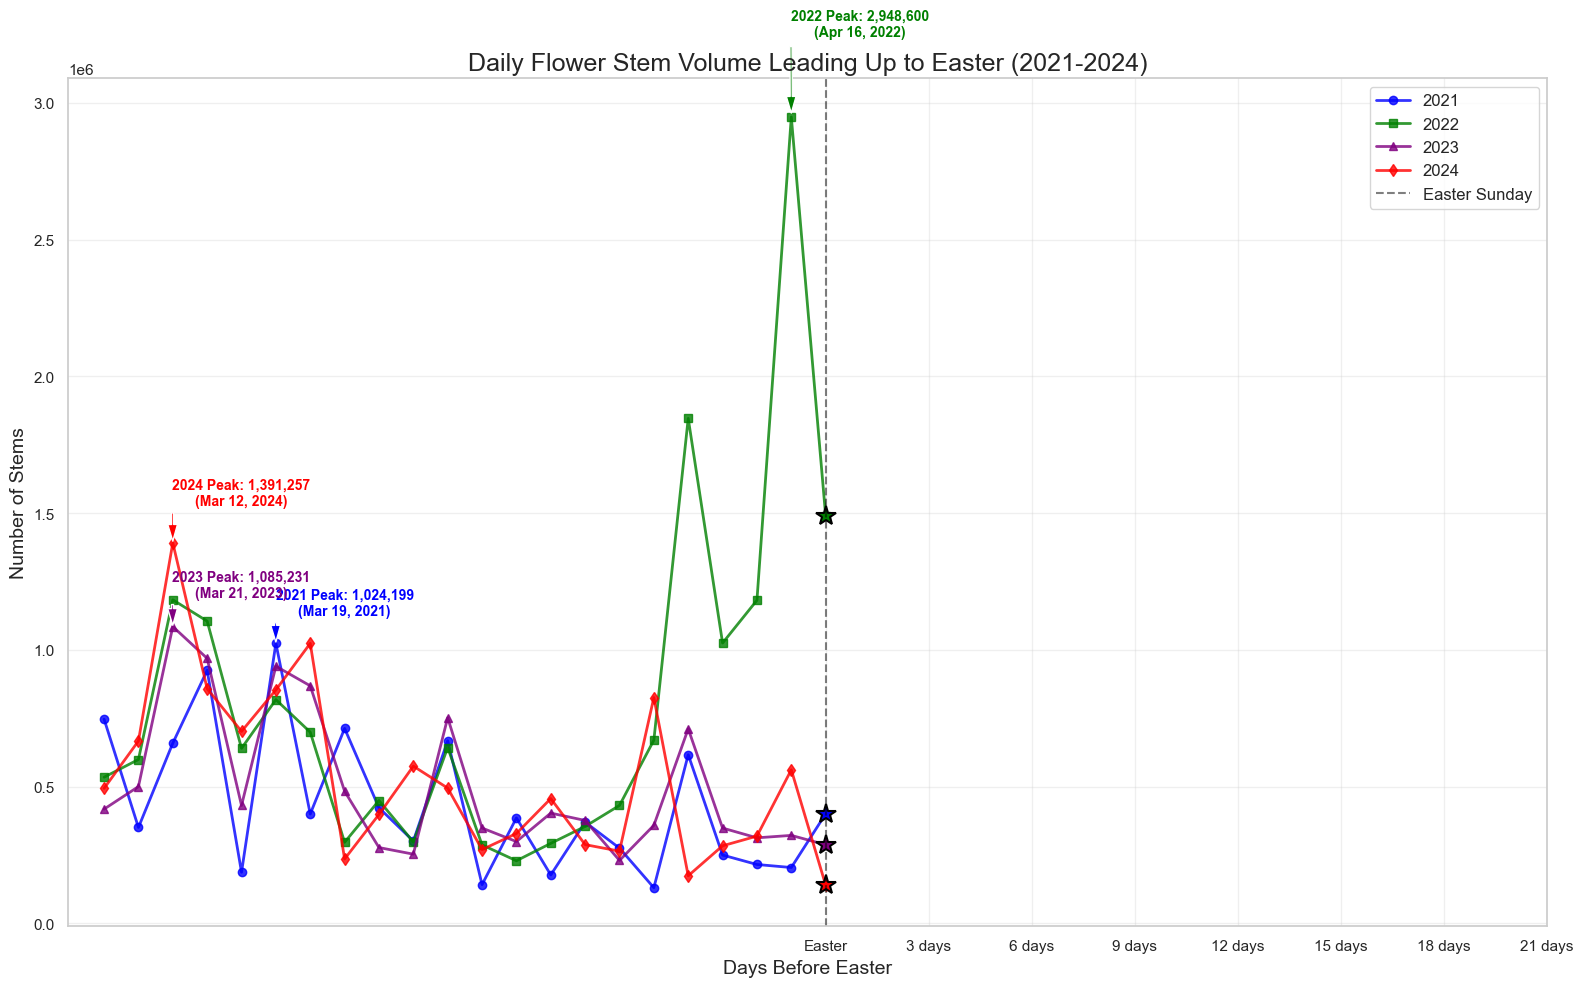

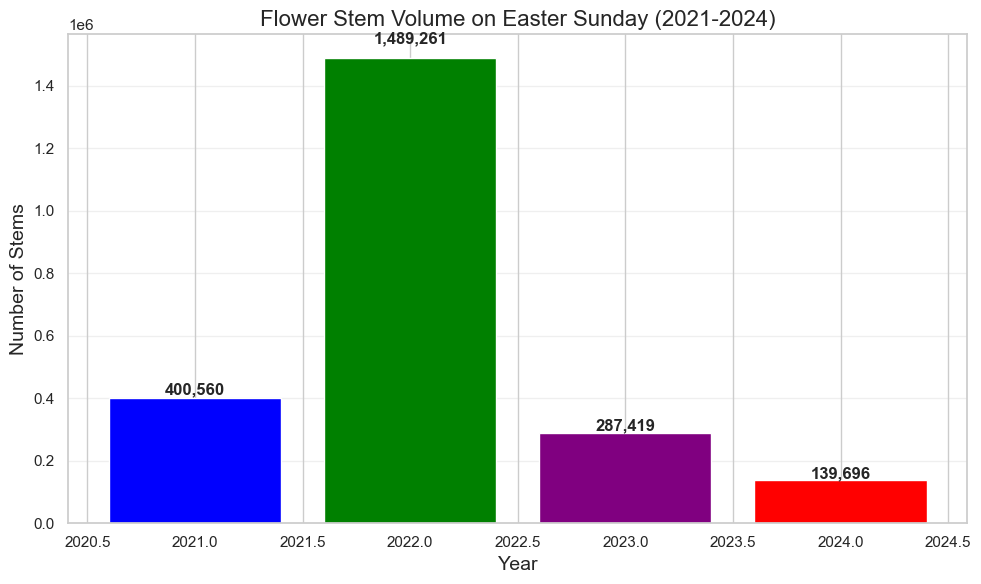

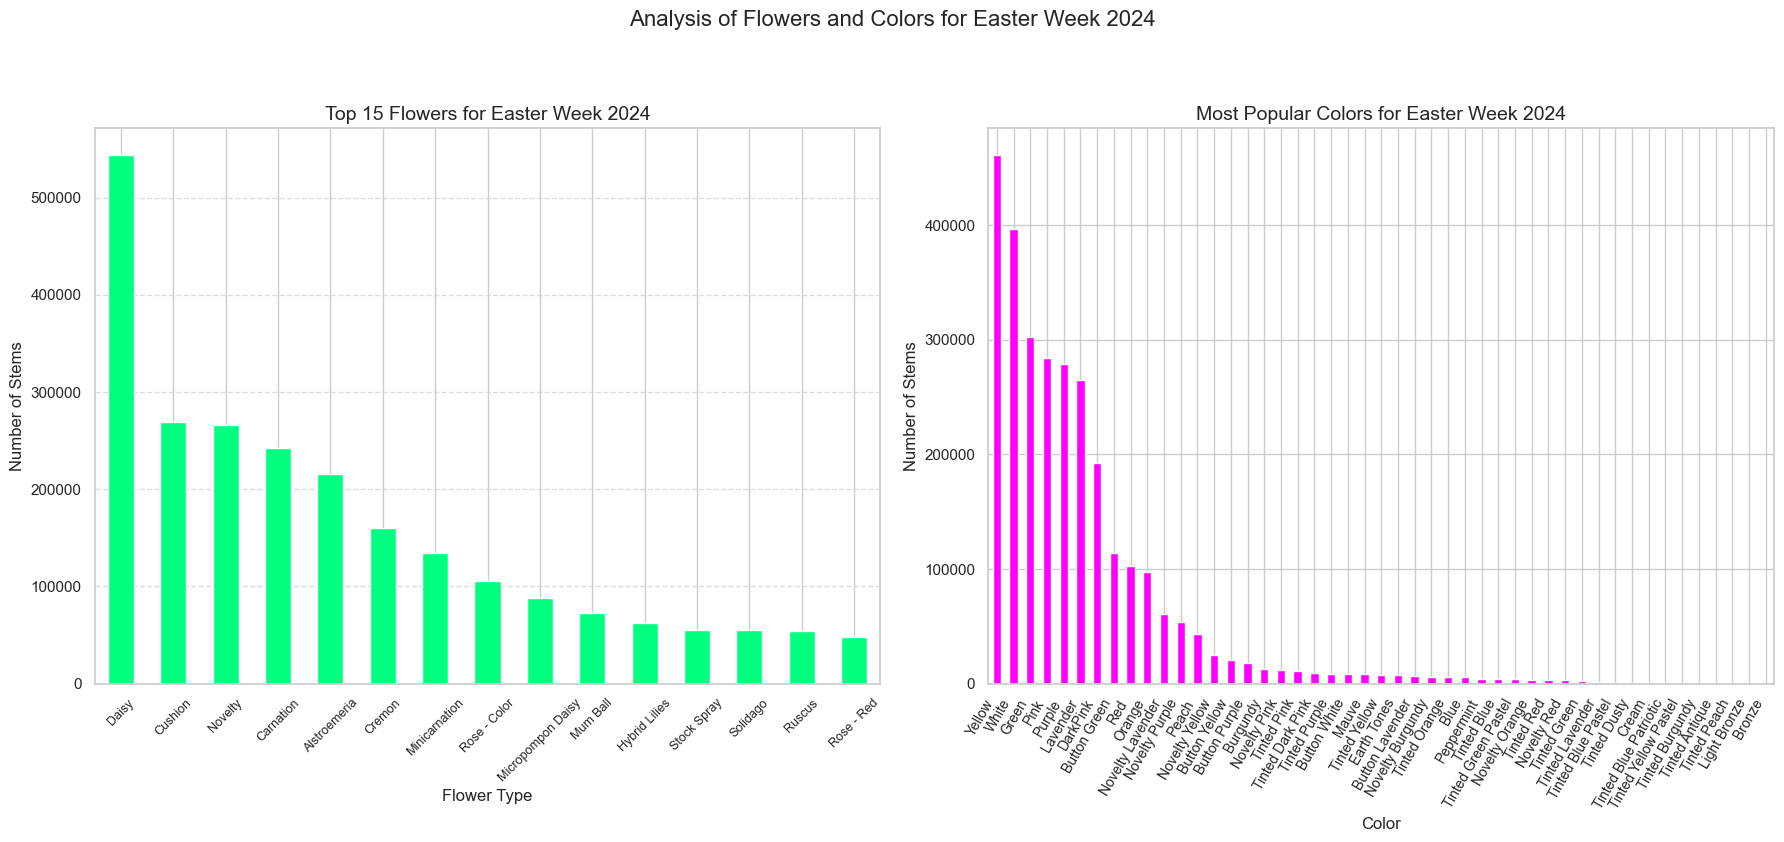

In [ ]:
# --- Analizar volumen de tallos para Pascua (2021-2024) ---

# Definir fechas de Pascua
easter_dates = {
    2021: pd.Timestamp('2021-04-04'),
    2022: pd.Timestamp('2022-04-17'),
    2023: pd.Timestamp('2023-04-09'),
    2024: pd.Timestamp('2024-03-31')
}

# Agregar fechas de Pascua al diccionario de feriados
if 'easter' not in holiday_dates_by_name:
    holiday_dates_by_name['easter'] = [easter_dates[year] for year in easter_dates]

# Filtrar datos: 3 semanas antes de cada Pascua
easter_periods = {}
for year in range(2021, 2025):
    easter_date = easter_dates[year]
    start_date = easter_date - pd.Timedelta(days=21)
    easter_periods[year] = df[(df['Date'] >= start_date) & (df['Date'] <= easter_date)]

# Agrupar por día
easter_daily_stems = {}
for year in range(2021, 2025):
    daily = easter_periods[year].groupby(['Date'])['Stems'].sum().reset_index()
    daily['Days to Easter'] = (easter_dates[year] - daily['Date']).dt.days
    easter_daily_stems[year] = daily.sort_values('Date')

# --- Gráfico líneas volumen de tallos hacia Pascua ---
plt.figure(figsize=(16, 10))
colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'red'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year in range(2021, 2025):
    data = easter_daily_stems[year]
    plt.plot(data['Days to Easter'], data['Stems'], 
             marker=markers[year], linestyle='-', color=colors[year],
             alpha=0.8, linewidth=2, label=f'{year}')
    
    # Marcar Domingo de Pascua
    easter_data = data[data['Days to Easter'] == 0]
    if not easter_data.empty:
        plt.plot(0, easter_data['Stems'].values[0], 
                 marker='*', markersize=15, color=colors[year], 
                 markeredgecolor='black', markeredgewidth=1.5)

plt.xlabel('Days Before Easter', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume Leading Up to Easter (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Easter Sunday')
plt.gca().invert_xaxis()
plt.xticks(range(0, -22, -3), [f'{abs(x)} days' if x != 0 else 'Easter' for x in range(0, -22, -3)])
plt.legend(fontsize=12)

# Anotar picos
for year in range(2021, 2025):
    data = easter_daily_stems[year]
    peak_row = data.loc[data['Stems'].idxmax()]
    peak_stems = peak_row['Stems']
    peak_days_before = peak_row['Days to Easter']
    peak_date = peak_row['Date'].strftime('%b %d, %Y')
    
    plt.annotate(f"{year} Peak: {peak_stems:,}\n({peak_date})",
                 xy=(peak_days_before, peak_stems), xycoords='data',
                 xytext=(peak_days_before-2, peak_stems + peak_stems*0.1),
                 textcoords='data', 
                 arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7),
                 ha='center', fontweight='bold', fontsize=10, color=colors[year])

plt.tight_layout()
plt.show()

# --- Gráfico de barras volumen en Domingo de Pascua ---
plt.figure(figsize=(10, 6))
easter_stems = []
for year in range(2021, 2025):
    easter_stem_count = df[df['Date'] == easter_dates[year]]['Stems'].sum()
    easter_stems.append(easter_stem_count)

bars = plt.bar(range(2021, 2025), easter_stems, color=[colors[y] for y in range(2021, 2025)])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
             f'{int(height):,}', ha='center', fontweight='bold')

plt.title("Flower Stem Volume on Easter Sunday (2021-2024)", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de flores y colores Semana de Pascua 2024 ---
easter_week_data_2024 = df[(df['Date'] >= easter_dates[2024] - pd.Timedelta(days=7)) &
                           (df['Date'] <= easter_dates[2024])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 flores
stems_by_flower = easter_week_data_2024.groupby('Flower')['Stems'].sum().sort_values(ascending=False)
top_flowers = stems_by_flower.head(15)
top_flowers.plot(kind='bar', color='springgreen', ax=ax1)
ax1.set_title("Top 15 Flowers for Easter Week 2024", fontsize=14)
ax1.set_ylabel("Number of Stems")
ax1.set_xlabel("Flower Type")
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Top colores (MEJORADO)
stems_by_color = easter_week_data_2024.groupby('Color')['Stems'].sum().sort_values(ascending=False)
stems_by_color.plot(kind='bar', colormap='spring', ax=ax2)
ax2.set_title("Most Popular Colors for Easter Week 2024", fontsize=14)
ax2.set_ylabel("Number of Stems")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Mejorar visibilidad de los nombres
for label in ax2.get_xticklabels():
    label.set_ha('right')

plt.subplots_adjust(bottom=0.25)  # Espacio extra

plt.suptitle("Analysis of Flowers and Colors for Easter Week 2024", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

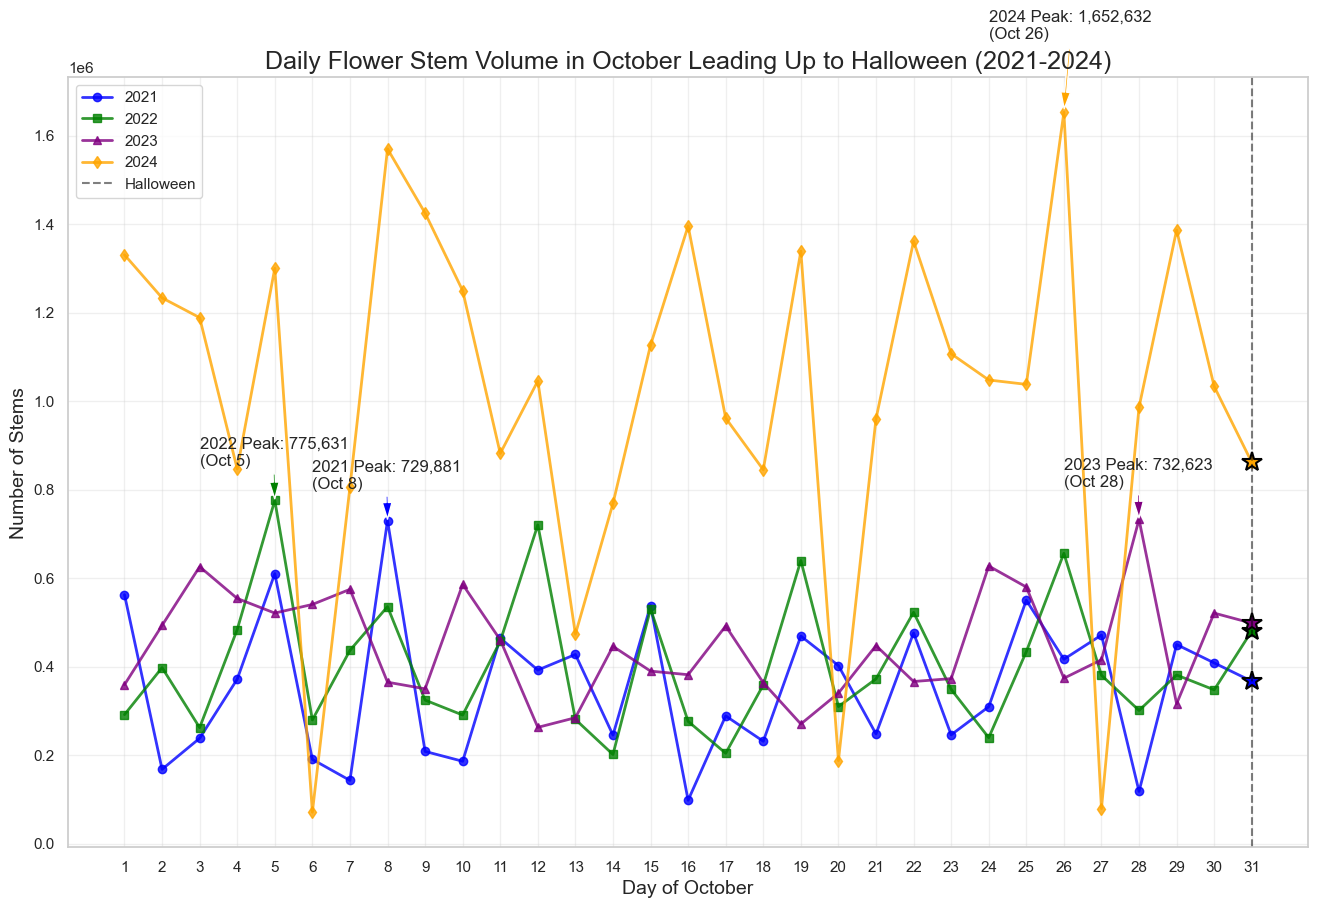

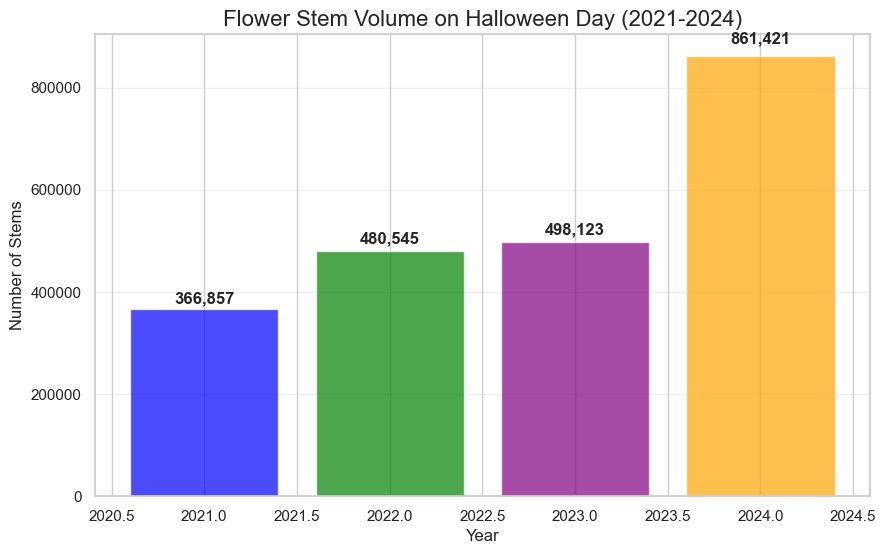

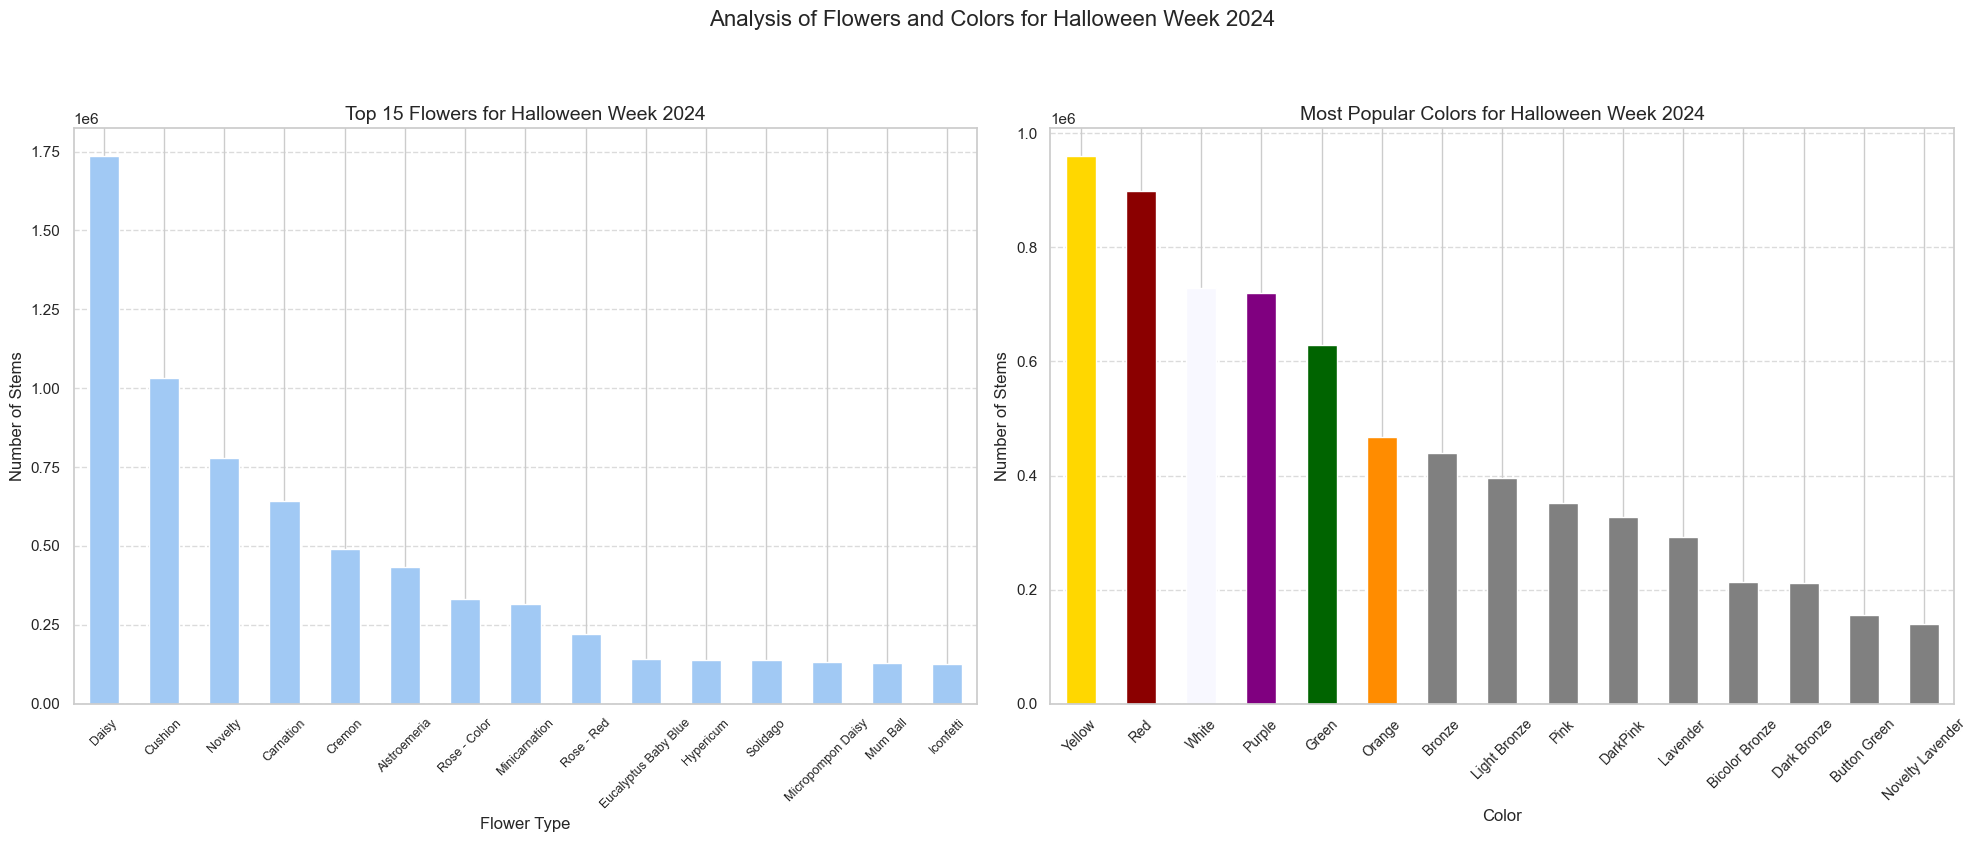

Halloween Week 2024 Summary:
Total stem volume: 8,084,211
Top flower: Daisy (1,736,635 stems)
Top color: Yellow (960,826 stems)


In [ ]:
# Analyze Halloween flower stem volume from 2021 to 2024

# Filter data for the period around Halloween (October 1 to October 31)
halloween_periods = {}
for year in range(2021, 2025):
    if year in df['Year'].values:  # Check if year exists in the dataset
        halloween_periods[year] = df[(df['Year'] == year) & (df['Month'] == 10)]

# Group by date and sum the stems for each year's Halloween period
halloween_daily_stems = {}
for year, data in halloween_periods.items():
    if not data.empty and 'Stems' in data.columns:
        daily = data.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
        daily['date'] = pd.to_datetime(f'{year}-' + 
                                       daily['Month'].astype(str).str.zfill(2) + '-' + 
                                       daily['Day'].astype(str).str.zfill(2))
        halloween_daily_stems[year] = daily

# Create a plot to compare Halloween stem volumes across years
plt.figure(figsize=(16, 10))

colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'orange'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year, data in halloween_daily_stems.items():
    if not data.empty:
        plt.plot(data['Day'], data['Stems'],
                 marker=markers[year], linestyle='-', color=colors[year],
                 alpha=0.8, linewidth=2, label=f'{year}')
        
        # Mark Halloween Day
        halloween_day = data[data['Day'] == 31]
        if not halloween_day.empty:
            plt.plot(31, halloween_day['Stems'].values[0],
                     marker='*', markersize=15, color=colors[year],
                     markeredgecolor='black', markeredgewidth=1.5)

# Add labels and formatting
plt.xlabel('Day of October', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume in October Leading Up to Halloween (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=31, color='black', linestyle='--', alpha=0.5, label='Halloween')
plt.legend()

# Set x-axis ticks to show all days of October
plt.xticks(range(1, 32))

# Find and annotate peak days for each year
for year, data in halloween_daily_stems.items():
    if not data.empty:
        peak_row = data.loc[data['Stems'].idxmax()]
        peak_stems = peak_row['Stems']
        peak_day = peak_row['Day']

        plt.annotate(f"{year} Peak: {peak_stems:,}\n(Oct {peak_day})",
                     xy=(peak_day, peak_stems), xycoords='data',
                     xytext=(peak_day-2, peak_stems + peak_stems*0.1),
                     textcoords='data',
                     arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7))

plt.show()

# Create a bar chart comparing Halloween Day stem volumes across years
plt.figure(figsize=(10, 6))
halloween_stems = []
years_with_data = []

for year, period_data in halloween_periods.items():
    if not period_data.empty and 'Stems' in period_data.columns:
        halloween_stem_count = period_data[period_data['Day'] == 31]['Stems'].sum()
        if halloween_stem_count > 0:
            halloween_stems.append(halloween_stem_count)
            years_with_data.append(year)

if years_with_data:
    bars = plt.bar(years_with_data, halloween_stems,
                   color=[colors[y] for y in years_with_data], alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
                 f'{int(height):,}', ha='center', fontweight='bold')

    plt.title("Flower Stem Volume on Halloween Day (2021-2024)", fontsize=16)
    plt.ylabel('Number of Stems')
    plt.xlabel('Year')
    plt.grid(alpha=0.3, axis='y')
    plt.show()

# Analyze popular flowers and colors for Halloween in the most recent year with data
latest_year = max([y for y in halloween_periods.keys() if not halloween_periods[y].empty], default=None)

if latest_year:
    halloween_data = halloween_periods[latest_year]
    required_columns = ['Month', 'Day', 'Stems', 'Flower', 'Color']
    
    if all(col in halloween_data.columns for col in required_columns):
        # Get data for the week leading up to Halloween
        halloween_week_data = halloween_data[(halloween_data['Day'] >= 24) & (halloween_data['Day'] <= 31)]

        if not halloween_week_data.empty:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
            
            # Top flowers
            stems_by_flower_halloween = halloween_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False).head(15)
            stems_by_flower_halloween.plot(kind='bar', ax=ax1)
            ax1.set_title(f"Top 15 Flowers for Halloween Week {latest_year}", fontsize=14)
            ax1.set_ylabel("Number of Stems")
            ax1.set_xlabel("Flower Type")
            ax1.tick_params(axis='x', rotation=45, labelsize=9)
            ax1.grid(axis='y', linestyle='--', alpha=0.7)

            # Top colors
            stems_by_color_halloween = halloween_week_data.groupby('Color')['Stems'].sum().sort_values(ascending=False).head(15)
            
            color_mapping = {
                'Black': 'black',
                'Purple': 'purple',
                'Green': 'darkgreen',
                'White': 'ghostwhite',
                'Red': 'darkred',
                'Orange': 'darkorange',
                'Yellow': 'gold'
            }
            
            bar_colors = [color_mapping.get(color, 'gray') for color in stems_by_color_halloween.index]
            
            stems_by_color_halloween.plot(kind='bar', color=bar_colors, ax=ax2)
            ax2.set_title(f"Most Popular Colors for Halloween Week {latest_year}", fontsize=14)
            ax2.set_ylabel("Number of Stems")
            ax2.set_xlabel("Color")
            ax2.tick_params(axis='x', rotation=45, labelsize=10)
            ax2.grid(axis='y', linestyle='--', alpha=0.7)

            plt.suptitle(f"Analysis of Flowers and Colors for Halloween Week {latest_year}", fontsize=16, y=1.05)
            plt.tight_layout()
            plt.show()

            # Print summary statistics
            print(f"Halloween Week {latest_year} Summary:")
            print(f"Total stem volume: {halloween_week_data['Stems'].sum():,}")
            print(f"Top flower: {stems_by_flower_halloween.index[0]} ({stems_by_flower_halloween.iloc[0]:,} stems)")
            print(f"Top color: {stems_by_color_halloween.index[0]} ({stems_by_color_halloween.iloc[0]:,} stems)")


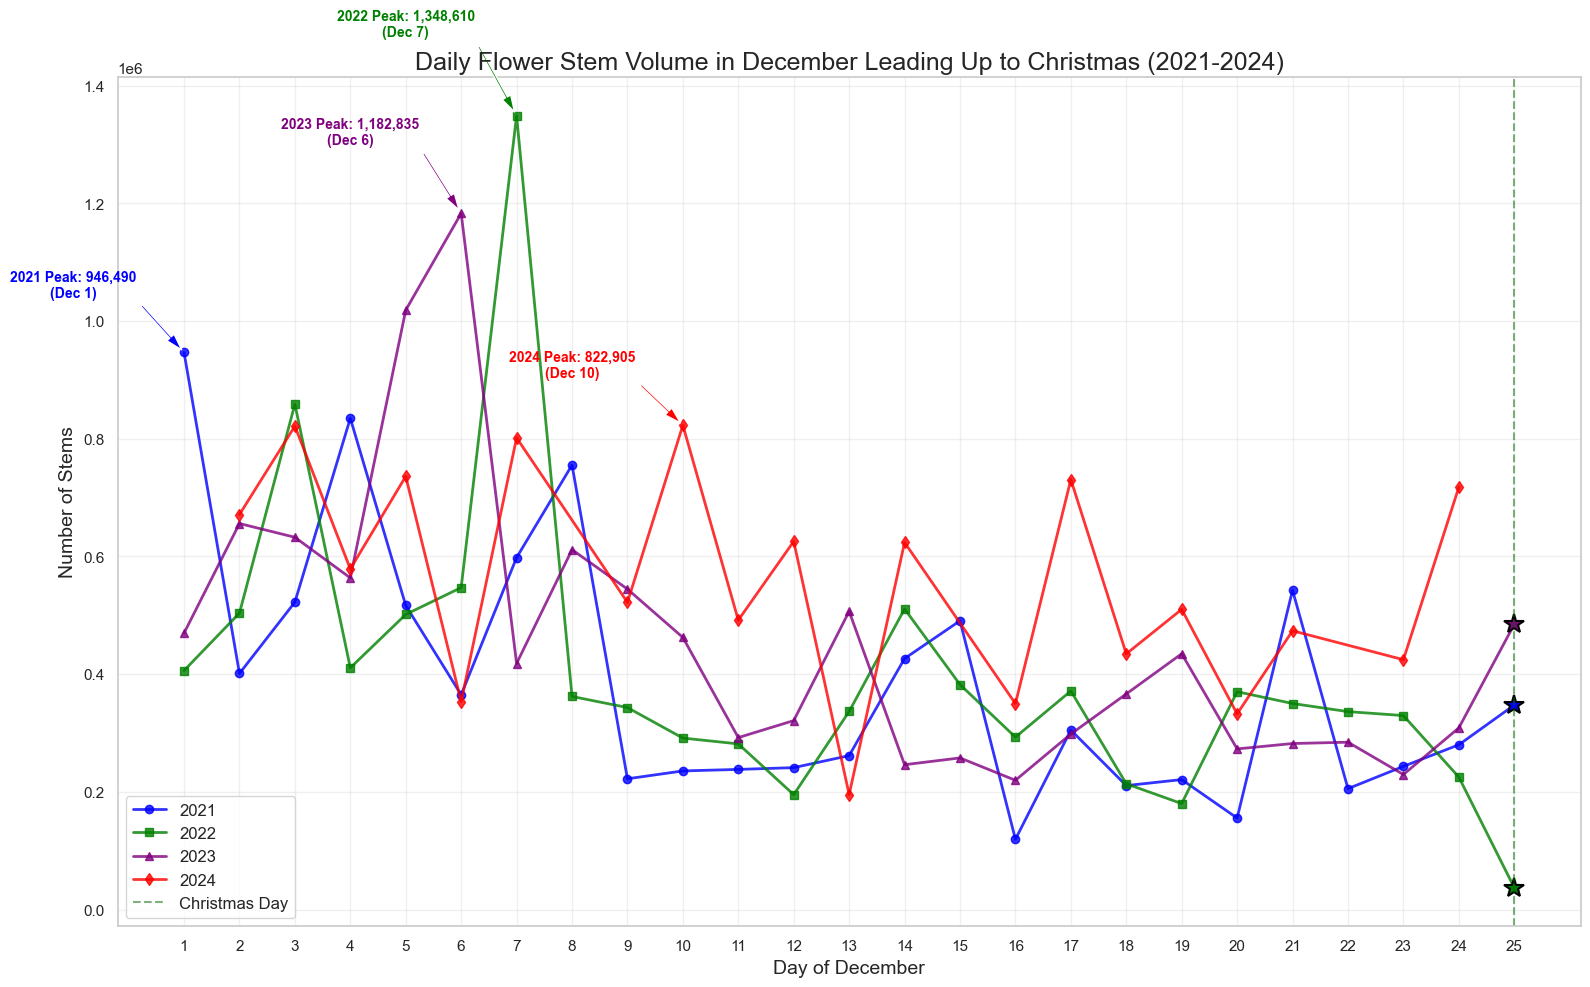

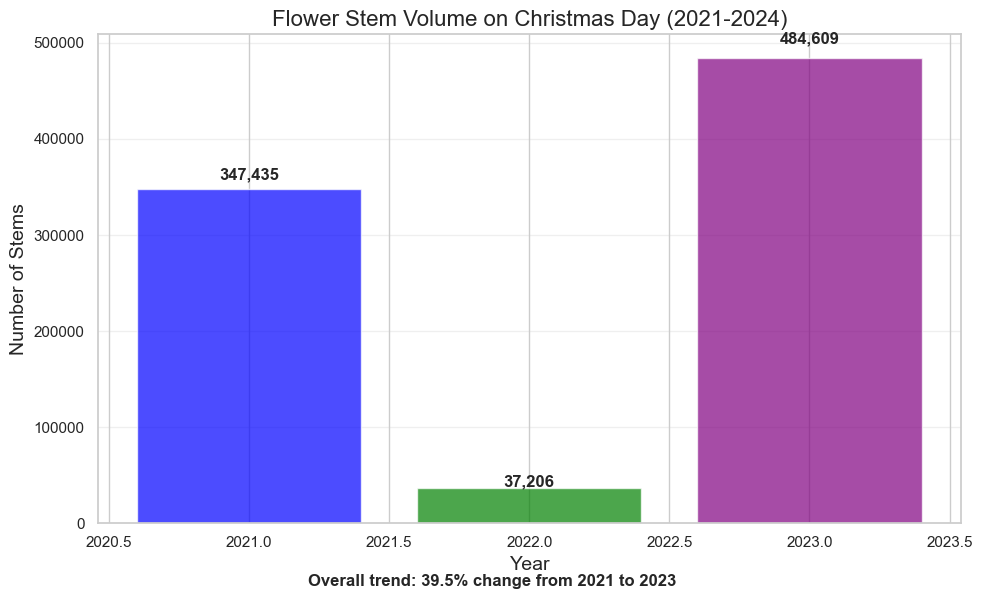

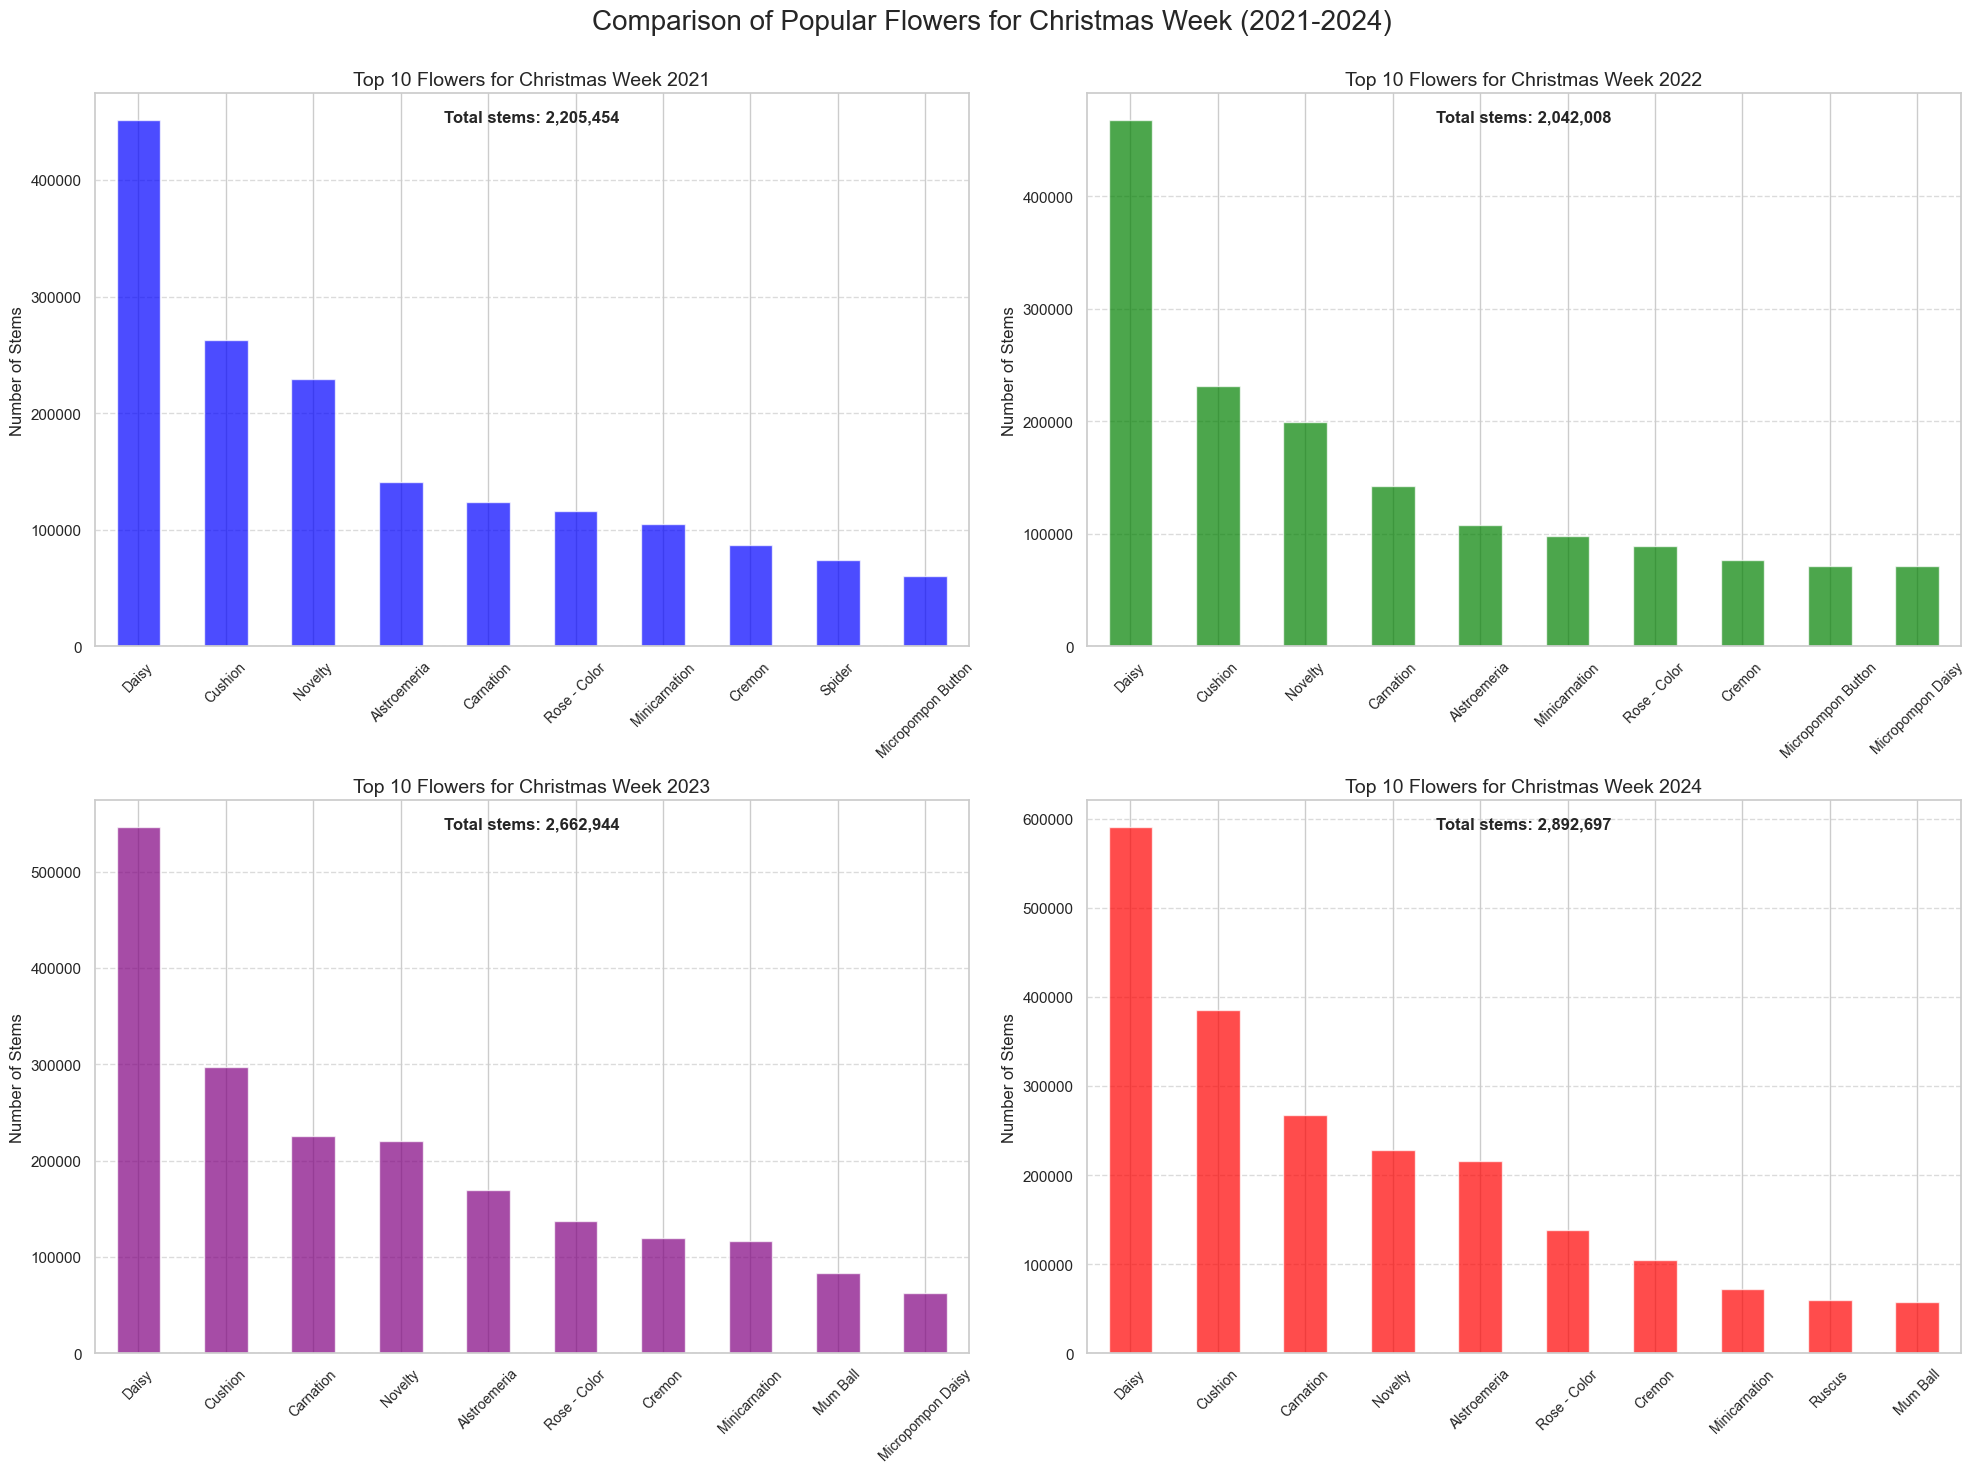

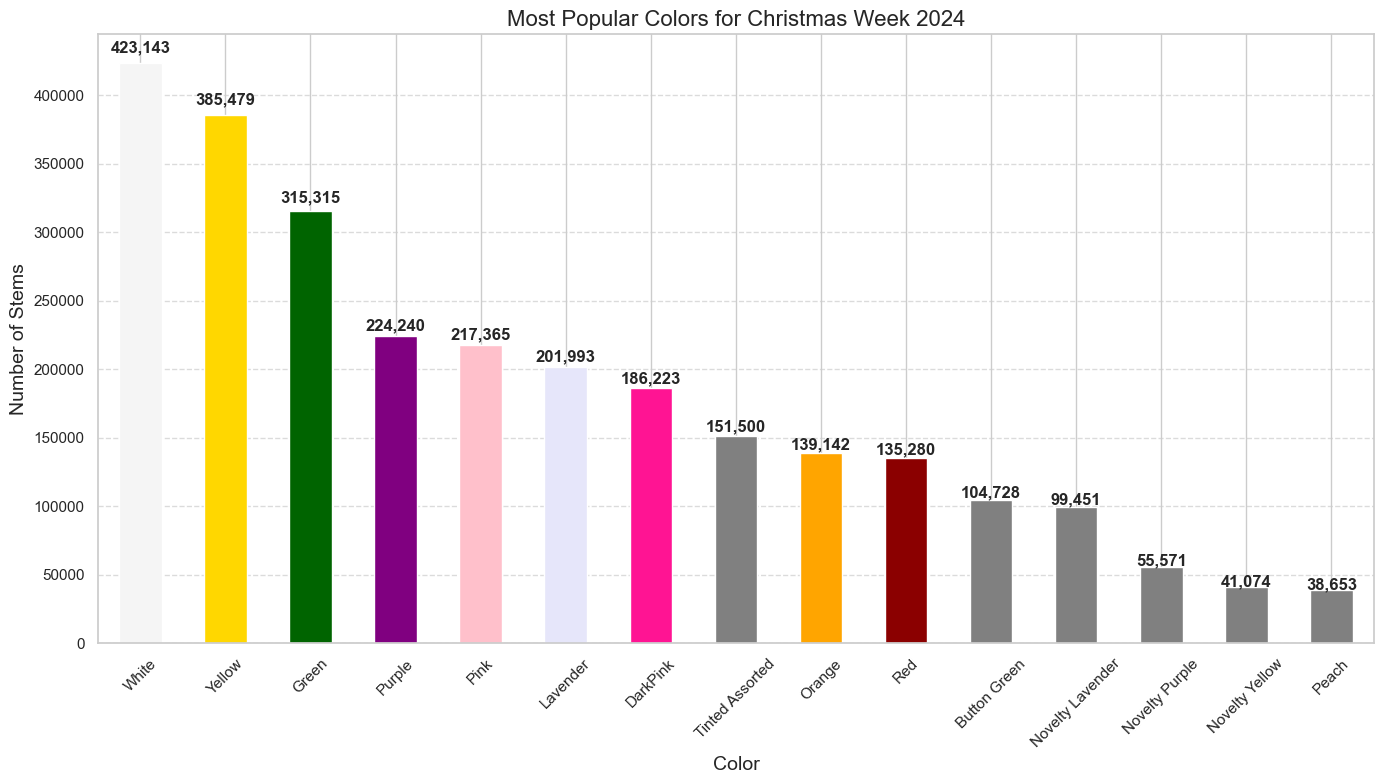

In [ ]:
# --- Analyzing and comparing Christmas period flower stem volumes (2021-2024) ---

# Define date ranges for Christmas periods (December 1-25 each year)
christmas_periods = {}
for year in range(2021, 2025):
    christmas_periods[year] = df[(df['Year'] == year) & 
                               (df['Month'] == 12) & 
                               (df['Day'] <= 25)]

# Group by date and sum the stems for each year
christmas_daily_stems = {}
for year, data in christmas_periods.items():
    if not data.empty:
        daily = data.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
        daily['date'] = pd.to_datetime(f'{year}-' + 
                                     daily['Month'].astype(str).str.zfill(2) + '-' + 
                                     daily['Day'].astype(str).str.zfill(2))
        christmas_daily_stems[year] = daily.sort_values('date')

# Create a plot to compare Christmas stem volumes across years
plt.figure(figsize=(16, 10))

colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'red'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year, data in christmas_daily_stems.items():
    if not data.empty:
        plt.plot(data['Day'], data['Stems'],
                marker=markers[year], linestyle='-', color=colors[year],
                alpha=0.8, linewidth=2, label=f'{year}')
        
        # Mark Christmas Day
        christmas_day = data[data['Day'] == 25]
        if not christmas_day.empty:
            plt.plot(25, christmas_day['Stems'].values[0],
                    marker='*', markersize=15, color=colors[year],
                    markeredgecolor='black', markeredgewidth=1.5)

# Add labels and formatting
plt.xlabel('Day of December', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume in December Leading Up to Christmas (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=25, color='darkgreen', linestyle='--', alpha=0.5, label='Christmas Day')
plt.legend(fontsize=12)

# Set x-axis ticks to show all days of December
plt.xticks(range(1, 26))

# Find and annotate peak days for each year
for year, data in christmas_daily_stems.items():
    if not data.empty:
        peak_row = data.loc[data['Stems'].idxmax()]
        peak_stems = peak_row['Stems']
        peak_day = peak_row['Day']

        plt.annotate(f"{year} Peak: {peak_stems:,}\n(Dec {peak_day})",
                    xy=(peak_day, peak_stems), xycoords='data',
                    xytext=(peak_day-2, peak_stems + peak_stems*0.1),
                    textcoords='data',
                    arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7),
                    ha='center', fontweight='bold', fontsize=10, color=colors[year])

plt.tight_layout()
plt.show()

# Create a bar chart comparing Christmas Day stem volumes across years
plt.figure(figsize=(10, 6))
christmas_stems = []
years_with_data = []

for year, period_data in christmas_periods.items():
    if not period_data.empty:
        christmas_stem_count = period_data[period_data['Day'] == 25]['Stems'].sum()
        if christmas_stem_count > 0:
            christmas_stems.append(christmas_stem_count)
            years_with_data.append(year)

if years_with_data:
    bars = plt.bar(years_with_data, christmas_stems,
                color=[colors[y] for y in years_with_data], alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
                f'{int(height):,}', ha='center', fontweight='bold')

    plt.title("Flower Stem Volume on Christmas Day (2021-2024)", fontsize=16)
    plt.ylabel('Number of Stems', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.grid(alpha=0.3, axis='y')
    
    # Calculate and display trend percentage changes
    if len(christmas_stems) > 1:
        overall_change = ((christmas_stems[-1] - christmas_stems[0]) / christmas_stems[0]) * 100
        plt.figtext(0.5, 0.01, f"Overall trend: {overall_change:.1f}% change from 2021 to {years_with_data[-1]}",
                  ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Compare flower types and colors for the week leading to Christmas across years
latest_year = max([y for y in christmas_periods.keys() if not christmas_periods[y].empty])

if latest_year:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f"Comparison of Popular Flowers for Christmas Week (2021-2024)", 
                fontsize=20, y=0.95)
    
    # Loop through available years and create subplots
    for i, year in enumerate([2021, 2022, 2023, 2024]):
        if year in christmas_periods and not christmas_periods[year].empty:
            row, col = divmod(i, 2)
            ax = axes[row, col]
            
            # Get data for the week leading up to Christmas
            christmas_week_data = christmas_periods[year][(christmas_periods[year]['Day'] >= 18) & 
                                                        (christmas_periods[year]['Day'] <= 25)]
            
            if not christmas_week_data.empty:
                # Top 10 flowers
                stems_by_flower = christmas_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False).head(10)
                stems_by_flower.plot(kind='bar', ax=ax, color=colors[year], alpha=0.7)
                
                ax.set_title(f"Top 10 Flowers for Christmas Week {year}", fontsize=14)
                ax.set_ylabel("Number of Stems", fontsize=12)
                ax.set_xlabel("", fontsize=12)
                ax.tick_params(axis='x', rotation=45, labelsize=10)
                ax.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Add total stem count
                total_stems = christmas_week_data['Stems'].sum()
                ax.text(0.5, 0.95, f"Total stems: {total_stems:,}", 
                        transform=ax.transAxes, ha='center', fontweight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Create color comparison chart for latest year
    plt.figure(figsize=(14, 8))
    
    # Get Christmas week data for the latest year
    christmas_week_latest = christmas_periods[latest_year][
        (christmas_periods[latest_year]['Day'] >= 18) & 
        (christmas_periods[latest_year]['Day'] <= 25)
    ]
    
    # Get top colors
    stems_by_color_christmas = christmas_week_latest.groupby('Color')['Stems'].sum().sort_values(ascending=False).head(15)
    
    # Create a custom colormap for the colors (attempt to match actual colors where possible)
    color_mapping = {
        'Red': 'darkred',
        'Green': 'darkgreen',
        'White': 'whitesmoke',
        'Yellow': 'gold',
        'Pink': 'pink',
        'Purple': 'purple',
        'Lavender': 'lavender',
        'DarkPink': 'deeppink',
        'Orange': 'orange',
        'Burgundy': 'maroon'
    }
    
    bar_colors = [color_mapping.get(color, 'gray') for color in stems_by_color_christmas.index]
    
    # Create the color bar chart
    stems_by_color_christmas.plot(kind='bar', color=bar_colors, figsize=(14, 8))
    plt.title(f"Most Popular Colors for Christmas Week {latest_year}", fontsize=16)
    plt.ylabel("Number of Stems", fontsize=14)
    plt.xlabel("Color", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for i, v in enumerate(stems_by_color_christmas):
        plt.text(i, v + v*0.02, f'{int(v):,}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()